In [ ]:
search_model.best_params_

# HANNING INI PAKE SEARCH_MODEL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
}

# Grid Search CV dengan cv=5/pencarian parameter
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model/cross validation/pembentukan pohon
search_model = grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
# print("Parameter terbaik:", grid_search.best_params_)
# print("Skor F1 terbaik:", grid_search.best_score_)



In [ ]:
search_model.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [ ]:
search_model.best_score_

np.float64(0.868257132416398)

In [ ]:
# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_) # cv_results_ atribut bawaan yang otomatis tersedia setelah kamu menjalankan fit()

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False) # nilai tertinggi ke terendah

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.868257                1


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
#best_model = RandomForestClassifier(**best_params, random_state=42) #parameter dimasukkan secara dinamis dari dictionary.

# Latih ulang model terbaik di data training
#best_model.fit(X_train, y_train)

#best_model = grid_search.best_
#best_model = grid_search.best_estimator_

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9761    0.8146    0.8881   1122816
tidak kejang     0.8409    0.9801    0.9052   1122816

    accuracy                         0.8973   2245632
   macro avg     0.9085    0.8973    0.8966   2245632
weighted avg     0.9085    0.8973    0.8966   2245632



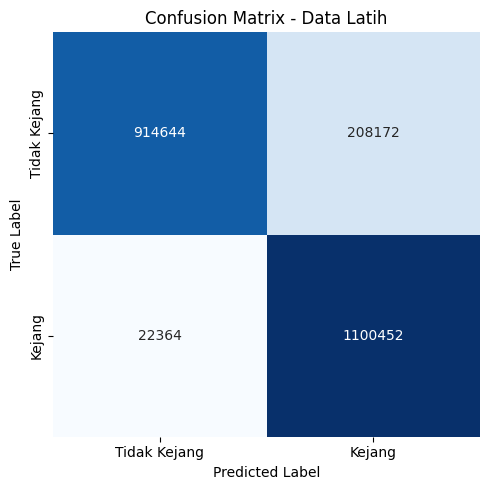

In [ ]:
# Prediksi data latih
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_train_pred = search_model.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9344    0.7920    0.8573    280704
tidak kejang     0.8195    0.9444    0.8775    280704

    accuracy                         0.8682    561408
   macro avg     0.8769    0.8682    0.8674    561408
weighted avg     0.8769    0.8682    0.8674    561408



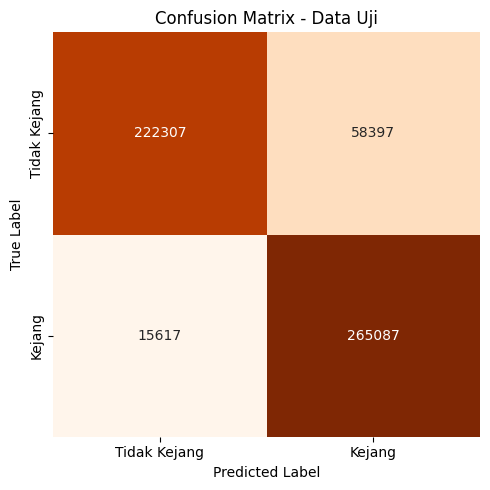

In [ ]:
#pediksi data test
y_test_pred = search_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# GRID RECTANGULAR FFT (skema baru) stratify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/HANNING.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000782,0.000756,0.000241,0.000352,0.001678,0.000133,0.000238,0.000647,0.000334,0.000693,...,0.000513,0.000014,0.000870,0.000256,0.000245,0.000865,6.405581e-04,0.000043,kejang,0.000000
1,0.000791,0.000756,0.000256,0.000372,0.001686,0.000136,0.000259,0.000664,0.000329,0.000707,...,0.000453,0.000036,0.000879,0.000256,0.000259,0.000898,6.308364e-04,0.000033,kejang,0.025000
2,0.000760,0.000750,0.000265,0.000373,0.001661,0.000128,0.000266,0.000673,0.000347,0.000718,...,0.000546,0.000069,0.000896,0.000265,0.000256,0.000885,6.329942e-04,0.000025,kejang,0.050000
3,0.000754,0.000751,0.000249,0.000359,0.001648,0.000135,0.000253,0.000658,0.000355,0.000700,...,0.000563,0.000076,0.000868,0.000249,0.000238,0.000848,6.962496e-04,0.000044,kejang,0.075000
4,0.000824,0.000777,0.000249,0.000375,0.001711,0.000161,0.000258,0.000670,0.000341,0.000692,...,0.000456,0.000113,0.000884,0.000249,0.000260,0.000880,6.893149e-04,0.000046,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398507e-05,0.000054,tidak kejang,127.926471
2807036,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291731e-07,0.000036,tidak kejang,127.941176
2807037,0.000063,0.000082,0.000014,0.000007,0.000010,0.000399,0.000453,0.000045,0.000031,0.000017,...,0.000052,0.000040,0.000007,0.000014,0.000107,0.000013,5.398505e-05,0.000054,tidak kejang,127.955882
2807038,0.000037,0.000011,0.000019,0.000031,0.000060,0.000715,0.000737,0.000048,0.000102,0.000025,...,0.000032,0.000036,0.000002,0.000019,0.000047,0.000055,6.291713e-07,0.000036,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
# ========================
# 2. Setup Stratified K-Fold
# ========================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [20],
}

# Grid Search CV dengan cv=5/pencarian parameter
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

# Lakukan tuning/latih model/cross validation/pembentukan pohon
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)
print("Skor F1 terbaik:", grid_search.best_score_)



Parameter terbaik: {'max_depth': 20, 'n_estimators': 100}
Skor F1 terbaik: 0.868257132416398


In [ ]:
# ========================
# Tampilkan Semua Hasil Tuning
# ========================
# Ubah hasil cv_results_ jadi DataFrame
results_df = pd.DataFrame(grid_search.cv_results_) # cv_results_ atribut bawaan yang otomatis tersedia setelah kamu menjalankan fit()

# Ambil kolom penting dan urutkan berdasarkan skor tertinggi
display_cols = ['params', 'mean_test_score', 'rank_test_score']
sorted_results = results_df[display_cols].sort_values(by='mean_test_score', ascending=False) # nilai tertinggi ke terendah

# Tampilkan hasil
print("\n=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===")
print(sorted_results.to_string(index=False))


=== Semua Kombinasi dan Skornya (diurutkan dari terbaik) ===
                                params  mean_test_score  rank_test_score
{'max_depth': 20, 'n_estimators': 100}         0.868257                1


In [ ]:
# 5. Latih ulang model dengan data training penuh menggunakan parameter terbaik
#best_model = RandomForestClassifier(**best_params, random_state=42) #parameter dimasukkan secara dinamis dari dictionary.

# Latih ulang model terbaik di data training
#best_model.fit(X_train, y_train)

#best_model = grid_search.best_
best_model = grid_search.best_estimator_

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

      kejang     0.9761    0.8146    0.8881   1122816
tidak kejang     0.8409    0.9801    0.9052   1122816

    accuracy                         0.8973   2245632
   macro avg     0.9085    0.8973    0.8966   2245632
weighted avg     0.9085    0.8973    0.8966   2245632



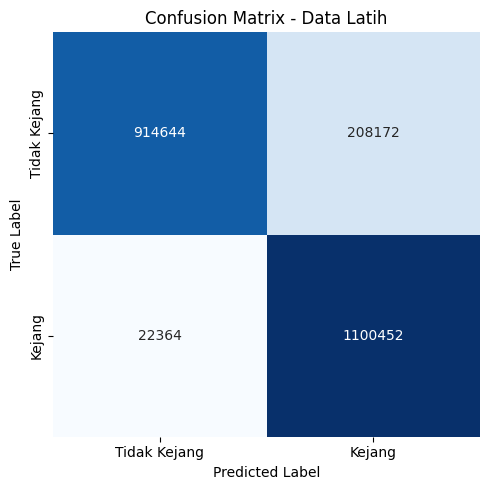

In [ ]:
# Prediksi data latih
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_train_pred = best_model.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

      kejang     0.9344    0.7920    0.8573    280704
tidak kejang     0.8195    0.9444    0.8775    280704

    accuracy                         0.8682    561408
   macro avg     0.8769    0.8682    0.8674    561408
weighted avg     0.8769    0.8682    0.8674    561408



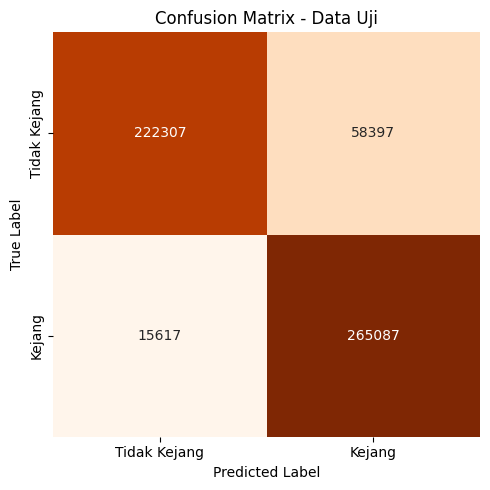

In [ ]:
#pediksi data test
y_test_pred = best_model.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# latihan kalu



In [ ]:
def standar_deviasi(data):
  N = len(data)
  mean = sum(data) / len(data)
  jumlah_kuadrat = 0

  for x in data:
    selisih = x - mean
    kuadrat = selisih ** 2
    jumlah_kuadrat += kuadrat

  rata_kuadrat = jumlah_kuadrat / N
  std = np.sqrt(rata_kuadrat)
  return std

data = np.array([1, 2, 3, 4])
hasil = standar_deviasi(data)
hasil

np.float64(1.118033988749895)

In [ ]:
def standar_deviasi(data):
  N = len(data)
  rata = sum(data) / len(data)
  jumlah_kuadrat = 0

  for x in data:
    selisih = x - rata
    kuadrat = selisih ** 2
    jumlah_kuadrat += kuadrat

  rata_kuadrat = jumlah_kuadrat / N
  std = np.sqrt(rata_kuadrat)
  return std

np.float64(1.118033988749895)

In [ ]:
def standar_deviasi(data):
  N = len(data)
  mean = sum(data) / len(data)
  jumlah_kuadrat = 0

  for x in data:
    selisih = x - mean
    kuadrat = selisih ** 2
    jumlah_kuadrat += kuadrat

  rata_kuadrat = jumlah_kuadrat / N
  std = np.sqrt(rata_kuadrat)

In [ ]:
def cari_mean(x):
  total = 0
  for nilai in x:
    total = total + nilai
  return total / len(x)


In [ ]:
x = np.array([1, 2, 3, 4, 5, 6])

rata = (1 + 2 + 3 + 4 + 5 + 6) / 6
rata

3.5

In [ ]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])

even = x[[0, 2]]
odd = x[[1, 3]]

a0 = even[0] + even[1]
a1 = even[0] - even[1]

b0 = odd[0] + odd[1]
b1 = odd[0] - odd[1]

w0 = np.exp(-2j * np.pi * 0 / 4)
w1 = np.exp(-2j * np.pi * 1 / 4)

k0 = a0 + w0 * b0
k1 = a1 + w1 * b1
k2 = a0 - w0 * b0
k3 = a1 - w1 * b1

hasil_fft = [k0, k1, k2, k3]
hasil_fft

[np.complex128(10+0j),
 np.complex128(-2+2j),
 np.complex128(-2+0j),
 np.complex128(-1.9999999999999998-2j)]

In [ ]:
fft = np.fft.fft(x)
fft

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [ ]:
def cari_max(x):
  maksimum = x[0]
  for nilai in x:
    if nilai > maksimum:
      maksimum = nilai
  return maksimum

x = np.array([1, 2, 3, 4])
print(cari_max(x))

4


In [ ]:
def cari_min(x):
  minimum = x[0]
  for nilai in x:
    if nilai < minimum:
      minimum = nilai
  return minimum

x = np.array([1, 2, 3, 4])
print(cari_min(x))

1


In [ ]:
def cari_energi(x):
  total = 0
  for nilai in x:
    total = total + np.abs(nilai) ** 2
  return total

x = np.array([1, 2, 3, 4])
print(cari_energi(x))

30


In [ ]:
def gini_index(c1,c2):
  cj = c1 + c2
  p1 = (c1/cj) ** 2
  p2 = (c2 / cj) ** 2
  gj = 1 - (p1 + p2)
  return gj

c1 = 2
c2 = 9
hasil = gini_index(c1, c2)
print(hasil)

0.2975206611570247


In [ ]:
def gini_split(ci, cj, gi, gj):
  total = ci + cj
  gini_split = ((ci / total) * gi) + ((cj / total) * gj)
  return gini_split

ci = 10
cj = 15
gi = 0.98
gj = 0.76

hasil = gini_split(ci, cj, gi, gj)
hasil

0.848

In [ ]:
def gini_index(nilai):
  total = sum(nilai)

  gini = 1
  for c in nilai:
    p = c / total
    gini_index = gini - p ** 2

  return gini_index

0.7785467128027681


In [ ]:
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = sum(g)
    gini = gini_index(g)
    gini_split = gini_split + (size / total) * gini
  return gini_split

0.7644444444444445


In [ ]:
list = [10, 4, 38, 2]
list

[10, 4, 38, 2]

In [ ]:
tuples = (3, 5, 7, 1)
tuples

(3, 5, 7, 1)

In [ ]:
tuples[1]

5

In [ ]:
tuples[1] = 'ucup' # tuples nilainya gabisa diganti

TypeError: 'tuple' object does not support item assignment

In [ ]:
list[1] = 'ucup' # kalo list bisa diganti

In [ ]:
list

[10, 'ucup', 38, 2]

In [ ]:
# sets itu gaada index, cuma kumpulan aja
sets = {2, 5, 4, 7, 8, 8}
sets

{2, 4, 5, 7, 8}

In [ ]:
sets[2] # gabisa diambil per index

TypeError: 'set' object is not subscriptable

beda list dan dictionary

In [ ]:
list = ['ucup', 'otong', 'dudung']
list[2]

'dudung'

In [ ]:
dict = {
    'cp':'ucup',
    'tg':'otong',
    'dg':'dudung'
}
dict['dg']

# gunanya buat data terstruktur

'dudung'

In [ ]:
print(len(dict))

3


In [ ]:
print(dict['cp'])

ucup


In [ ]:
class hero:
  pass

hero1 = hero()
hero2 = hero()
hero3 = hero();

hero1.name = 'sniper'
hero1.health = 100

hero2.name = 'seven'
hero2.health = 1000

hero3. name = 'ucup'
hero3.haelth = 400

print(hero1)
print(hero1.__dict__)
print(hero1.name)

{'name': 'sniper', 'health': 100}
sniper


In [ ]:
class Hero:
    def __init__(self, inputname):
        self.name = inputname

hero1 = Hero("sniper")
hero2 = Hero("seven")

print(hero1.name)
print(hero2.name)


sniper
seven


In [ ]:
class Hero:
    def __init__(self, name, health, power, armor):
        self.name = name,
        self.health = health,
        self.power = power,
        self.armor = armor

hero1 = Hero("snaper", 100, 10, 4)
hero2 = Hero("lijak", 100, 25, 4)
hero3 = Hero("arsy", 500, 23, 5)

print(hero1.__dict__)
print(hero1.name)
print(hero2.health)
print(hero3.power)

{'name': ('snaper',), 'health': (100,), 'power': (10,), 'armor': 4}
('snaper',)
(100,)
(23,)


In [ ]:
class Teman:
    def __init__(self, name, umur, alamat, pekerjaan):
        self.name = name
        self.umur = umur
        self.alamat = alamat
        self.pekerjaan = pekerjaan

teman1 = Teman("dede", 23, 'medan', 'mahasiswa')
teman2 = Teman("lijak", 21, 'pga', 'mahasiswa')
teman3 = Teman("arsy", 22, 'balam', 'mahasiswa')

print(teman1.__dict__)
print(teman1.name)
print(teman2.umur)
print(teman3.alamat)

{'name': 'dede', 'umur': 23, 'alamat': 'medan', 'pekerjaan': 'mahasiswa'}
dede
21
balam


In [ ]:
# bikin fungsi + - /
# Class untuk merepresentasikan Buah
class Buah:
    def __init__(self, nama, warna):
        self.nama = nama        # atribut
        self.warna = warna      # atribut

    def info(self):             # method (fungsi di dalam class)
        return f"{self.nama} berwarna {self.warna}"

apel = Buah("Apel", "Merah")
print(apel.info())   # Apel berwarna Merah


Apel berwarna Merah


In [ ]:
class Buah:
    def __init__(self, nama, warna):   # konstruktor
        self.nama = nama               # atribut
        self.warna = warna             # atribut

    def info(self):                    # method
        return f"{self.nama} berwarna {self.warna}"

    def __str__(self):                 # magic method
        return f"Ini buah {self.nama}"

apel = Buah("Apel", "Merah")
print(apel.info())   # Apel berwarna Merah
print(apel)          # Ini buah Apel (otomatis panggil __str__)


Apel berwarna Merah
Ini buah Apel


In [ ]:
from dataclasses import dataclass

@dataclass
class Buah:
    nama: str
    warna: str

    def info(self):
        return f"{self.nama} berwarna {self.warna}"

apel = Buah("Apel", "Merah")
print(apel.info())


Apel berwarna Merah


In [ ]:
import numpy as np

def fft_manual(x):
    N = len(x)
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s += x[n] * np.exp(-2j * np.pi * k * n / N)
        X.append(s)
    return np.array(X)

data = [1,2,3,4,5,6]
print(fft_manual(data))


[21.+0.00000000e+00j -3.+5.19615242e+00j -3.+1.73205081e+00j
 -3.-1.28625053e-14j -3.-1.73205081e+00j -3.-5.19615242e+00j]


In [ ]:
import numpy as np

sinyal = np.array([1, 2, 3, 4, 5, 6])
fft_result = np.fft.fft(sinyal)
print(fft_result)


[21.+0.j         -3.+5.19615242j -3.+1.73205081j -3.+0.j
 -3.-1.73205081j -3.-5.19615242j]


In [ ]:
p = np.arange(10, 50, 10)
p

array([10, 20, 30, 40])

In [ ]:
class Buku:
    def __init__(self, judul, penulis, tahun):
        self.judul = judul
        self.penulis = penulis
        self.tahun = tahun

buku1 = Buku("Belajar Python", "Andi", 2024)
print(buku1.judul, buku1.penulis, buku1.tahun)


Belajar Python Andi 2024


# H - 2

## kodingan asli

In [ ]:
# drive mount
from google.colab import drive
drive.mount ('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
# install mne
! pip install mne
import mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.4 MB/s eta 0:00:00


In [ ]:
# import pandas numpy
import pandas as pd
import numpy as np

In [ ]:
# import data edf
data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb16_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-3748411429.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8', '-'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
/tmp/ipython-input-3748411429.py:2: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')


<RawEDF | chb16_16.edf, 28 x 921600 (3600.0 s), ~26 KiB, data not loaded>

In [ ]:
# ekstraksi data & channel
data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names


In [ ]:
data

array([[-2.80732601e-04,  1.95360195e-07,  5.86080586e-07, ...,
        -1.58241758e-05, -1.73870574e-05, -4.49328449e-06],
       [-2.55921856e-05,  1.95360195e-07,  1.95360195e-07, ...,
        -4.63003663e-05, -3.84859585e-05, -3.34065934e-05],
       [ 6.73992674e-05,  1.95360195e-07,  1.95360195e-07, ...,
        -7.61904762e-06,  9.96336996e-06,  1.15262515e-05],
       ...,
       [ 2.70573871e-04,  1.95360195e-07,  1.95360195e-07, ...,
        -6.30427350e-04, -6.27692308e-04, -6.30036630e-04],
       [-1.36752137e-06,  1.95360195e-07,  5.86080586e-07, ...,
         2.32478632e-05,  1.11355311e-05,  1.73870574e-05],
       [-1.02173382e-04,  1.95360195e-07,  1.95360195e-07, ...,
         5.27472527e-06,  2.36385836e-05,  3.71184371e-06]])

In [ ]:
channel_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 '--0',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 '--1',
 'FZ-CZ',
 'CZ-PZ',
 '--2',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 '--3',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 '--4',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [ ]:
# jadiin dataframe
df1 = pd.DataFrame(data.T, columns=channel_names)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05


In [ ]:
# tambah kolom times
df1['times'] = times
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# drop kolom --0, --1 ..
df1 = df1.drop(['--0', '--1', '--2', '--3', '--4'], axis=1)
df1


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,2.559219e-05,-5.684982e-05,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,3.145299e-05,-6.114774e-05,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-1.074481e-05,-4.942613e-05,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-4.356532e-05,-5.958486e-05,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# simpen df1
df1.to_csv('df1.csv', index=False)


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/TA/df1.csv')
df2

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,2.559219e-05,-5.684982e-05,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,3.145299e-05,-6.114774e-05,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-1.074481e-05,-4.942613e-05,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-4.356532e-05,-5.958486e-05,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# potong data
df2 = df1[(df1['times'] >= 60) & (df1['times'] <= 120)]
df2


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
15360,0.000280,0.000103,-6.818071e-05,0.000008,0.000285,5.274725e-06,-1.367521e-06,3.536020e-05,3.457875e-05,-1.426129e-05,...,-2.324786e-05,1.021734e-04,-0.000054,-9.572650e-06,6.857143e-05,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000
15361,0.000250,0.000055,4.708181e-05,-0.000017,0.000305,1.387057e-05,-2.148962e-06,1.894994e-05,4.239316e-05,-1.504274e-05,...,-7.951160e-05,1.768010e-04,-0.000080,-2.676435e-05,-4.669109e-05,0.000038,1.387057e-05,0.000081,-0.000080,60.003906
15362,0.000243,0.000088,1.582418e-05,-0.000015,0.000307,8.009768e-06,4.102564e-06,1.269841e-05,4.473748e-05,-1.074481e-05,...,-9.982906e-05,8.810745e-05,0.000021,-5.177045e-05,-1.543346e-05,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812
15363,0.000246,0.000116,-2.676435e-05,0.000020,0.000284,2.051282e-05,2.442002e-05,2.442002e-05,5.177045e-05,1.152625e-05,...,-1.178022e-04,7.130647e-05,0.000083,-2.715507e-05,2.715507e-05,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719
15364,0.000280,0.000126,-5.411477e-05,0.000005,0.000262,3.184371e-05,3.965812e-05,2.246642e-05,5.372405e-05,2.598291e-05,...,-8.654457e-05,9.631258e-05,0.000026,-1.953602e-07,5.450549e-05,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30716,-0.000017,0.000012,1.934066e-05,-0.000006,-0.000004,7.619048e-06,2.539683e-06,5.860806e-07,3.711844e-06,1.953602e-07,...,1.113553e-05,3.887668e-05,-0.000031,-8.791209e-06,-1.894994e-05,-0.000018,4.043956e-05,0.000036,-0.000031,119.984375
30717,-0.000016,0.000015,1.269841e-05,-0.000008,-0.000006,8.400488e-06,2.930403e-06,-2.148962e-06,1.953602e-07,1.953602e-07,...,1.035409e-05,2.012210e-05,-0.000010,-5.274725e-06,-1.230769e-05,-0.000017,3.028083e-05,0.000008,-0.000010,119.988281
30718,-0.000013,0.000014,6.446886e-06,-0.000011,-0.000011,4.102564e-06,2.148962e-06,1.953602e-07,-6.837607e-06,-1.758242e-06,...,5.274725e-06,1.953602e-07,0.000015,-8.400488e-06,-6.056166e-06,-0.000024,1.582418e-05,-0.000008,0.000015,119.992188
30719,-0.000011,0.000015,9.768010e-07,-0.000016,-0.000015,9.768010e-07,1.367521e-06,1.758242e-06,-1.191697e-05,-4.493284e-06,...,5.860806e-07,3.711844e-06,0.000023,-1.387057e-05,-5.860806e-07,-0.000027,1.367521e-06,-0.000003,0.000023,119.996094


In [ ]:
# labelin data
def label(baris):
  if 80 <= baris['times'] <= 100:
    return 'kejang'
  else:
    return 'tidak kejang'

df2['seizure'] = df2.apply(label, axis=1)
df2


/tmp/ipython-input-2170844728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['seizure'] = df2.apply(label, axis=1)


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure
15360,0.000280,0.000103,-6.818071e-05,0.000008,0.000285,5.274725e-06,-1.367521e-06,3.536020e-05,3.457875e-05,-1.426129e-05,...,1.021734e-04,-0.000054,-9.572650e-06,6.857143e-05,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,tidak kejang
15361,0.000250,0.000055,4.708181e-05,-0.000017,0.000305,1.387057e-05,-2.148962e-06,1.894994e-05,4.239316e-05,-1.504274e-05,...,1.768010e-04,-0.000080,-2.676435e-05,-4.669109e-05,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,tidak kejang
15362,0.000243,0.000088,1.582418e-05,-0.000015,0.000307,8.009768e-06,4.102564e-06,1.269841e-05,4.473748e-05,-1.074481e-05,...,8.810745e-05,0.000021,-5.177045e-05,-1.543346e-05,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,tidak kejang
15363,0.000246,0.000116,-2.676435e-05,0.000020,0.000284,2.051282e-05,2.442002e-05,2.442002e-05,5.177045e-05,1.152625e-05,...,7.130647e-05,0.000083,-2.715507e-05,2.715507e-05,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,tidak kejang
15364,0.000280,0.000126,-5.411477e-05,0.000005,0.000262,3.184371e-05,3.965812e-05,2.246642e-05,5.372405e-05,2.598291e-05,...,9.631258e-05,0.000026,-1.953602e-07,5.450549e-05,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30716,-0.000017,0.000012,1.934066e-05,-0.000006,-0.000004,7.619048e-06,2.539683e-06,5.860806e-07,3.711844e-06,1.953602e-07,...,3.887668e-05,-0.000031,-8.791209e-06,-1.894994e-05,-0.000018,4.043956e-05,0.000036,-0.000031,119.984375,tidak kejang
30717,-0.000016,0.000015,1.269841e-05,-0.000008,-0.000006,8.400488e-06,2.930403e-06,-2.148962e-06,1.953602e-07,1.953602e-07,...,2.012210e-05,-0.000010,-5.274725e-06,-1.230769e-05,-0.000017,3.028083e-05,0.000008,-0.000010,119.988281,tidak kejang
30718,-0.000013,0.000014,6.446886e-06,-0.000011,-0.000011,4.102564e-06,2.148962e-06,1.953602e-07,-6.837607e-06,-1.758242e-06,...,1.953602e-07,0.000015,-8.400488e-06,-6.056166e-06,-0.000024,1.582418e-05,-0.000008,0.000015,119.992188,tidak kejang
30719,-0.000011,0.000015,9.768010e-07,-0.000016,-0.000015,9.768010e-07,1.367521e-06,1.758242e-06,-1.191697e-05,-4.493284e-06,...,3.711844e-06,0.000023,-1.387057e-05,-5.860806e-07,-0.000027,1.367521e-06,-0.000003,0.000023,119.996094,tidak kejang


In [ ]:
# cek jumlah label
df2['seizure'].value_counts()

,count
seizure,
tidak kejang,10240
kejang,5121


In [ ]:
# Memisahkan data berdasarkan label
df_1 = df2[df2['seizure'] == 'kejang']
df_2 = df2[df2['seizure'] == 'tidak kejang']


In [ ]:
df_1

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure
20480,0.000090,-2.285714e-05,0.000047,-0.000007,0.000085,-0.000010,0.000015,0.000016,0.000016,-0.000007,...,-0.000031,0.000007,0.000066,-0.000046,0.000088,-0.000048,-0.000089,0.000007,80.000000,kejang
20481,0.000092,-3.301587e-05,0.000044,0.000012,0.000085,-0.000003,0.000015,0.000016,0.000033,-0.000008,...,-0.000024,0.000006,0.000067,-0.000044,0.000106,-0.000031,-0.000094,0.000006,80.003906,kejang
20482,0.000046,-4.884005e-06,0.000003,0.000049,0.000047,0.000003,0.000015,0.000028,0.000041,-0.000006,...,0.000022,-0.000007,0.000046,-0.000002,0.000074,-0.000017,-0.000044,-0.000007,80.007812,kejang
20483,0.000031,-1.953602e-07,-0.000004,0.000049,0.000028,0.000005,0.000015,0.000028,0.000040,-0.000006,...,0.000022,0.000021,0.000027,0.000004,0.000067,-0.000028,-0.000031,0.000021,80.011719,kejang
20484,0.000042,1.074481e-05,-0.000033,0.000071,0.000039,0.000003,0.000012,0.000038,0.000032,-0.000009,...,0.000006,0.000035,0.000031,0.000033,0.000067,-0.000054,-0.000034,0.000035,80.015625,kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25596,0.000002,8.068376e-05,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,-0.000021,0.000062,0.000053,0.000031,-0.000124,-0.000031,-0.000004,0.000062,99.984375,kejang
25597,-0.000010,6.466422e-05,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,-0.000038,0.000075,0.000080,0.000006,-0.000112,-0.000030,-0.000015,0.000075,99.988281,kejang
25598,-0.000018,5.919414e-05,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,-0.000034,0.000069,0.000076,0.000005,-0.000116,-0.000033,-0.000002,0.000069,99.992188,kejang
25599,-0.000020,6.388278e-05,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,-0.000031,0.000062,0.000068,0.000015,-0.000127,-0.000015,-0.000011,0.000062,99.996094,kejang


In [ ]:
df_2

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure
15360,0.000280,0.000103,-6.818071e-05,0.000008,0.000285,5.274725e-06,-1.367521e-06,3.536020e-05,3.457875e-05,-1.426129e-05,...,1.021734e-04,-0.000054,-9.572650e-06,6.857143e-05,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,tidak kejang
15361,0.000250,0.000055,4.708181e-05,-0.000017,0.000305,1.387057e-05,-2.148962e-06,1.894994e-05,4.239316e-05,-1.504274e-05,...,1.768010e-04,-0.000080,-2.676435e-05,-4.669109e-05,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,tidak kejang
15362,0.000243,0.000088,1.582418e-05,-0.000015,0.000307,8.009768e-06,4.102564e-06,1.269841e-05,4.473748e-05,-1.074481e-05,...,8.810745e-05,0.000021,-5.177045e-05,-1.543346e-05,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,tidak kejang
15363,0.000246,0.000116,-2.676435e-05,0.000020,0.000284,2.051282e-05,2.442002e-05,2.442002e-05,5.177045e-05,1.152625e-05,...,7.130647e-05,0.000083,-2.715507e-05,2.715507e-05,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,tidak kejang
15364,0.000280,0.000126,-5.411477e-05,0.000005,0.000262,3.184371e-05,3.965812e-05,2.246642e-05,5.372405e-05,2.598291e-05,...,9.631258e-05,0.000026,-1.953602e-07,5.450549e-05,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30716,-0.000017,0.000012,1.934066e-05,-0.000006,-0.000004,7.619048e-06,2.539683e-06,5.860806e-07,3.711844e-06,1.953602e-07,...,3.887668e-05,-0.000031,-8.791209e-06,-1.894994e-05,-0.000018,4.043956e-05,0.000036,-0.000031,119.984375,tidak kejang
30717,-0.000016,0.000015,1.269841e-05,-0.000008,-0.000006,8.400488e-06,2.930403e-06,-2.148962e-06,1.953602e-07,1.953602e-07,...,2.012210e-05,-0.000010,-5.274725e-06,-1.230769e-05,-0.000017,3.028083e-05,0.000008,-0.000010,119.988281,tidak kejang
30718,-0.000013,0.000014,6.446886e-06,-0.000011,-0.000011,4.102564e-06,2.148962e-06,1.953602e-07,-6.837607e-06,-1.758242e-06,...,1.953602e-07,0.000015,-8.400488e-06,-6.056166e-06,-0.000024,1.582418e-05,-0.000008,0.000015,119.992188,tidak kejang
30719,-0.000011,0.000015,9.768010e-07,-0.000016,-0.000015,9.768010e-07,1.367521e-06,1.758242e-06,-1.191697e-05,-4.493284e-06,...,3.711844e-06,0.000023,-1.387057e-05,-5.860806e-07,-0.000027,1.367521e-06,-0.000003,0.000023,119.996094,tidak kejang


In [ ]:
# Menampilkan jumlah data di masing-masing kategori
print(len(df_1))
print(len(df_2))

5121
10240


In [ ]:
# gabung pake concat jadi df_potong
df_potong = pd.concat([df_1, df_2])
df_potong

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure
20480,0.000090,-2.285714e-05,4.669109e-05,-0.000007,0.000085,-1.035409e-05,1.543346e-05,1.621490e-05,1.582418e-05,-6.837607e-06,...,-3.145299e-05,0.000007,0.000066,-4.630037e-05,0.000088,-4.825397e-05,-0.000089,0.000007,80.000000,kejang
20481,0.000092,-3.301587e-05,4.395604e-05,0.000012,0.000085,-2.539683e-06,1.543346e-05,1.621490e-05,3.262515e-05,-7.619048e-06,...,-2.442002e-05,0.000006,0.000067,-4.356532e-05,0.000106,-3.106227e-05,-0.000094,0.000006,80.003906,kejang
20482,0.000046,-4.884005e-06,2.539683e-06,0.000049,0.000047,2.539683e-06,1.465201e-05,2.793651e-05,4.083028e-05,-6.056166e-06,...,2.168498e-05,-0.000007,0.000046,-2.148962e-06,0.000074,-1.660562e-05,-0.000044,-0.000007,80.007812,kejang
20483,0.000031,-1.953602e-07,-3.711844e-06,0.000049,0.000028,5.274725e-06,1.465201e-05,2.754579e-05,3.965812e-05,-6.446886e-06,...,2.207570e-05,0.000021,0.000027,4.102564e-06,0.000067,-2.793651e-05,-0.000031,0.000021,80.011719,kejang
20484,0.000042,1.074481e-05,-3.262515e-05,0.000071,0.000039,2.539683e-06,1.152625e-05,3.770452e-05,3.184371e-05,-9.181929e-06,...,6.446886e-06,0.000035,0.000031,3.301587e-05,0.000067,-5.411477e-05,-0.000034,0.000035,80.015625,kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30716,-0.000017,1.191697e-05,1.934066e-05,-0.000006,-0.000004,7.619048e-06,2.539683e-06,5.860806e-07,3.711844e-06,1.953602e-07,...,3.887668e-05,-0.000031,-0.000009,-1.894994e-05,-0.000018,4.043956e-05,0.000036,-0.000031,119.984375,tidak kejang
30717,-0.000016,1.465201e-05,1.269841e-05,-0.000008,-0.000006,8.400488e-06,2.930403e-06,-2.148962e-06,1.953602e-07,1.953602e-07,...,2.012210e-05,-0.000010,-0.000005,-1.230769e-05,-0.000017,3.028083e-05,0.000008,-0.000010,119.988281,tidak kejang
30718,-0.000013,1.426129e-05,6.446886e-06,-0.000011,-0.000011,4.102564e-06,2.148962e-06,1.953602e-07,-6.837607e-06,-1.758242e-06,...,1.953602e-07,0.000015,-0.000008,-6.056166e-06,-0.000024,1.582418e-05,-0.000008,0.000015,119.992188,tidak kejang
30719,-0.000011,1.504274e-05,9.768010e-07,-0.000016,-0.000015,9.768010e-07,1.367521e-06,1.758242e-06,-1.191697e-05,-4.493284e-06,...,3.711844e-06,0.000023,-0.000014,-5.860806e-07,-0.000027,1.367521e-06,-0.000003,0.000023,119.996094,tidak kejang


In [ ]:
# simpen data yang udah dipotong & dilabel
df_1.to_csv('df_1.csv', index=False)
df_2.to_csv('df_2.csv', index=False)

In [ ]:
# simpan df potong
df_potong.to_csv('df_potong.csv', index=False)

In [ ]:
# import df2
df2 = pd.read_csv('/content/drive/MyDrive/TA/df_potong.csv')
df2


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure
0,0.000090,-2.285714e-05,4.669109e-05,-0.000007,0.000085,-1.035409e-05,1.543346e-05,1.621490e-05,1.582418e-05,-6.837607e-06,...,-3.145299e-05,0.000007,0.000066,-4.630037e-05,0.000088,-4.825397e-05,-0.000089,0.000007,80.000000,kejang
1,0.000092,-3.301587e-05,4.395604e-05,0.000012,0.000085,-2.539683e-06,1.543346e-05,1.621490e-05,3.262515e-05,-7.619048e-06,...,-2.442002e-05,0.000006,0.000067,-4.356532e-05,0.000106,-3.106227e-05,-0.000094,0.000006,80.003906,kejang
2,0.000046,-4.884005e-06,2.539683e-06,0.000049,0.000047,2.539683e-06,1.465201e-05,2.793651e-05,4.083028e-05,-6.056166e-06,...,2.168498e-05,-0.000007,0.000046,-2.148962e-06,0.000074,-1.660562e-05,-0.000044,-0.000007,80.007812,kejang
3,0.000031,-1.953602e-07,-3.711844e-06,0.000049,0.000028,5.274725e-06,1.465201e-05,2.754579e-05,3.965812e-05,-6.446886e-06,...,2.207570e-05,0.000021,0.000027,4.102564e-06,0.000067,-2.793651e-05,-0.000031,0.000021,80.011719,kejang
4,0.000042,1.074481e-05,-3.262515e-05,0.000071,0.000039,2.539683e-06,1.152625e-05,3.770452e-05,3.184371e-05,-9.181929e-06,...,6.446886e-06,0.000035,0.000031,3.301587e-05,0.000067,-5.411477e-05,-0.000034,0.000035,80.015625,kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15356,-0.000017,1.191697e-05,1.934066e-05,-0.000006,-0.000004,7.619048e-06,2.539683e-06,5.860806e-07,3.711844e-06,1.953602e-07,...,3.887668e-05,-0.000031,-0.000009,-1.894994e-05,-0.000018,4.043956e-05,0.000036,-0.000031,119.984375,tidak kejang
15357,-0.000016,1.465201e-05,1.269841e-05,-0.000008,-0.000006,8.400488e-06,2.930403e-06,-2.148962e-06,1.953602e-07,1.953602e-07,...,2.012210e-05,-0.000010,-0.000005,-1.230769e-05,-0.000017,3.028083e-05,0.000008,-0.000010,119.988281,tidak kejang
15358,-0.000013,1.426129e-05,6.446886e-06,-0.000011,-0.000011,4.102564e-06,2.148962e-06,1.953602e-07,-6.837607e-06,-1.758242e-06,...,1.953602e-07,0.000015,-0.000008,-6.056166e-06,-0.000024,1.582418e-05,-0.000008,0.000015,119.992188,tidak kejang
15359,-0.000011,1.504274e-05,9.768010e-07,-0.000016,-0.000015,9.768010e-07,1.367521e-06,1.758242e-06,-1.191697e-05,-4.493284e-06,...,3.711844e-06,0.000023,-0.000014,-5.860806e-07,-0.000027,1.367521e-06,-0.000003,0.000023,119.996094,tidak kejang


In [ ]:
# df 3 = hapus kolom time dan seizure
df3 = df2.drop(['times', 'seizure'], axis=1)
df3


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000090,-2.285714e-05,4.669109e-05,-0.000007,0.000085,-1.035409e-05,1.543346e-05,1.621490e-05,1.582418e-05,-6.837607e-06,...,-0.000017,-2.363858e-05,-3.145299e-05,0.000007,0.000066,-4.630037e-05,0.000088,-4.825397e-05,-0.000089,0.000007
1,0.000092,-3.301587e-05,4.395604e-05,0.000012,0.000085,-2.539683e-06,1.543346e-05,1.621490e-05,3.262515e-05,-7.619048e-06,...,-0.000009,-2.012210e-05,-2.442002e-05,0.000006,0.000067,-4.356532e-05,0.000106,-3.106227e-05,-0.000094,0.000006
2,0.000046,-4.884005e-06,2.539683e-06,0.000049,0.000047,2.539683e-06,1.465201e-05,2.793651e-05,4.083028e-05,-6.056166e-06,...,-0.000010,-3.340659e-05,2.168498e-05,-0.000007,0.000046,-2.148962e-06,0.000074,-1.660562e-05,-0.000044,-0.000007
3,0.000031,-1.953602e-07,-3.711844e-06,0.000049,0.000028,5.274725e-06,1.465201e-05,2.754579e-05,3.965812e-05,-6.446886e-06,...,-0.000016,-4.825397e-05,2.207570e-05,0.000021,0.000027,4.102564e-06,0.000067,-2.793651e-05,-0.000031,0.000021
4,0.000042,1.074481e-05,-3.262515e-05,0.000071,0.000039,2.539683e-06,1.152625e-05,3.770452e-05,3.184371e-05,-9.181929e-06,...,-0.000017,-4.200244e-05,6.446886e-06,0.000035,0.000031,3.301587e-05,0.000067,-5.411477e-05,-0.000034,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15356,-0.000017,1.191697e-05,1.934066e-05,-0.000006,-0.000004,7.619048e-06,2.539683e-06,5.860806e-07,3.711844e-06,1.953602e-07,...,0.000011,1.113553e-05,3.887668e-05,-0.000031,-0.000009,-1.894994e-05,-0.000018,4.043956e-05,0.000036,-0.000031
15357,-0.000016,1.465201e-05,1.269841e-05,-0.000008,-0.000006,8.400488e-06,2.930403e-06,-2.148962e-06,1.953602e-07,1.953602e-07,...,0.000013,1.035409e-05,2.012210e-05,-0.000010,-0.000005,-1.230769e-05,-0.000017,3.028083e-05,0.000008,-0.000010
15358,-0.000013,1.426129e-05,6.446886e-06,-0.000011,-0.000011,4.102564e-06,2.148962e-06,1.953602e-07,-6.837607e-06,-1.758242e-06,...,0.000013,5.274725e-06,1.953602e-07,0.000015,-0.000008,-6.056166e-06,-0.000024,1.582418e-05,-0.000008,0.000015
15359,-0.000011,1.504274e-05,9.768010e-07,-0.000016,-0.000015,9.768010e-07,1.367521e-06,1.758242e-06,-1.191697e-05,-4.493284e-06,...,0.000008,5.860806e-07,3.711844e-06,0.000023,-0.000014,-5.860806e-07,-0.000027,1.367521e-06,-0.000003,0.000023


In [ ]:
# buat respon impulse hamming
from scipy.signal import firwin

fs = 256
f1 = 1
f2 = 50
numtaps = 20
nyquist = fs / 2

normalisasi = [f1/nyquist, f2/nyquist]

taps_hamming = firwin(numtaps, normalisasi, window='hamming', pass_zero='bandpass')
taps_hamming


array([-2.73917693e-03, -4.14347389e-03,  2.71549984e-04,  1.18022194e-02,
        7.80554219e-03, -3.27773241e-02, -6.60766939e-02,  1.33074315e-03,
        1.86255719e-01,  3.57376545e-01,  3.57376545e-01,  1.86255719e-01,
        1.33074315e-03, -6.60766939e-02, -3.27773241e-02,  7.80554219e-03,
        1.18022194e-02,  2.71549984e-04, -4.14347389e-03, -2.73917693e-03])

In [ ]:
# buat respon impulse hann
from scipy.signal import firwin

fs = 256
f1 = 1
f2 = 50
numtaps = 20
nyquist = fs / 2

normalisasi = [f1/nyquist, f2/nyquist]

taps_hanning = firwin(numtaps, normalisasi, window='hann', pass_zero='bandpass')
taps_hanning


array([-0.00000000e+00, -1.06400509e-03,  1.60869663e-04,  9.21942103e-03,
        6.85737551e-03, -3.05287239e-02, -6.35461049e-02,  1.30341711e-03,
        1.84293661e-01,  3.55230842e-01,  3.55230842e-01,  1.84293661e-01,
        1.30341711e-03, -6.35461049e-02, -3.05287239e-02,  6.85737551e-03,
        9.21942103e-03,  1.60869663e-04, -1.06400509e-03, -0.00000000e+00])

In [ ]:
# buat respon impulse rectangular / boxcar
from scipy.signal import firwin

fs = 256
f1 = 1
f2 = 50
numtaps = 20
nyquist = fs / 2

normalisasi = [f1/nyquist, f2/nyquist]

taps_boxcar = firwin(numtaps, normalisasi, window='boxcar', pass_zero='bandpass')
taps_boxcar


array([-0.03654622, -0.04215041,  0.00163757,  0.04367923,  0.01950786,
       -0.06052964, -0.09730933,  0.001668  ,  0.21047152,  0.38385891,
        0.38385891,  0.21047152,  0.001668  , -0.09730933, -0.06052964,
        0.01950786,  0.04367923,  0.00163757, -0.04215041, -0.03654622])

In [ ]:
# buat respon impulse blackman
from scipy.signal import firwin

fs = 256
f1 = 1
f2 = 50
numtaps = 20
nyquist = fs / 2

normalisasi = [f1/nyquist, f2/nyquist]

taps_blackman = firwin(numtaps, normalisasi, window='blackman', pass_zero='bandpass')
taps_blackman


array([ 4.87699216e-19, -4.14336709e-04,  7.09681556e-05,  4.80455868e-03,
        4.25629972e-03, -2.22563304e-02, -5.30237472e-02,  1.20621236e-03,
        1.82855235e-01,  3.64997338e-01,  3.64997338e-01,  1.82855235e-01,
        1.20621236e-03, -5.30237472e-02, -2.22563304e-02,  4.25629972e-03,
        4.80455868e-03,  7.09681556e-05, -4.14336709e-04,  4.87699216e-19])

In [ ]:
# konvolusi filtering
from scipy.signal import lfilter

filtering_blackman = lfilter(taps_blackman, 1, df3)
filtering_blackman


array([[ 4.41132576e-23, -3.74774889e-08,  1.58897487e-08, ...,
         4.62027180e-06,  1.17163812e-05,  3.96881114e-06],
       [ 4.48754737e-23, -3.81250481e-08,  2.02097983e-08, ...,
         4.33720704e-06,  1.35898339e-05,  9.20757024e-06],
       [ 2.23900983e-23, -1.90220516e-08,  5.28174541e-09, ...,
         3.28033430e-06,  1.22381510e-05,  9.12543200e-06],
       ...,
       [-6.38355995e-24,  5.42330833e-09, -6.83788937e-09, ...,
         2.71641185e-06, -1.64344554e-06, -2.50833088e-06],
       [-5.24023578e-24,  4.45196953e-09, -6.99529674e-09, ...,
         3.64401976e-06, -5.21172901e-07, -3.13907352e-06],
       [-8.28910024e-24,  7.04220634e-09, -2.25848240e-09, ...,
         3.02557213e-06, -7.13288486e-08, -1.92412963e-06]])

In [ ]:
# fft
fft = np.fft.fft(filtering_blackman)
fft

array([[ 2.29946450e-04+0.00000000e+00j, -1.52457074e-04+3.75574441e-05j,
         8.31651400e-05+1.65975290e-06j, ...,
         6.90200463e-06+1.39128478e-06j,  8.31651400e-05-1.65975290e-06j,
        -1.52457074e-04-3.75574441e-05j],
       [ 2.65920520e-04+0.00000000e+00j, -1.57551424e-04+6.64593181e-05j,
         7.97821955e-05-1.51856263e-05j, ...,
         1.32543990e-05-1.47955057e-05j,  7.97821955e-05+1.51856263e-05j,
        -1.57551424e-04-6.64593181e-05j],
       [ 2.28217096e-04+0.00000000e+00j, -1.14066398e-04+9.30959570e-05j,
         3.71541746e-05-3.69912155e-05j, ...,
         1.44998901e-05-1.50173048e-05j,  3.71541746e-05+3.69912155e-05j,
        -1.14066398e-04-9.30959570e-05j],
       ...,
       [-7.84098160e-06+0.00000000e+00j,  7.91641585e-06+5.09361570e-07j,
        -5.79271245e-06+1.07667874e-05j, ...,
        -1.58689903e-05+1.23679233e-05j, -5.79271245e-06-1.07667874e-05j,
         7.91641585e-06-5.09361570e-07j],
       [-2.66140282e-05+0.00000000e+00j,  2.

In [ ]:
# ambil kolom frekuensi
frekuensi = np.fft.fftfreq(len(fft))
frekuensi


array([ 0.00000000e+00,  6.50999284e-05,  1.30199857e-04, ...,
       -1.95299785e-04, -1.30199857e-04, -6.50999284e-05])

In [ ]:
# jadiin magnitudo
magnitudo = np.abs(fft)
magnitudo


array([[2.29946450e-04, 1.57015034e-04, 8.31817004e-05, ...,
        7.04083384e-06, 8.31817004e-05, 1.57015034e-04],
       [2.65920520e-04, 1.70995006e-04, 8.12145428e-05, ...,
        1.98641909e-05, 8.12145428e-05, 1.70995006e-04],
       [2.28217096e-04, 1.47234508e-04, 5.24288347e-05, ...,
        2.08750151e-05, 5.24288347e-05, 1.47234508e-04],
       ...,
       [7.84098160e-06, 7.93278571e-06, 1.22261698e-05, ...,
        2.01194031e-05, 1.22261698e-05, 7.93278571e-06],
       [2.66140282e-05, 2.41574982e-05, 2.54248706e-05, ...,
        2.11850460e-05, 2.54248706e-05, 2.41574982e-05],
       [4.62537570e-05, 4.05875544e-05, 2.59404068e-05, ...,
        1.41314396e-05, 2.59404068e-05, 4.05875544e-05]])

In [ ]:
# jadiin dataframe buat df4
df4 = pd.DataFrame(magnitudo, columns=df3.columns)
df4

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000230,0.000157,0.000083,0.000007,0.000053,0.000015,0.000027,0.000008,0.000005,3.691755e-06,...,2.851361e-06,3.691755e-06,0.000005,0.000008,0.000027,0.000015,0.000053,0.000007,0.000083,0.000157
1,0.000266,0.000171,0.000081,0.000020,0.000043,0.000034,0.000031,0.000007,0.000004,2.719934e-06,...,1.656990e-06,2.719934e-06,0.000004,0.000007,0.000031,0.000034,0.000043,0.000020,0.000081,0.000171
2,0.000228,0.000147,0.000052,0.000021,0.000019,0.000041,0.000029,0.000006,0.000004,2.585570e-06,...,1.887184e-06,2.585570e-06,0.000004,0.000006,0.000029,0.000041,0.000019,0.000021,0.000052,0.000147
3,0.000194,0.000128,0.000039,0.000015,0.000019,0.000034,0.000028,0.000009,0.000005,3.606191e-06,...,2.768726e-06,3.606191e-06,0.000005,0.000009,0.000028,0.000034,0.000019,0.000015,0.000039,0.000128
4,0.000222,0.000143,0.000041,0.000024,0.000026,0.000029,0.000033,0.000010,0.000006,4.658502e-06,...,3.815267e-06,4.658502e-06,0.000006,0.000010,0.000033,0.000029,0.000026,0.000024,0.000041,0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15356,0.000024,0.000020,0.000010,0.000018,0.000023,0.000008,0.000010,0.000006,0.000005,4.586486e-06,...,4.316862e-06,4.586486e-06,0.000005,0.000006,0.000010,0.000008,0.000023,0.000018,0.000010,0.000020
15357,0.000017,0.000015,0.000003,0.000020,0.000012,0.000013,0.000011,0.000004,0.000003,2.430072e-06,...,2.207424e-06,2.430072e-06,0.000003,0.000004,0.000011,0.000013,0.000012,0.000020,0.000003,0.000015
15358,0.000008,0.000008,0.000012,0.000020,0.000006,0.000019,0.000010,0.000002,0.000001,9.989580e-07,...,7.529270e-07,9.989580e-07,0.000001,0.000002,0.000010,0.000019,0.000006,0.000020,0.000012,0.000008
15359,0.000027,0.000024,0.000025,0.000021,0.000012,0.000025,0.000010,0.000003,0.000002,1.819197e-06,...,1.609766e-06,1.819197e-06,0.000002,0.000003,0.000010,0.000025,0.000012,0.000021,0.000025,0.000024


In [ ]:
# tambahin kolom seizure & times dari df2
df4['times'] = df2['times']
df4['seizure'] = df2['seizure']

In [ ]:
# tambahin kolom frekuensi
df4['frekuensi'] = frekuensi
df4

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure,frekuensi
0,0.000230,0.000157,0.000083,0.000007,0.000053,0.000015,0.000027,0.000008,0.000005,3.691755e-06,...,0.000008,0.000027,0.000015,0.000053,0.000007,0.000083,0.000157,80.000000,kejang,0.000000
1,0.000266,0.000171,0.000081,0.000020,0.000043,0.000034,0.000031,0.000007,0.000004,2.719934e-06,...,0.000007,0.000031,0.000034,0.000043,0.000020,0.000081,0.000171,80.003906,kejang,0.000065
2,0.000228,0.000147,0.000052,0.000021,0.000019,0.000041,0.000029,0.000006,0.000004,2.585570e-06,...,0.000006,0.000029,0.000041,0.000019,0.000021,0.000052,0.000147,80.007812,kejang,0.000130
3,0.000194,0.000128,0.000039,0.000015,0.000019,0.000034,0.000028,0.000009,0.000005,3.606191e-06,...,0.000009,0.000028,0.000034,0.000019,0.000015,0.000039,0.000128,80.011719,kejang,0.000195
4,0.000222,0.000143,0.000041,0.000024,0.000026,0.000029,0.000033,0.000010,0.000006,4.658502e-06,...,0.000010,0.000033,0.000029,0.000026,0.000024,0.000041,0.000143,80.015625,kejang,0.000260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15356,0.000024,0.000020,0.000010,0.000018,0.000023,0.000008,0.000010,0.000006,0.000005,4.586486e-06,...,0.000006,0.000010,0.000008,0.000023,0.000018,0.000010,0.000020,119.984375,tidak kejang,-0.000325
15357,0.000017,0.000015,0.000003,0.000020,0.000012,0.000013,0.000011,0.000004,0.000003,2.430072e-06,...,0.000004,0.000011,0.000013,0.000012,0.000020,0.000003,0.000015,119.988281,tidak kejang,-0.000260
15358,0.000008,0.000008,0.000012,0.000020,0.000006,0.000019,0.000010,0.000002,0.000001,9.989580e-07,...,0.000002,0.000010,0.000019,0.000006,0.000020,0.000012,0.000008,119.992188,tidak kejang,-0.000195
15359,0.000027,0.000024,0.000025,0.000021,0.000012,0.000025,0.000010,0.000003,0.000002,1.819197e-06,...,0.000003,0.000010,0.000025,0.000012,0.000021,0.000025,0.000024,119.996094,tidak kejang,-0.000130


In [ ]:
# simpen df4
df4.to_csv('df4.csv', index=False)

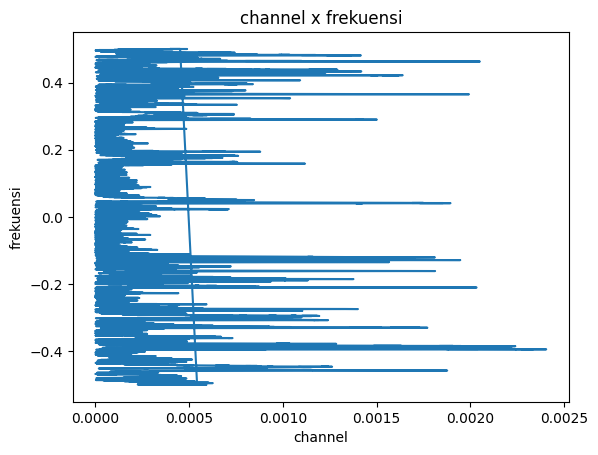

In [ ]:
# buat plot
import matplotlib.pyplot as plt
plt.plot(df4['FP1-F7'], df4['frekuensi'])
plt.xlabel('channel')
plt.ylabel('frekuensi')
plt.title('channel x frekuensi')
plt.show()

## random forest

In [ ]:
# import library buat rdf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')
%cd /content/drive/MyDrive/TA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


In [ ]:
# import mydata
import pandas as pd
mydata = pd.read_csv('/content/drive/MyDrive/TA/fft_chb16_16.csv')
mydata

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000759,0.000068,0.000240,0.000172,0.001114,0.000437,0.000072,0.000371,0.001558,0.000496,...,0.001002,0.001755,0.000117,0.000239,0.000267,0.000331,0.002075,0.000271,kejang,0.000000
1,0.000780,0.000078,0.000262,0.000178,0.001139,0.000473,0.000152,0.000375,0.001592,0.000505,...,0.001009,0.001789,0.000172,0.000260,0.000267,0.000447,0.002100,0.000291,kejang,0.166667
2,0.000862,0.000117,0.000322,0.000197,0.001220,0.000581,0.000295,0.000390,0.001714,0.000535,...,0.001031,0.001899,0.000294,0.000321,0.000272,0.000731,0.002181,0.000352,kejang,0.333333
3,0.001040,0.000214,0.000423,0.000234,0.001337,0.000771,0.000494,0.000420,0.001961,0.000588,...,0.001070,0.002129,0.000478,0.000422,0.000309,0.001192,0.002337,0.000464,kejang,0.500000
4,0.001808,0.000431,0.000981,0.000622,0.002003,0.001396,0.001006,0.000511,0.002896,0.000881,...,0.000959,0.003096,0.001038,0.000981,0.000420,0.002118,0.002624,0.001064,kejang,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.166667
1532,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000037,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.333333
1533,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.500000
1534,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000036,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.666667


In [ ]:
# bagi data x dan y
x = mydata.drop(['seizure', 'frekuensi'], axis=1)
y = mydata['seizure']

In [ ]:
# bagi data train test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=y, random_state=42)


In [ ]:
# inisiasi skf & rf & param grid

rf = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid ={
    'max_depth' : [10, 20]
}

In [ ]:
# lakukan pencarian grid search
grid_search = GridSearchCV(
    estimator = rf,
    cv = skf,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = -1
)

In [ ]:
# fit grid search
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20]}, scoring='accuracy')

In [ ]:
# liat best_params_
best_params = grid_search.best_params_
best_params


{'max_depth': 10}

In [ ]:
# latih ulang data latih pake best param / best model

best_model = RandomForestClassifier(**best_params, random_state=42)
best_model

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# klasifikasi report data train
best_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# confusion matrix data latih
y_train_pred = best_model.predict(x_train)
y_train_pred


array(['kejang', 'kejang', 'kejang', ..., 'tidak kejang', 'tidak kejang',
       'kejang'], dtype=object)

In [ ]:
# cm train
print(confusion_matrix(y_train, y_train_pred))

[[608   6]
 [  3 611]]


In [ ]:

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      kejang       1.00      0.99      0.99       614
tidak kejang       0.99      1.00      0.99       614

    accuracy                           0.99      1228
   macro avg       0.99      0.99      0.99      1228
weighted avg       0.99      0.99      0.99      1228



In [ ]:
# classification report data test
y_test_pred = best_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      kejang       0.94      0.96      0.95       154
tidak kejang       0.96      0.94      0.95       154

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



In [ ]:
# cm test
print(confusion_matrix(y_test, y_test_pred))

[[148   6]
 [ 10 144]]


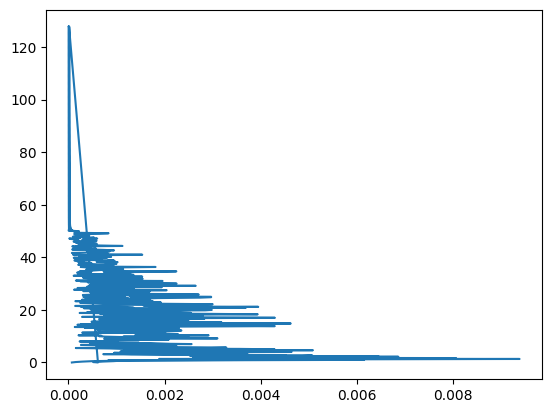

In [ ]:
# buat plot
import matplotlib.pyplot as plt

plt.plot(mydata['C3-P3'], mydata['frekuensi'])
plt.show()

## kode fungsi lama

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')
%cd /content/drive/MyData/TA

import pandas as pd
import numpy as np

df1 = pd.read_csv('/content/drive/MyDrive/TA/df2.csv')
df1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyData/TA'
/content


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure
0,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,kejang
1,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,kejang
2,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,kejang
3,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,kejang
4,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062,99.984375,tidak kejang
10237,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075,99.988281,tidak kejang
10238,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069,99.992188,tidak kejang
10239,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062,99.996094,tidak kejang


In [ ]:
# ubah dataframe jadi array numpy
arr1 = df1['FP1-F7'].values
arr1

array([ 2.80341880e-04,  2.50256410e-04,  2.43223443e-04, ...,
       -1.77777778e-05, -2.01221001e-05, -1.26984127e-05])

In [ ]:
# impulsse respon manual
def h(f1, f2, N):
  n = np.arange(1, N+1) # kalo N aja dio sampe 19

  term1 = (2 * f1) * (np.sin(2 * n * np.pi * f1) / (2 * n * np.pi * f1))
  term2 = (2 * f2) * (np.sin(2 * n * np.pi * f2) / (2 * n * np.pi * f2))

  window = 0.5 + 0.5 * np.cos((2 * n * np.pi) / (N+1))
  blackman = 0.42 + 0.5 * np.cos((2 * n * np.pi) / N) + 0.08 * np.cos((4 * n * np.pi) / N)
  hamming = 0.54 + 0.46 * np.cos((2 * np.pi * n) / (N+1))
  rectangular = 1

  return (term2 - term1) * window

tap = h(0.098, 0.123, 20)
print(tap)


[ 3.75331657e-02  8.23914488e-03 -1.97038879e-02 -3.13699222e-02
 -2.47713408e-02 -9.73386034e-03  1.74773546e-03  4.65704322e-03
  2.27334006e-03  1.98640810e-04  5.28586948e-05 -9.76695662e-04
 -5.13540193e-03 -9.69067937e-03 -8.36860969e-03  2.29489074e-03
  1.79598408e-02  2.82884400e-02  2.47319799e-02  7.74020113e-03]


In [ ]:
# rumus windowing
import numpy as np

N = 20
print(np.arange(1, N))



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
# konvolusi manual
def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]
  return np.array(x[:N])

filter = konvolusi(arr1,tap)
filter

array([ 2.80341880e-04,  2.50256410e-04,  2.43223443e-04, ...,
       -1.77777778e-05, -2.01221001e-05, -1.26984127e-05])

In [ ]:
# fft manual pake data sendiri
def fft_manual(x):
  N = len(x)
  if N <= 1:
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp (-2j * np.pi * np.arange(N) / N)

  return np.concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

x = np.array([1, 2, 3, 4])
fft = fft_manual(x)
fft

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [ ]:
# magnitudo manual
mag = np.sqrt(np.imag(fft) ** 2 + np.real(fft)** 2)
mag

array([10.        ,  2.82842712,  2.        ,  2.82842712])

## confusion matrix

In [ ]:
# confusion matrix
cm = np.array([
    [1, 2],
    [3, 4]
])
cm

array([[1, 2],
       [3, 4]])

In [ ]:
# inisiasi penempatan
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]


In [ ]:
# akurasi
akurasi = (tp + tn) / (tp+tn+fp+fn)
akurasi


np.float64(0.5)

In [ ]:
# recall positif
rec_pos = tp / (tp+fn)
rec_pos


np.float64(0.5714285714285714)

In [ ]:
# recall negatif
rec_neg = tn / (tn/fp)
rec_neg

np.float64(2.0)

In [ ]:
# presisi positif
pre_pos = tp / (tp+fp)
pre_pos


np.float64(0.6666666666666666)

In [ ]:
# presisi negatif
pre_neg = tn / (tn/fn)
pre_neg

np.float64(3.0)

In [ ]:
# f1 positif
f1_pos = (2 * rec_pos * pre_pos) / (rec_pos * pre_pos)
f1_pos

np.float64(2.0)

In [ ]:
# f1 negatif
f1_neg = (2 * rec_neg * pre_neg) / (rec_neg * pre_neg)
f1_neg

np.float64(2.0)

In [ ]:
# gini index
def gini_index(nilai):
  total = sum(nilai)

  gini = 1
  for c in nilai:
    p = c / total
    gini_index = gini - p ** 2
  return gini_index

left = np.array([3, 9])
print(gini_index(left))

0.4375


In [ ]:
# buat fungsi gini split
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = len(grup)
    gini = gini_index(g)
    gini_split = gini_split + (size / total) * gini
  return gini_split

left = np.array([9, 8])
right = np.array([3,8])
print(gini_split([left, right]))

0.08925864949771838


In [ ]:
# def cari mean
def cari_mean(x):
  total = 0
  for nilai in x:
    total = total + nilai
  return total / len(x)

k = np.array([1, 2, 3, 4, 5, 6, 7])
print(cari_mean(k))


4.0


In [ ]:
# def cari max
def cari_max(x):
  maksimum = x[0]
  for nilai in x:
    if nilai > maksimum:
      maksimum = nilai
  return maksimum

k = np.array([1, 2, 3, 4, 5, 6, 7])
print(cari_max(k))

7


In [ ]:
# def cari min
def cari_min(x):
  minimum = x[0]
  for nilai in x:
    if nilai < minimum:
      minimum = nilai
  return minimum

k = np.array([1, 2, 3, 4, 5, 6, 7])
print(cari_min(k))

1


In [ ]:
# def cari energi
energi = np.abs(k) ** 2
energi

array([ 1,  4,  9, 16, 25, 36, 49])

In [ ]:
def cari_energi(x):
  total = 0
  for nilai in x:
    total = total + np.abs(nilai) ** 2
  return total

k = np.array([1, 2, 3, 4, 5, 6, 7])
print(cari_energi(k))

140


## kode baru

In [ ]:
# respon impulse f1, f2, N, n


In [ ]:
# konvolusi manual y


In [ ]:
# dft gak pake def




In [ ]:
# dft pake def



In [ ]:
# FFT kode baru even odd N=8

data = np.array([1, 2, 3, 4, 5, 6, 7, 8])

even = data[[0, 2, 4, 6]]
odd = data[[1, 3, 5, 7]]

a0 = even[0] + even[2]
a1 = even[0] - even[2]
a2 = even[1] + even[3]
a3 = even[1] - even[3]

w0 = np.exp(-2j * np.pi * 0 / 4)
w1 = np.exp(-2j * np.pi * 1 / 4)
w2 = np.exp(-2j * np.pi * 2 / 4)
w3 = np.exp(-2j * np.pi * 3 / 4)

E0 = a0 + w0 * a2
E1 = a1 + w1 * a3
E2 = a0 - w0 * a2
E3 = a1 - w1 * a3

b0 = odd[0] + odd[2]
b1 = odd[0] - odd[2]
b2 = odd[1] + odd[3]
b3 = odd[1] - odd[3]

O0 = b0 + w0 * b2
O1 = b1 + w1 * b3
O2 = b0 - w0 * b2
O3 = b1 - w1 * b3

W0 = np.exp(-2j * np.pi * 0 / 8)
W1 = np.exp(-2j * np.pi * 1 / 8)
W2 = np.exp(-2j * np.pi * 2 / 8)
W3 = np.exp(-2j * np.pi * 3 / 8)

K0 = E0 + W0 * O0
K1 = E1 + W1 * O1
K2 = E2 + W2 * O2
K3 = E3 + W3 * O3
K4 = E0 - W0 * O0
K5 = E1 - W1 * O1
K6 = E2 - W2 * O2
K7 = E3 - W3 * O3

print(K0, K1, K2, K3, K4, K5, K6, K7)

(36+0j) (-4+9.65685424949238j) (-4+4j) (-4+1.6568542494923797j) (-4+0j) (-3.9999999999999996-1.6568542494923797j) (-3.9999999999999996-4j) (-3.9999999999999987-9.65685424949238j)


In [ ]:
# FFT kode baru even odd N=4
data = np.array([1, 2, 3, 4])

even = data[[0, 2]]
odd = data[[1, 3]]

a0 = even[0] + even[1]
a1 = even[0] - even[1]

b0 = odd[0] + odd[1]
b1 = odd[0] - odd[1]

w0 = np.exp(-2j * np.pi * 0 / 4)
w1 = np.exp(-2j * np.pi * 1 / 4)

k0 = a0 + w0 * b0
k1 = a1 + w1 * w1
k2 = a0 - w0 - b0
k3 = a1 - w1 - w1

print(k0, k1, k2, k3)

(10+0j) (-3-1.2246467991473532e-16j) (-3+0j) (-2+2j)


In [ ]:
# twiddle faktor cos sin


In [ ]:
# magnitudo


In [ ]:
# standar deviasi


In [ ]:
# gini index ci

def gini_index(c1, c2):
  ci = c1+c2
  p1 = (c1/ci) ** 2
  p2 = (c2/ci) ** 2
  gi = 1 - (p1 + p2)
  return gi

c1 = 8
c2 = 2
print(gini_index(c1, c2))


0.31999999999999984


In [ ]:
# gini index cj
def gini_index(c1, c2):
  cj = c1 + c1
  p1 = (c1 / cj) ** 2
  p2 = (c2 / cj) ** 2
  gj = 1 - (p1 + p2)
  return gj

c1 = 5
c2 = 6
print(gini_index(c1, c2))



0.39


In [ ]:
# gini split
def gini_split(c1, cj, g1, gj):
  total = ci + cj
  gini_split = ((ci/total)*gi) + ((cj/total)*gj)
  return gini_split

ci = 9
cj =5
gi = 0.98
gj= 0.46
print(gini_split(ci, cj, gi, gj))

0.7942857142857143


## pandas

In [ ]:
# buat dataset
data = {
    'nama' : ['lijak', 'arsy', 'dede', 'pipi', 'nadilla'],
    'umur' : [20, 21, 22, 21, 21],
    'bb' : [60, 70, 50, 50, 40],
    'tinggi' : [155, 155, 160, 150, 145]
}

df = pd.DataFrame(data)
df

,nama,umur,bb,tinggi
0,lijak,20,60,155
1,arsy,21,70,155
2,dede,22,50,160
3,pipi,21,50,150
4,nadilla,21,40,145


In [ ]:
# tambahin kolom baru
df['alamat'] = ['pagaralam', 'balam', 'medan', 'balam', 'metro']
df

,nama,umur,bb,tinggi,alamat
0,lijak,20,60,155,pagaralam
1,arsy,21,70,155,balam
2,dede,22,50,160,medan
3,pipi,21,50,150,balam
4,nadilla,21,40,145,metro


In [ ]:
# hapus kolom
df = df.drop('umur', axis=1)
df

,nama,bb,tinggi,alamat
0,lijak,60,155,pagaralam
1,arsy,70,155,balam
2,dede,50,160,medan
3,pipi,50,150,balam
4,nadilla,40,145,metro


In [ ]:
# hapus baris
df = df.drop(4, axis=0)
df

,nama,bb,tinggi,alamat
0,lijak,60,155,pagaralam
1,arsy,70,155,balam
2,dede,50,160,medan
3,pipi,50,150,balam


In [ ]:
# ganti nama kolom
df = df.rename(columns={'bb':'berat badan'})
df

,nama,berat badan,tinggi,alamat
0,lijak,60,155,pagaralam
1,arsy,70,155,balam
2,dede,50,160,medan
3,pipi,50,150,balam


In [ ]:
# cek NA
df.isna().sum()

,0
nama,0
berat badan,0
tinggi,0
alamat,0


In [ ]:
df.describe()

,berat badan,tinggi
count,4.000000,4.000000
mean,57.500000,155.000000
std,9.574271,4.082483
min,50.000000,150.000000
25%,50.000000,153.750000
50%,55.000000,155.000000
75%,62.500000,156.250000
max,70.000000,160.000000


In [ ]:
# cek mean
df['berat badan'].mean()

np.float64(57.5)

In [ ]:
# cek sum
df['tinggi'].sum()

np.int64(620)

In [ ]:
# cek min
df['tinggi'].min()

150

In [ ]:
# cek max
df['berat badan'].max()

70

In [ ]:
# cek median
df['berat badan'].median()

55.0

In [ ]:
# cek stdv
df['tinggi'].std()

4.08248290463863

In [ ]:
# hitung jumlah value
df['tinggi'].value_counts()

,count
tinggi,
155,2
160,1
150,1


### gabung kolom

In [ ]:
# dataset 1


In [ ]:
# dataset 2


In [ ]:
# concat


In [ ]:
# merge

In [ ]:
# join

### buat visualisasi

In [ ]:
# plot py


### pake data asli aku

In [ ]:
# import data
ta1 = pd.read_csv('/content/drive/MyDrive/TA/fft_chb16_16.csv')
ta1

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000759,0.000068,0.000240,0.000172,0.001114,0.000437,0.000072,0.000371,0.001558,0.000496,...,0.001002,0.001755,0.000117,0.000239,0.000267,0.000331,0.002075,0.000271,kejang,0.000000
1,0.000780,0.000078,0.000262,0.000178,0.001139,0.000473,0.000152,0.000375,0.001592,0.000505,...,0.001009,0.001789,0.000172,0.000260,0.000267,0.000447,0.002100,0.000291,kejang,0.166667
2,0.000862,0.000117,0.000322,0.000197,0.001220,0.000581,0.000295,0.000390,0.001714,0.000535,...,0.001031,0.001899,0.000294,0.000321,0.000272,0.000731,0.002181,0.000352,kejang,0.333333
3,0.001040,0.000214,0.000423,0.000234,0.001337,0.000771,0.000494,0.000420,0.001961,0.000588,...,0.001070,0.002129,0.000478,0.000422,0.000309,0.001192,0.002337,0.000464,kejang,0.500000
4,0.001808,0.000431,0.000981,0.000622,0.002003,0.001396,0.001006,0.000511,0.002896,0.000881,...,0.000959,0.003096,0.001038,0.000981,0.000420,0.002118,0.002624,0.001064,kejang,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.166667
1532,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000037,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.333333
1533,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.500000
1534,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000036,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.666667


In [ ]:
# head
ta1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000759,0.000068,0.000240,0.000172,0.001114,0.000437,0.000072,0.000371,0.001558,0.000496,...,0.001002,0.001755,0.000117,0.000239,0.000267,0.000331,0.002075,0.000271,kejang,0.000000
1,0.000780,0.000078,0.000262,0.000178,0.001139,0.000473,0.000152,0.000375,0.001592,0.000505,...,0.001009,0.001789,0.000172,0.000260,0.000267,0.000447,0.002100,0.000291,kejang,0.166667
2,0.000862,0.000117,0.000322,0.000197,0.001220,0.000581,0.000295,0.000390,0.001714,0.000535,...,0.001031,0.001899,0.000294,0.000321,0.000272,0.000731,0.002181,0.000352,kejang,0.333333
3,0.001040,0.000214,0.000423,0.000234,0.001337,0.000771,0.000494,0.000420,0.001961,0.000588,...,0.001070,0.002129,0.000478,0.000422,0.000309,0.001192,0.002337,0.000464,kejang,0.500000
4,0.001808,0.000431,0.000981,0.000622,0.002003,0.001396,0.001006,0.000511,0.002896,0.000881,...,0.000959,0.003096,0.001038,0.000981,0.000420,0.002118,0.002624,0.001064,kejang,0.666667


In [ ]:
# tail
ta1.tail()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
1531,0.000070,0.00003,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.166667
1532,0.000052,0.00002,0.000029,0.000018,0.000020,0.000053,0.000019,0.000037,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.333333
1533,0.000070,0.00003,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.500000
1534,0.000052,0.00002,0.000029,0.000018,0.000020,0.000053,0.000019,0.000036,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.666667
1535,0.000070,0.00003,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.833333


In [ ]:
# pilih baris
ta1.iloc[9]

,9
FP1-F7,0.023494
F7-T7,0.019934
T7-P7,0.006523
P7-O1,0.001262
FP1-F3,0.033099
F3-C3,0.014557
C3-P3,0.003564
P3-O1,0.00483
FP2-F4,0.009987
F4-C4,0.017895


In [ ]:
# pilih kolom
ta1.iloc[:, 2]

,T7-P7
0,0.000240
1,0.000262
2,0.000322
3,0.000423
4,0.000981
...,...
1531,0.000027
1532,0.000029
1533,0.000027
1534,0.000029


In [ ]:
# pilih baris/kolom berdasarkan kondisi
print(ta1[ta1['FP1-F7'] > 0.009])
print(ta1[ta1['T7-P7'] > 0.002])

       FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
6    0.024762  0.013314  0.007204  0.005731  0.017027  0.007717  0.004629   
7    0.036179  0.014743  0.004856  0.008039  0.021556  0.008025  0.004769   
9    0.023494  0.019934  0.006523  0.001262  0.033099  0.014557  0.003564   
10   0.013013  0.015501  0.006720  0.004646  0.001271  0.022187  0.008058   
12   0.014646  0.007823  0.005839  0.003500  0.018068  0.014082  0.004133   
13   0.009323  0.005981  0.005268  0.005747  0.006655  0.014488  0.006859   
14   0.024573  0.004748  0.004679  0.002370  0.003697  0.007752  0.002972   
15   0.011500  0.005106  0.001294  0.006077  0.023796  0.004486  0.004856   
774  0.009798  0.006146  0.003395  0.001139  0.005552  0.010993  0.006148   
775  0.022867  0.007280  0.000620  0.003603  0.024422  0.009049  0.004697   
776  0.032466  0.005436  0.004018  0.003050  0.034961  0.001825  0.001885   
777  0.031711  0.003922  0.001755  0.000224  0.026854  0.009090  0.005521   

In [ ]:
# describe
ta1.describe()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,frekuensi
count,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,...,1536.000000,1536.000000,1536.000000,1.536000e+03,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000
mean,0.000991,0.000961,0.000900,0.000578,0.001205,0.000647,0.000479,0.000505,0.000888,0.000768,...,0.000813,0.000752,0.000659,5.148514e-04,0.000900,0.000944,0.000992,0.000759,0.000813,63.916667
std,0.002648,0.001812,0.001467,0.000947,0.002855,0.001468,0.000925,0.000941,0.001797,0.001711,...,0.001346,0.001274,0.001830,1.141028e-03,0.001467,0.002146,0.002354,0.001558,0.001346,36.962420
min,0.000015,0.000005,0.000027,0.000005,0.000020,0.000005,0.000005,0.000019,0.000007,0.000012,...,0.000015,0.000015,0.000005,4.088388e-07,0.000027,0.000004,0.000021,0.000003,0.000015,0.000000
25%,0.000068,0.000014,0.000030,0.000013,0.000043,0.000032,0.000013,0.000031,0.000017,0.000021,...,0.000039,0.000062,0.000034,5.195983e-06,0.000030,0.000023,0.000030,0.000007,0.000039,31.958333
50%,0.000092,0.000035,0.000036,0.000020,0.000073,0.000059,0.000020,0.000049,0.000032,0.000032,...,0.000065,0.000095,0.000057,9.055232e-06,0.000036,0.000043,0.000079,0.000012,0.000065,63.916667
75%,0.001021,0.001370,0.001414,0.000982,0.001525,0.000839,0.000591,0.000710,0.001090,0.000884,...,0.001236,0.001066,0.000647,5.472891e-04,0.001414,0.001271,0.001219,0.001072,0.001236,95.875000
max,0.036179,0.019934,0.009090,0.008509,0.034961,0.022187,0.009379,0.009748,0.020470,0.020991,...,0.011457,0.014050,0.026560,1.272493e-02,0.009090,0.029819,0.026715,0.021140,0.011457,127.833333


In [ ]:
# 1 kolom cari max min std mean count
print(ta1['F7-T7'].max())
print(ta1['F7-T7'].min())
print(ta1['F7-T7'].std())
print(ta1['F7-T7'].mean())
print(ta1['F7-T7'].count())

0.0199337051546652
4.563381194834471e-06
0.001811839466528779
0.000961452995500774
1536


In [ ]:
# simpan dataset
ta1.to_excel('ta1.xlxs', index=False)

## buat array

In [ ]:
# array 1 dimensi
arr1 = np.array([1, 2, 3, 4, 5, 6, 7])
arr1

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
# array 2 dimensi
arr2 = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
# cek shape
arr2.shape

(2, 4)

In [ ]:
# ubah array jadi dataframe
df2 = pd.DataFrame(arr2, columns=['p1', 'o9', 't4', 'r3'])
df2

,p1,o9,t4,r3
0,1,2,3,4
1,5,6,7,8


In [ ]:
# array berisi nol
arr_nol = np.zeros((2, 4))
arr_nol

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
# array berisi satu
arr_satu = np.ones((6, 2))
arr_satu

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [ ]:
# array dengan urutan angka tanpa step
arr_urut= np.arange(1, 9)
arr_urut

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# array dengan urutan angka pake step
arr_urut= np.arange(1, 9, 2)
arr_urut

array([1, 3, 5, 7])

In [ ]:
# array acak nilai dari 0-1
import numpy as np
arr_acak = np.random.rand(2, 4)
arr_acak

array([[0.06584395, 0.96375377, 0.13476478, 0.14481579],
       [0.32319401, 0.02717473, 0.60381426, 0.14001451]])

In [ ]:
# array acak bilangan bulat
# bilangannya rentang 10-20, 5 barus 3 kolom
arr_bul = np.random.randint(10, 20, (5, 3))
arr_bul

array([[13, 13, 13],
       [11, 11, 10],
       [19, 14, 18],
       [13, 10, 17],
       [12, 12, 13]])

### slicing

In [ ]:
# 5 baris 4 kolom
arr = np.array([
    [5, 3, 2, 4],
    [1, 2, 3, 4],
    [9, 8, 7, 6],
    [6, 7, 8, 5],
    [3, 4, 7, 6]
])

arr

array([[5, 3, 2, 4],
       [1, 2, 3, 4],
       [9, 8, 7, 6],
       [6, 7, 8, 5],
       [3, 4, 7, 6]])

In [ ]:
# ambil array baris ke 5
print(arr[4])

[3 4 7 6]


In [ ]:
# ambil array kolom ke 2
print(arr[:, 1])

[3 2 8 7 4]


In [ ]:
# ambil array baris 3 kolom 2
print(arr[2, 1])

8


In [ ]:
# ambil semua baris 0-2
print(arr[0:2,:])

[[5 3 2 4]
 [1 2 3 4]]


### aritmatika

In [ ]:
# buat 2 array 1 dimensi
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])

In [ ]:
# penjumlahan
arr1 + arr2

array([ 6,  8, 10, 12])

In [ ]:
# pengurangan
arr1 - arr2

array([-4, -4, -4, -4])

In [ ]:
# pembagian
arr1 / arr2

array([0.2       , 0.33333333, 0.42857143, 0.5       ])

In [ ]:
# perkalian
arr1 * arr2

array([ 5, 12, 21, 32])

In [ ]:
# mean
print(np.mean(arr1))
print(np.mean(arr2))

2.5
6.5


In [ ]:
# median
print(np.median(arr1))
print(np.median(arr2))

2.5
6.5


In [ ]:
# stdv
print(np.std(arr1))
print(np.std(arr2))

1.118033988749895
1.118033988749895


In [ ]:
# min
print(np.min(arr1))
print(np.min(arr2))

1
5


In [ ]:
# max
print(np.max(arr2))
print(np.max(arr2))

8
8


In [ ]:
# buat array 2 dimensi
A = np.array([
    [2, 1],
    [3, 4]
])

B = np.array([
    [5, 6],
    [7, 8]
])

In [ ]:
# perkalian matrix 2 dimensi
print(np.dot(A, B))


[[17 20]
 [43 50]]


In [ ]:
# matrix transpose
print(np.transpose(A))

[[2 3]
 [1 4]]


### array kondisi

In [ ]:
# where
arr = np.array([10, 20, 30, 40, 50])
print(np.where(arr > 25, 'besar', 'kecil'))

['kecil' 'kecil' 'besar' 'besar' 'besar']


In [ ]:
# any
#True jika ada minimal 1 elemen yang memenuhi kondisi
print(np.any(arr>50))
print(np.any(arr>40))

False
True


In [ ]:
# np.all(condition)
#True jika semua elemen memenuhi kondisi.
print(np.all(arr>50))
print(np.all(arr<=50))

False
True


In [ ]:
# jadiin array jadi dataframe
# 5 baris 4 kolom
arr = np.array([
    [5, 3, 2, 4],
    [1, 2, 3, 4],
    [9, 8, 7, 6],
    [6, 7, 8, 5],
    [3, 4, 7, 6]
])

import pandas as pd
df = pd.DataFrame(arr, columns=['q', 'w', 'e', 'r'])
df

,q,w,e,r
0,5,3,2,4
1,1,2,3,4
2,9,8,7,6
3,6,7,8,5
4,3,4,7,6


## pertanyaan

In [ ]:
# alyka
# teori dasar tentng arti list array

list bisa menyimpan berbagai jenis struktur data

array khusus untuk numerik, elemen datanya bertipe sama

sruktur data bawaan python
List → urut, bisa diubah.
Tuple → urut, tidak bisa diubah.

Set → tidak urut, elemen unik.

Dict → pasangan key-value.

In [ ]:
# list dikali 2
list = [1, 2, 3, 4]
list * 3

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

In [ ]:
# array dikali 2
arr = np.array([1, 2, 3, 4])
arr * 3

array([ 3,  6,  9, 12])

In [ ]:
# kak hanna
# buat dataframe string dan integer (jelaskan juga pengertiannya)
data = {
    'string' : ['nama', 'pekerjaan', 'alamat'],
    'integer' : [60, 155, 250504]
}

df = pd.DataFrame(data)
df


,string,integer
0,nama,60
1,pekerjaan,155
2,alamat,250504


**perbedaan string dan integer**

**String**

Definisi: Tipe data yang berisi teks (sekumpulan karakter).

Ciri-ciri: Ditulis dengan tanda kutip ('...' atau "...").

Isi: Bisa huruf, angka, spasi, simbol, dll.

**Integer**

Definisi: Tipe data bilangan bulat.

Ciri-ciri: Tidak ada koma/desimal.

Isi: Bisa positif, negatif, atau nol.

| Aspek   | String (str)                   | Integer (int)                      |
| ------- | ------------------------------ | ---------------------------------- |
| Isi     | Teks/karakter                  | Angka bulat                        |
| Tanda   | Pakai kutip `" "`              | Tanpa kutip                        |
| Operasi | Bisa digabungkan (concatenate) | Bisa dihitung (tambah, kali, bagi) |
| Contoh  | `"123"`                        | `123`                              |

**String**

Definisi: Tipe data yang berisi teks (sekumpulan karakter).

Ciri-ciri: Ditulis dengan tanda kutip ('...' atau "...").

Isi: Bisa huruf, angka, spasi, simbol, dll.

**Integer**

Definisi: Tipe data bilangan bulat.

Ciri-ciri: Tidak ada koma/desimal.

Isi: Bisa positif, negatif, atau nol.

In [ ]:
# cara motong data
df2 = df1[(df1['times'] >= 60) & (df1['times'] <=100)]
df2

In [ ]:
# gimana cara ngelabelin data
def label(baris):
  if 60 <= baris['waktu'] >=120:
    return 'kejang'
  else:
    return 'tidak kejang'

In [ ]:
# bikin array contoh ukuran (3 baris, 5 kolom)
arr = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 0],
    [1, 2, 3, 4, 5]
])
arr

array([[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 0],
       [1, 2, 3, 4, 5]])

In [ ]:
# jadiin dataframe
df = pd.DataFrame(arr)
df

,0,1,2,3,4
0,1,2,3,4,5
1,6,7,8,9,0
2,1,2,3,4,5


In [ ]:
# oliv/pak tirta

# import data ke colab baru
from google.colab import drive
drive.mount ('/content/drive')
%cd /content/drive/MyDrive/TA

df1 = pd.read_csv('/content/drive/MyDrive/TA/df1.csv')
df1

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,2.559219e-05,-5.684982e-05,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,3.145299e-05,-6.114774e-05,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-1.074481e-05,-4.942613e-05,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-4.356532e-05,-5.958486e-05,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# mengecek nilai null di setiap kolom
print(df1.isnull().sum())

FP1-F7      0
F7-T7       0
T7-P7       0
P7-O1       0
FP1-F3      0
F3-C3       0
C3-P3       0
P3-O1       0
FZ-CZ       0
CZ-PZ       0
FP2-F4      0
F4-C4       0
C4-P4       0
P4-O2       0
FP2-F8      0
F8-T8       0
T8-P8-0     0
P8-O2       0
P7-T7       0
T7-FT9      0
FT9-FT10    0
FT10-T8     0
T8-P8-1     0
times       0
dtype: int64


In [ ]:
# ambil fitur pake nama kolom nya langsung
df2 = df1[['C3-P3', 'F7-T7']]
df2

,C3-P3,F7-T7
0,7.990232e-05,-2.559219e-05
1,1.953602e-07,1.953602e-07
2,1.953602e-07,1.953602e-07
3,1.953602e-07,1.953602e-07
4,5.860806e-07,1.953602e-07
...,...,...
921595,-4.884005e-06,2.363858e-05
921596,-8.009768e-06,-4.493284e-06
921597,1.953602e-07,-4.630037e-05
921598,7.619048e-06,-3.848596e-05


In [ ]:
# Ambil kolom pake iloc (indeks 0:3)
df1.iloc[:, 0:3]

,FP1-F7,F7-T7,T7-P7
0,-2.807326e-04,-2.559219e-05,6.739927e-05
1,1.953602e-07,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07,1.953602e-07
3,1.758242e-06,1.953602e-07,1.953602e-07
4,-9.768010e-07,1.953602e-07,1.953602e-07
...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06
921598,-1.738706e-05,-3.848596e-05,9.963370e-06


In [ ]:
# Ambil baris pertama sampai ketiga (indeks 0:3)
df1.iloc[0:3]

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812


In [ ]:
# ambil fitur pake library to list
# Ambil kolom A jadi list
arr = df1['C3-P3'].to_list()
arr

[7.99023199023199e-05,
 1.9536019536019466e-07,
 1.9536019536019466e-07,
 1.9536019536019466e-07,
 5.860805860805853e-07,
 9.76800976800976e-07,
 -1.9536019536019607e-07,
 -1.3675213675213682e-06,
 1.9536019536019466e-07,
 2.1489621489621485e-06,
 2.930402930402929e-06,
 7.619047619047618e-06,
 2.1489621489621485e-06,
 -1.9536019536019607e-07,
 9.76800976800976e-07,
 5.860805860805853e-07,
 1.7582417582417574e-06,
 1.7582417582417574e-06,
 -3.3211233211233217e-06,
 -2.5396825396825403e-06,
 -2.5396825396825403e-06,
 -5.6654456654456655e-06,
 -8.791208791208792e-06,
 -9.963369963369963e-06,
 -1.2307692307692308e-05,
 -1.2307692307692308e-05,
 -1.2307692307692308e-05,
 -1.6605616605616607e-05,
 -2.0512820512820515e-05,
 -1.504273504273504e-05,
 -8.791208791208792e-06,
 -2.14896214896215e-06,
 3.3211233211233204e-06,
 2.930402930402929e-06,
 6.446886446886446e-06,
 1.2307692307692306e-05,
 1.347985347985348e-05,
 1.894993894993895e-05,
 2.4420024420024417e-05,
 2.5982905982905985e-05,
 2.

In [ ]:
arr2 = df1['CZ-PZ'].to_numpy()
arr2

array([-5.48962149e-05,  1.95360195e-07,  1.95360195e-07, ...,
       -4.94261294e-05, -5.95848596e-05, -5.84126984e-05])

In [ ]:
arr3 = df1['FT10-T8'].values
arr3

KeyError: 'FT10-T8'

In [ ]:
# bikin class
# Fungsi untuk menjumlahkan 2 angka
# fungsi penjumlahan
def penjumlahan(a, b):
  z = a + b
  return z

print(penjumlahan(1, 3))

4


In [ ]:
# fungsi pengurangan
def pengurangan(a, b):
  p = a - b
  return p

print(pengurangan(5, 2))

3


In [ ]:
# fungsi pembagian
def pembagian(a, b):
  t = a / b
  return t
print(pembagian(8, 2))

4.0


In [ ]:
# bikin fungsi + - /
# Class untuk merepresentasikan Buah



In [ ]:
# dini / pak tirta

# kode untuk ke drive
from google.colab import drive
drive.mount ('/content/drive')
%cd /content/drive/MyDrive/TA


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


In [ ]:
!pip install mne
import mne
# import data
data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
data1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 32.8 MB/s eta 0:00:00
Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb16_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-652963837.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8', '-'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
/tmp/ipython-input-652963837.py:4: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')


<RawEDF | chb16_16.edf, 28 x 921600 (3600.0 s), ~26 KiB, data not loaded>

In [ ]:
data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names

In [ ]:
import pandas as pd
df1 = pd.DataFrame(data.T, columns=channel_names)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05


In [ ]:
# cek missing value'

df1.isnull().sum()

,0
FP1-F7,0
F7-T7,0
T7-P7,0
P7-O1,0
--0,0
FP1-F3,0
F3-C3,0
C3-P3,0
P3-O1,0
--1,0


In [ ]:
# ambil 2 kolom dari data
df2 = df1[['FP1-F7', 'P7-T7']]
df2



,FP1-F7,P7-T7
0,-2.807326e-04,-6.700855e-05
1,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07
3,1.758242e-06,1.953602e-07
4,-9.768010e-07,1.953602e-07
...,...,...
921595,1.035409e-05,2.949939e-05
921596,-1.758242e-06,3.418803e-05
921597,-1.582418e-05,8.009768e-06
921598,-1.738706e-05,-9.572650e-06


In [ ]:
# simpen 2 kolom yang kamu ambil ke folder penyimpanan internal
df2.to_csv('subsetdf2.csv', index=False)

In [ ]:
# fungsi jumlahkan kolom terus diterapkan ke dataset
def jumlahkan(df, kolom1, kolom2, total):
  df[total] = df[kolom1] + df[kolom2]
  return df

print(jumlahkan(df2, 'FP1-F7', 'P7-T7', 'total'))


              FP1-F7         P7-T7         total
0      -2.807326e-04 -6.700855e-05 -3.477411e-04
1       1.953602e-07  1.953602e-07  3.907204e-07
2       5.860806e-07  1.953602e-07  7.814408e-07
3       1.758242e-06  1.953602e-07  1.953602e-06
4      -9.768010e-07  1.953602e-07 -7.814408e-07
...              ...           ...           ...
921595  1.035409e-05  2.949939e-05  3.985348e-05
921596 -1.758242e-06  3.418803e-05  3.242979e-05
921597 -1.582418e-05  8.009768e-06 -7.814408e-06
921598 -1.738706e-05 -9.572650e-06 -2.695971e-05
921599 -4.493284e-06 -1.113553e-05 -1.562882e-05

[921600 rows x 3 columns]


/tmp/ipython-input-1221059637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[total] = df[kolom1] + df[kolom2]


In [ ]:
# bikin function yang bisa diterapin ke data kamu


# contoh pemakaian


In [ ]:
# dini / bu mika



In [ ]:
# ambil kolom tertentu
df5 = df1.iloc[:, 1:4]
df5

,F7-T7,T7-P7,P7-O1
0,-2.559219e-05,6.739927e-05,3.770452e-05
1,1.953602e-07,1.953602e-07,1.953602e-07
2,1.953602e-07,1.953602e-07,1.953602e-07
3,1.953602e-07,1.953602e-07,-1.953602e-07
4,1.953602e-07,1.953602e-07,1.367521e-06
...,...,...,...
921595,2.363858e-05,-2.910867e-05,-2.090354e-05
921596,-4.493284e-06,-3.379731e-05,1.308913e-05
921597,-4.630037e-05,-7.619048e-06,7.560440e-05
921598,-3.848596e-05,9.963370e-06,7.599512e-05


In [ ]:
# standarisasi


# bikin

In [ ]:
# ubah hasil fft ke magnitudo
import numpy as np
mag = np.abs(df5['F7-T7'])
mag

,F7-T7
0,2.559219e-05
1,1.953602e-07
2,1.953602e-07
3,1.953602e-07
4,1.953602e-07
...,...
921595,2.363858e-05
921596,4.493284e-06
921597,4.630037e-05
921598,3.848596e-05


In [ ]:
magnitudo = np.sqrt(np.real(fft) ** 2 + np.imag(fft) ** 2)
magnitudo

In [ ]:
# buat array
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# hitung fft
def fft_manual(x):
  N = len(x)
  if N <= 1:
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp(-2j * np.pi * np.arange(N) / N)

  return np. concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

fft = fft_manual(x)
print(fft)

[36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


In [ ]:
# hitung magnitudo
magnitudo = np.sqrt(np.imag(fft)**2 + np.real(fft)**2)
magnitudo

array([36.        , 10.45250372,  5.65685425,  4.3295688 ,  4.        ,
        4.3295688 ,  5.65685425, 10.45250372])

In [ ]:
# jadiin balik ke nilai sebelumnya
inverse = np.fft.ifft(fft)
inverse

array([1.+0.00000000e+00j, 2.-2.12520397e-16j, 3.-2.22044605e-16j,
       4.-1.01498095e-16j, 5.+0.00000000e+00j, 6.+1.01498095e-16j,
       7.+2.22044605e-16j, 8.+2.12520397e-16j])

In [ ]:
# sasa / pak tam

# bikin dataframe/numpy
data = {
    'p2' : [1, 2, 3, 4, 5],
    't9' : [4, 5, 6, 7, 7],
    'nama' : ["lijak", 'dede', 'pipiw', 'nad', 'ditta']
}

data

{'p2': [1, 2, 3, 4, 5],
 't9': [4, 5, 6, 7, 7],
 'nama': ['lijak', 'dede', 'pipiw', 'nad', 'ditta']}

In [ ]:
df1 = pd.DataFrame(data)
df1

,p2,t9,nama
0,1,4,lijak
1,2,5,dede
2,3,6,pipiw
3,4,7,nad
4,5,7,ditta


In [ ]:
# ngambil key
# melihat isi "bagian atas" dari sebuah objek yang punya struktur key-value
print(df1.keys())

Index(['p2', 't9', 'nama'], dtype='object')


In [ ]:
# fungsi filtering
def h(f1, f2, N):
  n = np.arange(1, 1+N)

  term1 = (2 * f1) * (np.sin(2 * n * np.pi * f1) / (2 * n * np.pi * f1))
  term2 = (2 * f2) * (np.sin(2 * n * np.pi * f2) / (2 * n * np.pi * f2))

  window = 0.5 + 0.5 * (np.cos(2 * n * np.pi)/(N+1))

  return (term2-term1) * window

f1 = 1/128
f2 = 50/128
N = 20
tap = h(f1, f2, N)
tap

array([ 0.09759353, -0.08993639,  0.04086037, -0.0240836 , -0.01778265,
        0.01503897, -0.03172883,  0.00676154, -0.00973674, -0.01712301,
        0.00671236, -0.02055618, -0.00159426, -0.0052319 , -0.01605723,
        0.0030522 , -0.01484873, -0.00535327, -0.00291179, -0.0146338 ])

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/TA/filtering_chb16_16.csv')
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time,seizure
0,4.106564e-25,9.438968e-26,-2.709106e-25,6.496952e-26,6.274769e-27,2.218770e-25,1.164548e-25,1.238098e-25,-1.679401e-25,6.274769e-27,...,1.875535e-25,-1.900052e-25,6.274769e-27,2.684590e-25,-6.251784e-26,1.066481e-25,-9.929304e-26,1.875535e-25,1211.000000,tidak kejang
1,-1.030993e-13,-2.369745e-14,6.801475e-14,-1.631123e-14,-1.575342e-15,-5.570439e-14,-2.923711e-14,-3.108366e-14,4.216299e-14,-1.575342e-15,...,-4.708713e-14,4.770265e-14,-1.575342e-15,-6.739923e-14,1.569571e-14,-2.677504e-14,2.492848e-14,-4.708713e-14,1211.003906,tidak kejang
2,-4.511707e-13,-9.802078e-14,2.972319e-13,-6.943531e-14,-6.884416e-15,-2.003480e-13,-1.437729e-13,-1.327614e-13,1.608672e-13,-6.884416e-15,...,-1.633052e-13,1.715348e-13,-6.884416e-15,-2.945421e-13,8.951960e-14,-1.243961e-13,1.027850e-13,-1.633052e-13,1211.007812,tidak kejang
3,-6.965708e-13,-1.325920e-13,4.623495e-13,-1.195549e-13,-1.042370e-14,-1.790614e-13,-2.621616e-13,-1.836073e-13,1.478387e-13,-1.042370e-14,...,-1.062672e-13,1.431661e-13,-1.042370e-14,-4.582768e-13,2.063905e-13,-2.069812e-13,1.238907e-13,-1.062672e-13,1211.011719,tidak kejang
4,-7.404236e-13,-1.143538e-13,4.940944e-13,-1.480302e-13,-1.061149e-14,-8.782943e-14,-2.888355e-13,-1.365848e-13,1.759293e-14,-1.061149e-14,...,1.256263e-13,1.500024e-14,-1.061149e-14,-4.899483e-13,2.833849e-13,-2.184699e-13,3.085423e-14,1.256263e-13,1211.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,1.678951e-05,6.179025e-05,-1.383683e-04,-2.059703e-05,-2.532254e-11,1.961173e-05,-4.565560e-05,-5.337200e-05,-9.558999e-07,-2.532254e-11,...,-1.462598e-05,2.114127e-05,-2.532254e-11,1.383683e-04,-6.952411e-05,-5.326883e-05,-3.520555e-05,-1.462598e-05,1222.980469,tidak kejang
3068,4.154094e-05,3.392348e-06,-1.126461e-04,6.572995e-06,-2.532254e-11,1.483391e-05,-3.851675e-05,-4.700411e-05,9.510983e-06,-2.532254e-11,...,1.933936e-05,2.588216e-05,-2.532254e-11,1.126461e-04,-2.347680e-05,-5.853528e-05,-5.401344e-05,1.933936e-05,1222.984375,tidak kejang
3069,3.420805e-05,-4.536399e-05,-8.012464e-05,1.304066e-05,-2.532254e-11,-4.991916e-05,-1.245948e-05,-3.369906e-05,1.736168e-05,-2.532254e-11,...,4.420201e-05,2.758620e-05,-2.532254e-11,8.012465e-05,1.282068e-05,-7.304121e-05,-5.952361e-05,4.420201e-05,1222.988281,tidak kejang
3070,7.557365e-06,-6.604491e-05,-4.611887e-05,5.340496e-07,-2.532254e-11,-1.032862e-04,-1.652104e-06,-2.139034e-05,2.122748e-05,-2.532254e-11,...,5.136247e-05,2.415137e-05,-2.532254e-11,4.611888e-05,2.998144e-05,-8.982620e-05,-4.230917e-05,5.136247e-05,1222.992188,tidak kejang


In [ ]:
df2 = df1['F7-T7'].to_numpy()
df2

array([ 9.43896821e-26, -2.36974465e-14, -9.80207845e-14, ...,
       -4.53639900e-05, -6.60449097e-05, -5.90736149e-05])

In [ ]:

# terapin filtering
# Terapkan filter FIR ke sinyal array
def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]
  return np.array(x[:N])


print(konvolusi(df2, tap))

[ 9.43896821e-26 -2.36974465e-14 -9.80207845e-14 ... -4.53639900e-05
 -6.60449097e-05 -5.90736149e-05]


In [ ]:
from scipy.signal import lfilter

filter = lfilter(tap, 1, df2)
filter

array([ 9.21182264e-27, -2.31271754e-15, -7.43493204e-15, ...,
       -6.57319715e-06, -6.14561605e-06, -4.44667045e-06])

In [ ]:

y0 = df2[0]*tap[0]
y1 = df2[0]*tap[1] + df2[1]*tap[0]
y2 = df2[0]*tap[2] + df2[1]*tap[1] + df2[3]*tap[0]

print(y0, y1, y2)

9.21182263560318e-27 -1.0808863007335103e-14 -7.43493204027115e-15


In [ ]:
# jadikan hasil filtering dataframe
df0 = pd.DataFrame(filter)
df0


,0
0,9.211823e-27
1,-2.312718e-15
2,-7.434932e-15
3,-5.092777e-15
4,-2.669786e-15
...,...
3067,-1.176190e-06
3068,-4.797899e-06
3069,-6.573197e-06
3070,-6.145616e-06


In [ ]:
# terapin fft
fft1 =np.fft.fft(df0)
fft1

array([[ 9.21182264e-27+0.j],
       [-2.31271754e-15+0.j],
       [-7.43493204e-15+0.j],
       ...,
       [-6.57319715e-06+0.j],
       [-6.14561605e-06+0.j],
       [-4.44667045e-06+0.j]])

In [ ]:
# terapin magnitudo nilai absolut
mag = np.abs(fft1)

In [ ]:
# buat dataframe terus kasih nama kolom
df8 = pd.DataFrame(mag, columns=['t8'])
df8

,t8
0,9.211823e-27
1,2.312718e-15
2,7.434932e-15
3,5.092777e-15
4,2.669786e-15
...,...
3067,1.176190e-06
3068,4.797899e-06
3069,6.573197e-06
3070,6.145616e-06


## latihan max min mean stdv energi

In [ ]:
# cari mean
def cari_mean(x):
  total = 0
  for nilai in x:
    total = total + nilai
  return total / len(x)

p = np.array([2, 4])
print(cari_mean(p))

3.0


In [ ]:
#cari max
def cari_max(x):
  maksimum = x[0]
  for nilai in x:
    if nilai > maksimum:
      maksimum = nilai
  return maksimum

p = np.array([2, 4])
print(cari_max(p))

4


In [ ]:
# cari min
def cari_min(x):
  minimum = x[0]
  for nilai in x:
    if nilai < minimum:
      minimum = nilai
  return minimum

p = np.array([2, 4])
print(cari_min(p))

2


In [ ]:
# cari stdv
def standar_deviasi(data):
  N = len(data)
  mean = sum(data) / N
  total_kuadrat = 0

  for x in data:
    selisih = x - mean
    kuadrat = selisih ** 2
    total_kuadrat += kuadrat

  mean_kuadrat = total_kuadrat / N
  std = np.sqrt(mean_kuadrat)
  return std

p = np.array([2, 4, 3, 6, 7])
print(standar_deviasi(p))


1.8547236990991407


In [ ]:
# cari energi
def cari_energi(x):
  total = 0
  for nilai in x:
    total = total + np.abs(x) ** 2
  return total

p = np.array([2, 4])
print(cari_energi(p))

[ 8 32]


## class

In [ ]:
class mahasiswa():
  nama = 'nama'

otong = mahasiswa()
ucup = mahasiswa()

otong.nama = 'otong surotong'
ucup.nama = 'michael ucup'

print(otong.nama)
print(ucup.nama)

otong surotong
michael ucup


In [ ]:
class kulkas:

  def __init__(self, merek, harga):
    self.merek = merek
    self.harga = harga
    self.garansi = 3
    self.tenaga = 'listrik'

In [ ]:
barang1 = kulkas(merek='samsung', harga=500)

In [ ]:
barang1.merek

'samsung'

In [ ]:
barang1.harga

500

In [ ]:
barang2 = kulkas('lg', 800)

In [ ]:
barang2.garansi

3

di python semuanya adalah objek, seperti list, strings, dictionary, dll

di python, objek disebut dengan istilah class

setelah mendefinisikan objek, kita bisa menggunakan methods dan attributes terhadap objek tersebut

OOP memungkinkan programmer untuk menciptakan objek mereka sendiri termasuk methods dan attributes nya

# hari 5

In [ ]:
# drive mount
from google.colab import drive
drive.mount ('/content/drive')
%cd /content/drive/MyData/TA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyData/TA'
/content/drive/MyDrive/TA


In [ ]:
# install mne
!pip install mne
import mne

In [ ]:
# import pandas numpy
import pandas as pd
import numpy as np

In [ ]:
# import data edf
data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb16_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-3748411429.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
/tmp/ipython-input-3748411429.py:2: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')


<RawEDF | chb16_16.edf, 28 x 921600 (3600.0 s), ~26 KiB, data not loaded>

In [ ]:
# ekstraksi data & channel
data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names


In [ ]:
# jadiin dataframe
df1 = pd.DataFrame(data.T, columns=channel_names)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05


In [ ]:
# tambah kolom times
df1['times'] = times
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# drop kolom --0, --1 ..
df1 = df1.drop(['--0', '--1', '--2', '--3', '--4'], axis=1)
df1


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,2.559219e-05,-5.684982e-05,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,3.145299e-05,-6.114774e-05,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-1.074481e-05,-4.942613e-05,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-4.356532e-05,-5.958486e-05,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# simpen df1
df1.to_csv('df1', index=False)



In [ ]:
# potong data
df2 = df1[(df1['times'] >= 60) & (df1['times'] <= 100)]
df2



,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times
15360,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,-0.000023,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000
15361,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,-0.000080,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080,60.003906
15362,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,-0.000100,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812
15363,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,-0.000118,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719
15364,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,-0.000087,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25596,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,0.000021,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062,99.984375
25597,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,0.000014,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075,99.988281
25598,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,0.000006,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069,99.992188
25599,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,0.000006,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062,99.996094


In [ ]:
# labelin data

def potong(baris):
  if 60 <= baris['times'] < 80:
    return 'kejang'
  else:
    return 'tidak kejang'

df2['seizure'] = df1.apply(potong, axis=1)
df2

/tmp/ipython-input-2768100098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['seizure'] = df1.apply(potong, axis=1)


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure
15360,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,kejang
15361,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,kejang
15362,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,kejang
15363,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,kejang
15364,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25596,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062,99.984375,tidak kejang
25597,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075,99.988281,tidak kejang
25598,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069,99.992188,tidak kejang
25599,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062,99.996094,tidak kejang


In [ ]:
# cek jumlah label
print(df2['seizure'].value_counts())


seizure
tidak kejang    5121
kejang          5120
Name: count, dtype: int64


In [ ]:
# simpen data yang udah dipotong & dilabel
df2.to_csv('df2.csv', index=False)

In [ ]:
# import df2
df2 = pd.read_csv('/content/drive/MyDrive/TA/df2.csv')
df2


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure
0,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,kejang
1,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,kejang
2,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,kejang
3,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,kejang
4,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062,99.984375,tidak kejang
10237,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075,99.988281,tidak kejang
10238,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069,99.992188,tidak kejang
10239,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062,99.996094,tidak kejang


In [ ]:
# df 3 = hapus kolom time dan seizure
df3 = df2.drop(['times', 'seizure'], axis=1)
df3


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,0.000033,-0.000023,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054
1,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,0.000018,-0.000080,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080
2,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,-0.000010,-0.000100,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021
3,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,0.000022,-0.000118,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083
4,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,0.000034,-0.000087,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,0.000196,0.000021,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062
10237,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,0.000215,0.000014,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075
10238,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,0.000209,0.000006,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069
10239,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,0.000196,0.000006,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062


In [ ]:
# buat respon impulse
from scipy.signal import firwin

f1 = 1
f2 = 50
fs = 256
nyquist = fs / 2
numtaps = 10

normalisasi = [f1/nyquist, f2/nyquist]

taps = firwin(numtaps, normalisasi, window='hamming', pass_zero='bandpass')
taps


array([-0.00519542, -0.01958824,  0.00082344,  0.17387891,  0.40042047,
        0.40042047,  0.17387891,  0.00082344, -0.01958824, -0.00519542])

In [ ]:
# konvolusi filtering
from scipy.signal import lfilter

filtering = lfilter(taps, 1, df3)
filtering


array([[-1.45649481e-06, -6.02832824e-06, -1.43928485e-06, ...,
         1.46783290e-05,  2.49250325e-06,  1.86217451e-06],
       [-1.30018805e-06, -5.18932197e-06, -1.12151243e-06, ...,
         1.93819925e-05, -2.10035874e-05, -3.61070808e-05],
       [-1.26364881e-06, -5.22207498e-06, -1.60780315e-06, ...,
         1.67836115e-05,  8.40607708e-07, -1.69046476e-05],
       ...,
       [ 9.23630857e-08,  4.06967731e-08, -1.14877355e-06, ...,
         3.13909432e-05,  4.96810451e-05,  2.28369763e-05],
       [ 1.04542833e-07,  6.22584295e-08, -1.19179731e-06, ...,
         2.84278317e-05,  4.57888793e-05,  2.07624699e-05],
       [ 6.59736326e-08, -8.11285924e-08, -1.02984389e-06, ...,
         2.66759575e-05,  4.93292418e-05,  2.99837370e-05]])

In [ ]:
# fft
fft = np.fft.fft(filtering)
fft

array([[ 7.94216190e-04+0.00000000e+00j, -9.99000152e-05-4.98118295e-04j,
        -2.97975048e-04+1.47873386e-04j, ...,
        -1.66163930e-04+4.62772835e-05j, -2.97975048e-04-1.47873386e-04j,
        -9.99000152e-05+4.98118295e-04j],
       [ 7.30791376e-04+0.00000000e+00j, -1.85922129e-04-5.89524018e-04j,
        -3.41740959e-04+1.98711837e-04j, ...,
        -1.03677498e-04+6.18976114e-05j, -3.41740959e-04-1.98711837e-04j,
        -1.85922129e-04+5.89524018e-04j],
       [ 6.80982211e-04+0.00000000e+00j, -1.64766219e-04-6.50428417e-04j,
        -2.48048508e-04+1.74391028e-04j, ...,
        -5.56081719e-05-2.77480432e-05j, -2.48048508e-04-1.74391028e-04j,
        -1.64766219e-04+6.50428417e-04j],
       ...,
       [ 1.96838632e-04+0.00000000e+00j,  2.38774730e-04+1.38113278e-04j,
        -2.62370562e-04+2.22585160e-04j, ...,
        -3.42227359e-05+7.22709727e-05j, -2.62370562e-04-2.22585160e-04j,
         2.38774730e-04-1.38113278e-04j],
       [ 1.50404263e-04+0.00000000e+00j,  2.

In [ ]:
# ambil kolom frekuensi
frekuensi = np.fft.fftfreq(len(filtering))
frekuensi


array([ 0.00000000e+00,  9.76467142e-05,  1.95293428e-04, ...,
       -2.92940143e-04, -1.95293428e-04, -9.76467142e-05])

In [ ]:
# jadiin magnitudo

magnitudo = np.abs(fft)
magnitudo

array([[7.94216190e-04, 5.08037251e-04, 3.32649467e-04, ...,
        1.72487793e-04, 3.32649467e-04, 5.08037251e-04],
       [7.30791376e-04, 6.18146913e-04, 3.95314150e-04, ...,
        1.20749070e-04, 3.95314150e-04, 6.18146913e-04],
       [6.80982211e-04, 6.70973198e-04, 3.03216577e-04, ...,
        6.21467834e-05, 3.03216577e-04, 6.70973198e-04],
       ...,
       [1.96838632e-04, 2.75841710e-04, 3.44067530e-04, ...,
        7.99642992e-05, 3.44067530e-04, 2.75841710e-04],
       [1.50404263e-04, 2.73751031e-04, 3.45188732e-04, ...,
        8.77658692e-05, 3.45188732e-04, 2.73751031e-04],
       [8.30026864e-05, 3.21441478e-04, 3.11786292e-04, ...,
        8.08771057e-05, 3.11786292e-04, 3.21441478e-04]])

In [ ]:
# jadiin dataframe buat df4
df4 = pd.DataFrame(magnitudo)
df4

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000794,0.000508,0.000333,0.000172,0.000195,0.000229,0.000181,0.000056,0.000013,0.000004,...,0.000003,0.000004,0.000013,0.000056,0.000181,0.000229,0.000195,0.000172,0.000333,0.000508
1,0.000731,0.000618,0.000395,0.000121,0.000101,0.000167,0.000210,0.000021,0.000021,0.000016,...,0.000016,0.000016,0.000021,0.000021,0.000210,0.000167,0.000101,0.000121,0.000395,0.000618
2,0.000681,0.000671,0.000303,0.000062,0.000196,0.000125,0.000219,0.000017,0.000017,0.000010,...,0.000010,0.000010,0.000017,0.000017,0.000219,0.000125,0.000196,0.000062,0.000303,0.000671
3,0.000891,0.000586,0.000303,0.000102,0.000278,0.000107,0.000220,0.000026,0.000011,0.000005,...,0.000005,0.000005,0.000011,0.000026,0.000220,0.000107,0.000278,0.000102,0.000303,0.000586
4,0.000970,0.000516,0.000292,0.000171,0.000302,0.000149,0.000212,0.000033,0.000012,0.000006,...,0.000005,0.000006,0.000012,0.000033,0.000212,0.000149,0.000302,0.000171,0.000292,0.000516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000245,0.000282,0.000323,0.000105,0.000099,0.000106,0.000095,0.000052,0.000014,0.000009,...,0.000007,0.000009,0.000014,0.000052,0.000095,0.000106,0.000099,0.000105,0.000323,0.000282
10237,0.000292,0.000258,0.000339,0.000080,0.000120,0.000124,0.000094,0.000061,0.000017,0.000010,...,0.000008,0.000010,0.000017,0.000061,0.000094,0.000124,0.000120,0.000080,0.000339,0.000258
10238,0.000197,0.000276,0.000344,0.000080,0.000113,0.000120,0.000082,0.000060,0.000019,0.000010,...,0.000009,0.000010,0.000019,0.000060,0.000082,0.000120,0.000113,0.000080,0.000344,0.000276
10239,0.000150,0.000274,0.000345,0.000088,0.000108,0.000114,0.000071,0.000059,0.000018,0.000010,...,0.000008,0.000010,0.000018,0.000059,0.000071,0.000114,0.000108,0.000088,0.000345,0.000274


In [ ]:
# tambahin kolom seizure & times dari df2
df4['times'] = df2['times']
df4['seizure'] = df2['seizure']
df4.columns = df2.columns

In [ ]:
# tambahin kolom frekuensi
df4['frekuensi'] = frekuensi
df4

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure,frekuensi
0,0.000794,0.000508,0.000333,0.000172,0.000195,0.000229,0.000181,0.000056,0.000013,0.000004,...,0.000056,0.000181,0.000229,0.000195,0.000172,0.000333,0.000508,60.000000,kejang,0.000000
1,0.000731,0.000618,0.000395,0.000121,0.000101,0.000167,0.000210,0.000021,0.000021,0.000016,...,0.000021,0.000210,0.000167,0.000101,0.000121,0.000395,0.000618,60.003906,kejang,0.000098
2,0.000681,0.000671,0.000303,0.000062,0.000196,0.000125,0.000219,0.000017,0.000017,0.000010,...,0.000017,0.000219,0.000125,0.000196,0.000062,0.000303,0.000671,60.007812,kejang,0.000195
3,0.000891,0.000586,0.000303,0.000102,0.000278,0.000107,0.000220,0.000026,0.000011,0.000005,...,0.000026,0.000220,0.000107,0.000278,0.000102,0.000303,0.000586,60.011719,kejang,0.000293
4,0.000970,0.000516,0.000292,0.000171,0.000302,0.000149,0.000212,0.000033,0.000012,0.000006,...,0.000033,0.000212,0.000149,0.000302,0.000171,0.000292,0.000516,60.015625,kejang,0.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000245,0.000282,0.000323,0.000105,0.000099,0.000106,0.000095,0.000052,0.000014,0.000009,...,0.000052,0.000095,0.000106,0.000099,0.000105,0.000323,0.000282,99.984375,tidak kejang,-0.000488
10237,0.000292,0.000258,0.000339,0.000080,0.000120,0.000124,0.000094,0.000061,0.000017,0.000010,...,0.000061,0.000094,0.000124,0.000120,0.000080,0.000339,0.000258,99.988281,tidak kejang,-0.000391
10238,0.000197,0.000276,0.000344,0.000080,0.000113,0.000120,0.000082,0.000060,0.000019,0.000010,...,0.000060,0.000082,0.000120,0.000113,0.000080,0.000344,0.000276,99.992188,tidak kejang,-0.000293
10239,0.000150,0.000274,0.000345,0.000088,0.000108,0.000114,0.000071,0.000059,0.000018,0.000010,...,0.000059,0.000071,0.000114,0.000108,0.000088,0.000345,0.000274,99.996094,tidak kejang,-0.000195


In [ ]:
# simpen df4
df4.to_csv('df4.csv', index=False)
df4

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure,frekuensi
0,0.000794,0.000508,0.000333,0.000172,0.000195,0.000229,0.000181,0.000056,0.000013,0.000004,...,0.000056,0.000181,0.000229,0.000195,0.000172,0.000333,0.000508,60.000000,kejang,0.000000
1,0.000731,0.000618,0.000395,0.000121,0.000101,0.000167,0.000210,0.000021,0.000021,0.000016,...,0.000021,0.000210,0.000167,0.000101,0.000121,0.000395,0.000618,60.003906,kejang,0.000098
2,0.000681,0.000671,0.000303,0.000062,0.000196,0.000125,0.000219,0.000017,0.000017,0.000010,...,0.000017,0.000219,0.000125,0.000196,0.000062,0.000303,0.000671,60.007812,kejang,0.000195
3,0.000891,0.000586,0.000303,0.000102,0.000278,0.000107,0.000220,0.000026,0.000011,0.000005,...,0.000026,0.000220,0.000107,0.000278,0.000102,0.000303,0.000586,60.011719,kejang,0.000293
4,0.000970,0.000516,0.000292,0.000171,0.000302,0.000149,0.000212,0.000033,0.000012,0.000006,...,0.000033,0.000212,0.000149,0.000302,0.000171,0.000292,0.000516,60.015625,kejang,0.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000245,0.000282,0.000323,0.000105,0.000099,0.000106,0.000095,0.000052,0.000014,0.000009,...,0.000052,0.000095,0.000106,0.000099,0.000105,0.000323,0.000282,99.984375,tidak kejang,-0.000488
10237,0.000292,0.000258,0.000339,0.000080,0.000120,0.000124,0.000094,0.000061,0.000017,0.000010,...,0.000061,0.000094,0.000124,0.000120,0.000080,0.000339,0.000258,99.988281,tidak kejang,-0.000391
10238,0.000197,0.000276,0.000344,0.000080,0.000113,0.000120,0.000082,0.000060,0.000019,0.000010,...,0.000060,0.000082,0.000120,0.000113,0.000080,0.000344,0.000276,99.992188,tidak kejang,-0.000293
10239,0.000150,0.000274,0.000345,0.000088,0.000108,0.000114,0.000071,0.000059,0.000018,0.000010,...,0.000059,0.000071,0.000114,0.000108,0.000088,0.000345,0.000274,99.996094,tidak kejang,-0.000195


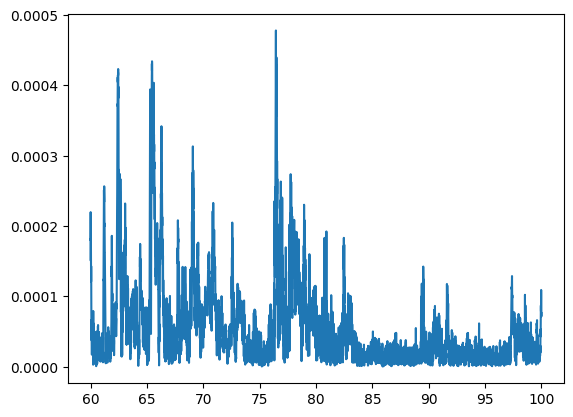

In [ ]:
# buat plot
import matplotlib.pyplot as plt

plt.plot(df4['times'], df4['C3-P3'])
plt.show()

In [ ]:
# import library buat rdf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# import mydata
mydata = pd.read_csv('/content/drive/MyDrive/TA/df4.csv')
mydata

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,times,seizure,frekuensi
0,0.000794,0.000508,0.000333,0.000172,0.000195,0.000229,0.000181,0.000056,0.000013,0.000004,...,0.000056,0.000181,0.000229,0.000195,0.000172,0.000333,0.000508,60.000000,kejang,0.000000
1,0.000731,0.000618,0.000395,0.000121,0.000101,0.000167,0.000210,0.000021,0.000021,0.000016,...,0.000021,0.000210,0.000167,0.000101,0.000121,0.000395,0.000618,60.003906,kejang,0.000098
2,0.000681,0.000671,0.000303,0.000062,0.000196,0.000125,0.000219,0.000017,0.000017,0.000010,...,0.000017,0.000219,0.000125,0.000196,0.000062,0.000303,0.000671,60.007812,kejang,0.000195
3,0.000891,0.000586,0.000303,0.000102,0.000278,0.000107,0.000220,0.000026,0.000011,0.000005,...,0.000026,0.000220,0.000107,0.000278,0.000102,0.000303,0.000586,60.011719,kejang,0.000293
4,0.000970,0.000516,0.000292,0.000171,0.000302,0.000149,0.000212,0.000033,0.000012,0.000006,...,0.000033,0.000212,0.000149,0.000302,0.000171,0.000292,0.000516,60.015625,kejang,0.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000245,0.000282,0.000323,0.000105,0.000099,0.000106,0.000095,0.000052,0.000014,0.000009,...,0.000052,0.000095,0.000106,0.000099,0.000105,0.000323,0.000282,99.984375,tidak kejang,-0.000488
10237,0.000292,0.000258,0.000339,0.000080,0.000120,0.000124,0.000094,0.000061,0.000017,0.000010,...,0.000061,0.000094,0.000124,0.000120,0.000080,0.000339,0.000258,99.988281,tidak kejang,-0.000391
10238,0.000197,0.000276,0.000344,0.000080,0.000113,0.000120,0.000082,0.000060,0.000019,0.000010,...,0.000060,0.000082,0.000120,0.000113,0.000080,0.000344,0.000276,99.992188,tidak kejang,-0.000293
10239,0.000150,0.000274,0.000345,0.000088,0.000108,0.000114,0.000071,0.000059,0.000018,0.000010,...,0.000059,0.000071,0.000114,0.000108,0.000088,0.000345,0.000274,99.996094,tidak kejang,-0.000195


In [ ]:
# bagi data x dan y
x = df4.drop(['times', 'seizure', 'frekuensi'], axis=1)
y = df4['seizure']

In [ ]:
# bagi data train test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# inisiasi skf & rf & param grid
rf = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'max_depth' : [10, 20]
}


In [ ]:
# lakukan pencarian grid search
grid_search = GridSearchCV(
    estimator = rf,
    cv = skf,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = -1
)

In [ ]:
# fit grid search
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20]}, scoring='accuracy')

In [ ]:
# liat best_params_
best_params = grid_search.best_params_
best_params


{'max_depth': 20}

In [ ]:
# latih ulang data latih pake best param

best_model = RandomForestClassifier(**best_params, random_state=42)
best_model

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
# klasifikasi report data train

best_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
# confusion matrix data latih

y_train_pred = best_model.predict(x_train)

print(confusion_matrix(y_train, y_train_pred))

[[4094    2]
 [   0 4096]]


In [ ]:
# cm train
from sklearn.metrics import classification_report

cm = classification_report(y_train, y_train_pred)
print(cm)

              precision    recall  f1-score   support

      kejang       1.00      1.00      1.00      4096
tidak kejang       1.00      1.00      1.00      4096

    accuracy                           1.00      8192
   macro avg       1.00      1.00      1.00      8192
weighted avg       1.00      1.00      1.00      8192



In [ ]:
# classification report data test
y_test_pred = best_model.predict(x_test)

print(confusion_matrix(y_test, y_test_pred))

[[918 106]
 [144 881]]


In [ ]:
# cm test
from sklearn.metrics import classification_report

cm = classification_report(y_test, y_test_pred)
print(cm)

              precision    recall  f1-score   support

      kejang       0.86      0.90      0.88      1024
tidak kejang       0.89      0.86      0.88      1025

    accuracy                           0.88      2049
   macro avg       0.88      0.88      0.88      2049
weighted avg       0.88      0.88      0.88      2049



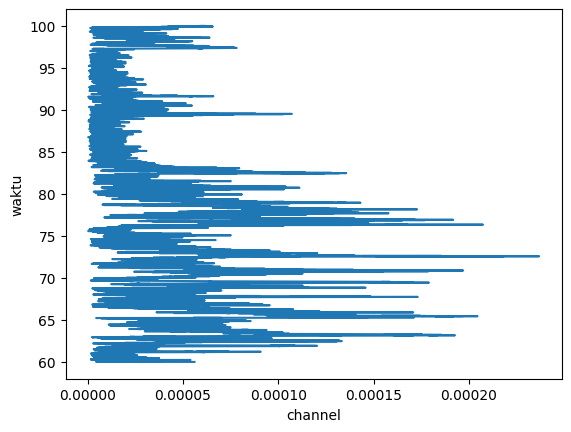

In [ ]:
# buat plot
import matplotlib.pyplot as plt

plt.plot(mydata['P3-O1'], mydata['times'])
plt.xlabel('channel')
plt.ylabel('waktu')
plt.show()

In [ ]:
# ubah dataframe jadi array numpy
arr = mydata['FP1-F7'].to_numpy()
arr

array([7.94216190e-04, 7.30791376e-04, 6.80982211e-04, ...,
       1.96838632e-04, 1.50404263e-04, 8.30026864e-05])

In [ ]:
# impulsse respon manual

def h(f1, f2, N):
  n = np.arange(1, N+1)

  term1 = (2 * f1) * (np.sin(2 * n * np.pi * f1) / (2 * n * np.pi * f1))
  term2 = (2 * f2) * (np.sin(2 * n * np.pi * f2) / (2 * n * np.pi * f2))

  hanning = 0.5 + 0.5 * (np.cos(2 * n * np.pi) / (N + 1))
  hamming = 0.54 + 0.46 * (np.cos(2 * n * np.pi) / (N+1))
  rectangular = 1
  blackman = 0.42 + 0.5 * (np.cos(2 * n * np.pi) / (N) + 0.08 * (np.cos(2 * n * np.pi)))

  return (term2 - term1) * hamming

f1 = 1/128
f2 = 50/128
N = 10

impuls_respon = h(f1, f2, N)
impuls_respon

array([ 0.10840141, -0.09989628,  0.04538541, -0.02675071, -0.01975197,
        0.01670444, -0.0352426 ,  0.00751034, -0.01081502, -0.01901927])

In [ ]:
# rumus windowing



In [ ]:
# konvolusi manual
def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]
  return np.array(x[:N])

konvo = konvolusi(arr, impuls_respon)
konvo

array([7.94216190e-04, 7.30791376e-04, 6.80982211e-04, ...,
       1.96838632e-04, 1.50404263e-04, 8.30026864e-05])

In [ ]:
# fft manual pake data sendiri
def fft_manual(x):
  N = len(x)
  if N <= 1:
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp (-2j * np.pi * np.arange(N) / (N))

  return np.concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

arr1 = np.array([1, 2, 3, 4])
fft1 = fft_manual(arr1)
print('fft1 = ', fft1)

arr2 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fft2 = fft_manual(arr2)
print('fft2 = ', fft2)

fft1 =  [10.+0.j -2.+2.j -2.+0.j -2.-2.j]
fft2 =  [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


In [ ]:
# magnitudo manual
mag = np.sqrt(np.imag(fft2)**2 + np.real(fft2)**2)
mag

array([36.        , 10.45250372,  5.65685425,  4.3295688 ,  4.        ,
        4.3295688 ,  5.65685425, 10.45250372])

In [ ]:
# confusion matrix
cm = np.array([
    [1, 2],
    [3, 4]
])

cm

array([[1, 2],
       [3, 4]])

In [ ]:
# inisiasi penempatan
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]


In [ ]:
# akurasi

akurasi = (tp + tn) / (tp + tn + fp + fn)
akurasi

np.float64(0.5)

In [ ]:
# recall positif
recall_positif = tp / (tp + fn)
recall_positif


np.float64(0.5714285714285714)

In [ ]:
# recall negatif
recall_negatif = tn / (tn + fp)
recall_negatif

np.float64(0.3333333333333333)

In [ ]:
# presisi positif
presisi_positif = tp / (tp + fp)
presisi_positif


np.float64(0.6666666666666666)

In [ ]:
# presisi negatif
presisi_negatif = tn / (tn + fn)
presisi_negatif

np.float64(0.25)

In [ ]:
# f1 positif
f1_positif = (2 * recall_positif * presisi_positif) / (recall_positif + presisi_positif)
f1_positif

np.float64(0.6153846153846153)

In [ ]:
# f1 negatif
f1_negatif = (2 * recall_negatif * presisi_negatif) / (recall_negatif + presisi_negatif)
f1_negatif

np.float64(0.28571428571428575)

In [ ]:
# gini index
def gini_index(nilai):
  total = sum(nilai)

  gini = 1
  for c in nilai:
    p = c / total
    gini_index = gini - p ** 2
  return gini_index

C1 = np.array([4, 3])
print(gini_index(C1))


0.8163265306122449


In [ ]:
# buat fungsi gini split
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = len(grup)
    gini = gini_index(g)
    gini_split = gini_split + (size / total) * gini
  return gini_split

left = np.array([3, 4])
right = np.array([6,1])

print(gini_split([left, right]))

0.23615160349854225


In [ ]:
# respon impulse f1, f2, N, n
def respon_impulse(f1, f2, N, n):
  term1 = (2 * f1) * (np.sin(2 * n * np.pi * f1) / (2 * n * np.pi * f1))
  term2 = (2 * f2) * (np.sin(2 * n * np.pi * f2) / (2 * n * np.pi * f1))

  rectangular = 1
  hanning = 0.5 + 0.5 * np.cos((2 * np.pi * n) / (N+1))
  hamming = 0.54 + 0.46 * np.cos((2 * np.pi * n) / (N+1))
  blackman = 0.42 + 0.5 * np.cos((2 * np.pi * n) / N) + 0.08 * np.cos((4 * np.pi * n) / N)

  return (term2 - term1) * hamming

f1 = 1/128
f2 = 50/128
N = 10
n = 1

print(respon_impulse(f1, f2, N, n))

9.34491066382666


In [ ]:
# impulsse respon h
def respon_impulse(f1, f2, N):
  n = np.arange(1, N+1)
  term1 = (2 * f1) * (np.sin(2 * n * np.pi * f1) / (2 * n * np.pi * f1))
  term2 = (2 * f2) * (np.sin(2 * n * np.pi * f2) / (2 * n * np.pi * f2))

  rectangular = 1
  hanning = 0.5 + 0.5 * np.cos((2 * np.pi *n) / (N+1))
  hamming = 0.54 + 0.46 * np.cos((2 * np.pi * n) / (N+1))
  blackman = 0.42 + 0.5 * np.cos((2 * np.pi * n) / N) + 0.08 * np.cos((4 * np.pi * n) / N)

  return (term2 - term1) * hamming

f1 = 1/128
f2 = 50/128
N = 10

tap = respon_impulse(f1, f2, N)
tap

array([ 0.17270958, -0.12552592,  0.03701667, -0.01097784, -0.00334847,
        0.00283183, -0.01446271,  0.00612549, -0.01358975, -0.03030229])

In [ ]:
# konvolusi x, h
def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]
  return np.array(y[:N])

x = np.array([1,8, 4, 2, 4,9, 6, 1])
h = np.array([0.98, 0.24, 0.78, 0.75])


konv = konvolusi(x, h)
konv


array([ 0.98,  8.08,  6.62,  9.91, 13.52, 14.34, 12.66, 12.44])

In [ ]:
# konvolusi manual y
x = np.array([1,8, 4, 2, 4,9, 6, 1])
h = np.array([0.98, 0.24, 0.78, 0.75])

y0 = x[0]*h[0]
y1 = x[0]*h[1] + x[1]*h[0]
y2 = x[0]*h[2] + x[1]*h[1] + x[2]*h[0]


print(y0, y1, y2)

0.98 8.08 6.62


In [ ]:
# fft manual
def fft_manual(x):
  N = len(x)
  if N <=1 :
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp (-2j * np.pi * np.arange(N) / N)

  return np.concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

print(fft_manual(konv))

[ 78.55       +0.j         -15.17750829+12.25546861j
  -4.78       -0.07j        -9.90249171 +0.17546861j
 -10.99       +0.j          -9.90249171 -0.17546861j
  -4.78       +0.07j       -15.17750829-12.25546861j]


In [ ]:
# dft

import numpy as np

# Data
x_n = np.array([1, 2, 3, 4])
N = len(x_n)

# Buat DFT
X_k = np.zeros(N, dtype=complex)  # tempat untuk hasil DFT

for k in range(N):
    for n in range(N):
        X_k[k] += x_n[n] * np.exp(-2j * np.pi * n * k / N)

print("Hasil DFT X_k:", X_k)


Hasil DFT X_k: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


In [ ]:
def dft_manual(x_n):
  x_n = np.array(x_n)
  N = len(x_n)
  x_k = np.zeros(N, dtype=complex)

  for k in range(N):
    for n in range(N):
      x_k[k] += x_n[n] * np.exp(-2j * np.pi * n * k / N)

  return x_k

data = np.array([1, 2, 3, 4])
hasil = dft_manual(data)
print(hasil)

[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


In [ ]:
# magnitudo
mag = np.sqrt(np.imag(hasil) ** 2 + np.real(hasil) ** 2)
mag

array([10.        ,  2.82842712,  2.        ,  2.82842712])

In [ ]:
# standar deviasi
def standar_deviasi(data):
  N = len(data)
  mean = sum(data) / N
  jumlah_kuadrat = 0

  for x in data:
    selisih = x - mean
    kuadrat = selisih ** 2
    jumlah_kuadrat += selisih ** 2

  rata_kuadrat = jumlah_kuadrat / N
  std = np.sqrt(rata_kuadrat)
  return std


data = [70, 75, 80, 85, 90]
hasil = standar_deviasi(data)
print(hasil)

7.0710678118654755


In [ ]:
def standar_deviasi(data):
  N = len(data)
  mean = sum(data) / N
  jumlah_kuadrat = 0

  for x in data:
    selisih = x - mean
    kuadrat = selisih ** 2
    jumlah_kuadrat += selisih ** 2

  rata_kuadrat = jumlah_kuadrat / N
  std = np.sqrt(rata_kuadrat)
  return std

data = [70, 75, 80, 85, 90]
hasil = standar_deviasi(data)
print(hasil)

7.0710678118654755


In [ ]:
def standar_deviasi(data):
  N = len(data)
  mean = sum(data) / N
  jumlah_kuadrat = 0

  for x in data:
    selisih = x - mean
    kuadrat = selisih ** 2
    jumlah_kuadrat += selisih ** 2

  rata_kuadrat = jumlah_kuadrat / N
  std = np.sqrt(rata_kuadrat)
  return std



In [ ]:
def gini_index(c1, c2):
    cj = c1 + c2
    p1 = (c1 / cj) ** 2
    p2 = (c2 / cj) ** 2
    gj = 1 - (p1 + p2)
    return gj

# Contoh pemakaian
c1 = 5
c2 = 6
hasil = gini_index(c1, c2)
print(hasil)


0.49586776859504145


In [ ]:
# gini index cj
def gini_index(c1, c2):
  cj = c1 + c2
  p1 = (c1 / cj) ** 2
  p2 = (c2 / cj) ** 2
  gj = 1 - (p1 + p2)
  return gj

c1 = 9
c2 = 2
print(gini_index(c1, c2))




0.2975206611570247


In [ ]:
# gini split

def gini_split(ci, cj, gi, gj):
  total = ci + cj
  gini_split = ((ci / total) * gi) + ((cj / total) * gj)
  return gini_split


ci = 10
cj = 15
gi = 0.456
gj = 0.396
hasil = gini_split(ci, cj, gi, gj)
print(hasil)

0.42000000000000004


# hari 4

In [ ]:
# respon impulse f1, f2, N, n
def impulse_respon(f1, f2, N, n):
  term1 = (2 * f1) * (np.sin(2 * n * np.pi * f1) / (2 * n * np.pi * f1))
  term2 = (2 * f2) * (np.sin(2 * n * np.pi * f2) / (2 * n * np.pi * f1))

  hamming = 0.54 + 0.46 * (np.cos(2 * np.pi * n)/(N+1))
  hanning = 0.5 + 0.5 * (np.cos(2 * np.pi * n) / (N+1))
  rectangular = 1
  blackman = 0.42 + 0.5 * (np.cos(2 * np.pi * n)/(N) + 0.08 * (np.cos(4 * np.pi * n) / (N)))

  respon = term2 - (term1 * hamming)
  return respon

f1 = 1/128
f2 = 50/128
N = 10
n = 1

impuls = impulse_respon(f1, f2, N, n)
print(impuls)

10.087595445229562


In [ ]:
# impulsse respon h

def h(f1, f2, N):
  n = np.arange(1, N+1)

  term1 = 2 * f1 * (np.sin(n * 2 * np.pi * f1) / (n * 2 * np.pi * f1))
  term2 = 2 * f2 * (np.sin(n * 2 * np.pi * f2) / (n * 2 * np.pi * f1))

  window = 0.54 + 0.46 * (np.cos(2 * np.pi * n)/(N+1))

  return (term2-term1) * window

f1 = 1/128
f2 = 50/128
N = 10

tap = h(f1, f2, N)
print(tap)

[ 5.86534631 -4.55007487  2.71311653 -0.89493748 -0.54660272  1.27426418
 -1.32538948  0.80961033 -0.10964598 -0.52318401]


In [ ]:
# buat respon impulse package

from scipy.signal import firwin

fs = 256
f1 = 1
f2 = 50
numtaps = 10
nyquist = 256 / 2

normalisasi = [f1 / nyquist, f2 / nyquist]

taps = firwin(numtaps, normalisasi, window='hamming', pass_zero='bandpass')
taps

array([-0.00519542, -0.01958824,  0.00082344,  0.17387891,  0.40042047,
        0.40042047,  0.17387891,  0.00082344, -0.01958824, -0.00519542])

In [ ]:
# konvolusi x, h

def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]

  return np.array(y[:N])

In [ ]:
# konvolusi manual y

# Data (contoh sama kayak di gambar)
x = [0, 0.74, 1.37, 1.81, 2, 1.9, 1.54, 0.96, 0.25]   # data sinyal x
h = [0.0357, 0.2411, 0.4465, 0.0357]  # koefisien filter (contoh dari gambar)

# Hitung manual seperti di gambar
y0 = x[0]*h[0]

y1 = x[1]*h[0] + x[0]*h[1]

y2 = x[2]*h[0] + x[1]*h[1] + x[0]*h[2]

y3 = x[3]*h[0] + x[2]*h[1] + x[1]*h[2] + x[0]*h[3]

y4 = x[4]*h[0] + x[3]*h[1] + x[2]*h[2] + x[1]*h[3]

y5 = x[5]*h[0] + x[4]*h[1] + x[3]*h[2] + x[2]*h[3]

y6 = x[6]*h[0] + x[5]*h[1] + x[4]*h[2] + x[3]*h[3]

y7 = x[7]*h[0] + x[6]*h[1] + x[5]*h[2] + x[4]*h[3]

y8 = x[8]*h[0] + x[7]*h[1] + x[6]*h[2] + x[5]*h[3]

# Cetak hasil
print("y(0) =", y0)
print("y(1) =", y1)
print("y(2) =", y2)
print("y(3) =", y3)
print("y(4) =", y4)
print("y(5) =", y5)
print("y(6) =", y6)
print("y(7) =", y7)
print("y(8) =", y8)


In [ ]:
# fft manual

def fft_manual(x):
  N = len(x)
  if N <= 1:
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp (-2j * np.pi * np.arange(N) / N)

  return np.concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

arr = np.array([1, 2, 3, 4])
fft_hasil = fft_manual(arr)
fft_hasil

array([10.+0.j, -2.+2.j, -2.+0.j, -2.-2.j])

In [ ]:
# dft
import numpy as np
def dft_manual(x_n):
    x_n = np.array(x_n)  # pastikan data dalam bentuk array
    N = len(x_n)
    X_k = np.zeros(N, dtype=complex)  # wadah hasil DFT

    for k in range(N):
        for n in range(N):
            X_k[k] += x_n[n] * np.exp(-2j * np.pi * n * k / N)

    return X_k

# Contoh penggunaan
data = [1, 2, 3, 4]
hasil = dft_manual(data)
print("Hasil DFT X_k:", hasil)


Hasil DFT X_k: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


In [ ]:
# magnitudo
mag = np.sqrt(np.imag(diskrit) ** 2 + np.real(diskrit) ** 2)
mag

array([10.        ,  2.82842712,  2.        ,  2.82842712])

In [ ]:
# standar deviasi
def standar_deviasi(data):
  n = len(data)
  mean = sum(data) / n
  jumlah_kuadrat = 0

  for x in data:
    selisih = x - mean
    kuadrat = selisih ** 2
    jumlah_kuadrat = jumlah_kuadrat + kuadrat

  rata2 = jumlah_kuadrat / n

  std = rata2 ** 0.5
  return std

data = [1, 2, 3, 4]
hasil = standar_deviasi(data)
print(hasil)

1.118033988749895


In [ ]:
# gini index ci

def gini_index(c1, c2):
  ci = c1 + c2
  p1 = (c1 / ci) ** 2
  p2 = (c2 / ci) ** 2
  Gi = 1 - (p1 + p2)
  return Gi

c1 = 4
c2 = 8
hasil = gini_index(c1, c2)
print(hasil)

0.4444444444444444


In [ ]:
# gini index cj

def gini_index(c1, c2):
  cj = c1 + c2
  p1 = (c1 / cj) ** 2
  p2 = (c2 / cj) ** 2
  Gj = 1 - (p1 + p2)
  return Gj

c1 = 8
c2 = 3
hasil = gini_index(c1, c2)
print(hasil)

0.39669421487603307


In [ ]:
# gini split

def gini_split(ci, cj, Gi, Gj):
  total = ci + cj
  gini_split = ((ci / total) * Gi) + ((cj /total) * Gj)
  return gini_split

ci = 10
cj = 12
Gi = 0.23
Gj = 0.47
print(gini_split(ci, cj, Gi, Gj))

0.3609090909090909


# hari 3

In [ ]:
# drive mount
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [ ]:
# install mne
!pip install mne
import mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.8 MB/s eta 0:00:00


In [ ]:
# import pandas numpy
import pandas as pd
import numpy as np

In [ ]:
# import data edf
data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb16_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-3748411429.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
/tmp/ipython-input-3748411429.py:2: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')


<RawEDF | chb16_16.edf, 28 x 921600 (3600.0 s), ~26 KiB, data not loaded>

In [ ]:
# ekstraksi data & channel
data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names

In [ ]:
# jadiin dataframe
df1 = pd.DataFrame(data.T, columns=channel_names)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05


In [ ]:
# tambah kolom times
df1['Times'] = times
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# drop kolom --0, --1 ..
df1 = df1.drop(['--0', '--1', '--2', '--3', '--4'], axis=1)
df1


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,2.559219e-05,-5.684982e-05,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,3.145299e-05,-6.114774e-05,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-1.074481e-05,-4.942613e-05,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-4.356532e-05,-5.958486e-05,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# simpen df1
df1.to_csv('df1.csv', index=False)


In [ ]:
# potong data
df2 = df1[(df1['Times'] >= 60) & (df1['Times'] <=100)]
df2

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
15360,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,-0.000023,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000
15361,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,-0.000080,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080,60.003906
15362,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,-0.000100,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812
15363,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,-0.000118,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719
15364,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,-0.000087,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25596,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,0.000021,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062,99.984375
25597,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,0.000014,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075,99.988281
25598,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,0.000006,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069,99.992188
25599,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,0.000006,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062,99.996094


In [ ]:
# labelin data
def label(baris):
  if 70 <= baris['Times'] < 90:
    return 'kejang'
  else:
    return 'tidak kejang'

df2['seizure'] = df2.apply(label, axis=1)
df2

/tmp/ipython-input-1967479477.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['seizure'] = df2.apply(label, axis=1)


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times,seizure
15360,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,tidak kejang
15361,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,tidak kejang
15362,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,tidak kejang
15363,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,tidak kejang
15364,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25596,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062,99.984375,tidak kejang
25597,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075,99.988281,tidak kejang
25598,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069,99.992188,tidak kejang
25599,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062,99.996094,tidak kejang


In [ ]:
# cek jumlah label
print(df2['seizure'].value_counts())

seizure
tidak kejang    5121
kejang          5120
Name: count, dtype: int64


In [ ]:
# simpen data yang udah dipotong & dilabel
df2.to_csv('df2.csv', index=False)

In [ ]:
# import df2
df2 = pd.read_csv('/content/drive/MyDrive/TA/df2.csv')
df2


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times,seizure
0,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,tidak kejang
1,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,tidak kejang
2,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,tidak kejang
3,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,tidak kejang
4,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062,99.984375,tidak kejang
10237,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075,99.988281,tidak kejang
10238,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069,99.992188,tidak kejang
10239,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062,99.996094,tidak kejang


In [ ]:
# df 3 = hapus kolom time dan seizure
df3 = df2.drop(['Times', 'seizure'], axis=1)
df3


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000280,0.000103,-0.000068,0.000008,0.000285,0.000005,-0.000001,0.000035,0.000035,-0.000014,...,0.000033,-0.000023,0.000102,-0.000054,-9.572650e-06,0.000069,-0.000072,5.059829e-05,0.000026,-0.000054
1,0.000250,0.000055,0.000047,-0.000017,0.000305,0.000014,-0.000002,0.000019,0.000042,-0.000015,...,0.000018,-0.000080,0.000177,-0.000080,-2.676435e-05,-0.000047,0.000038,1.387057e-05,0.000081,-0.000080
2,0.000243,0.000088,0.000016,-0.000015,0.000307,0.000008,0.000004,0.000013,0.000045,-0.000011,...,-0.000010,-0.000100,0.000088,0.000021,-5.177045e-05,-0.000015,0.000025,-1.152625e-05,-0.000001,0.000021
3,0.000246,0.000116,-0.000027,0.000020,0.000284,0.000021,0.000024,0.000024,0.000052,0.000012,...,0.000022,-0.000118,0.000071,0.000083,-2.715507e-05,0.000027,0.000004,-5.860806e-07,-0.000046,0.000083
4,0.000280,0.000126,-0.000054,0.000005,0.000262,0.000032,0.000040,0.000022,0.000054,0.000026,...,0.000034,-0.000087,0.000096,0.000026,-1.953602e-07,0.000055,-0.000061,2.090354e-05,-0.000012,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000002,0.000081,-0.000031,-0.000029,0.000066,-0.000027,-0.000060,0.000044,-0.000085,0.000032,...,0.000196,0.000021,-0.000021,0.000062,5.333333e-05,0.000031,-0.000124,-3.145299e-05,-0.000004,0.000062
10237,-0.000010,0.000065,-0.000005,-0.000007,0.000064,-0.000037,-0.000053,0.000068,-0.000092,0.000030,...,0.000215,0.000014,-0.000038,0.000075,8.029304e-05,0.000006,-0.000112,-3.028083e-05,-0.000015,0.000075
10238,-0.000018,0.000059,-0.000005,-0.000011,0.000068,-0.000047,-0.000062,0.000066,-0.000097,0.000009,...,0.000209,0.000006,-0.000034,0.000069,7.638584e-05,0.000005,-0.000116,-3.340659e-05,-0.000002,0.000069
10239,-0.000020,0.000064,-0.000015,-0.000006,0.000069,-0.000049,-0.000065,0.000066,-0.000099,-0.000005,...,0.000196,0.000006,-0.000031,0.000062,6.818071e-05,0.000015,-0.000127,-1.504274e-05,-0.000011,0.000062


In [ ]:
# buat respon impulse
from scipy.signal import firwin

fs = 256
f1 = 1
f2 = 30
numtaps = 20
nyquist = fs / 2

normalisasi = [f1/nyquist, f2/nyquist]

taps = firwin(numtaps, normalisasi, window='hamming', pass_zero='bandpass')
taps


array([ 0.00124001, -0.00099752, -0.0071835 , -0.01789498, -0.02500003,
       -0.0125987 ,  0.03244951,  0.10723229,  0.18812764,  0.24101041,
        0.24101041,  0.18812764,  0.10723229,  0.03244951, -0.0125987 ,
       -0.02500003, -0.01789498, -0.0071835 , -0.00099752,  0.00124001])

In [ ]:
# konvolusi filtering
from scipy.signal import lfilter

filtering = lfilter(taps, 1, df3)
filtering


array([[ 3.47628059e-07, -1.51497746e-07, -2.20147042e-06, ...,
        -5.11129018e-06,  2.78639881e-06,  1.15028072e-05],
       [ 3.10321633e-07, -1.81080150e-07, -1.79448464e-06, ...,
        -1.04875989e-05, -2.82116868e-06,  5.18921558e-06],
       [ 3.01600651e-07, -1.33366678e-07, -1.81546250e-06, ...,
        -1.46891698e-05, -1.37892451e-05, -1.10696148e-05],
       ...,
       [-2.20447062e-08,  9.11353633e-08,  6.26028432e-08, ...,
        -5.70413040e-06,  1.72597187e-05,  3.90593344e-05],
       [-2.49517004e-08,  9.92878694e-08,  6.26537696e-08, ...,
        -9.29564028e-06,  1.39283655e-05,  3.57920095e-05],
       [-1.57462187e-08,  9.13980644e-08, -2.56529600e-08, ...,
        -1.20804732e-05,  1.04862659e-05,  3.15360364e-05]])

In [ ]:
# fft
fft = np.fft.fft(filtering)
fft

array([[ 6.70347197e-04+0.00000000e+00j, -5.36596275e-04+1.64747729e-05j,
         2.36635316e-04+2.18505605e-05j, ...,
         4.33322051e-05+1.51982107e-05j,  2.36635316e-04-2.18505605e-05j,
        -5.36596275e-04-1.64747729e-05j],
       [ 6.80043125e-04+0.00000000e+00j, -5.93656150e-04+3.35653556e-05j,
         2.80693146e-04-4.51382687e-05j, ...,
         1.89802181e-05-5.63746990e-06j,  2.80693146e-04+4.51382687e-05j,
        -5.93656150e-04-3.35653556e-05j],
       [ 6.48216000e-04+0.00000000e+00j, -6.16827742e-04+1.87905955e-05j,
         2.54351216e-04-5.76720818e-05j, ...,
         1.36460480e-05+2.99880270e-05j,  2.54351216e-04+5.76720818e-05j,
        -6.16827742e-04-1.87905955e-05j],
       ...,
       [-2.32745767e-05+0.00000000e+00j, -1.93793154e-06-1.07802945e-04j,
         1.82314387e-04+4.35975478e-05j, ...,
         6.98361243e-06-9.62273369e-05j,  1.82314387e-04-4.35975478e-05j,
        -1.93793154e-06+1.07802945e-04j],
       [-5.16895895e-05+0.00000000e+00j, -8.

In [ ]:
# ambil kolom frekuensi
frekuensi = np.fft.fftfreq(len(filtering))
frekuensi

array([ 0.00000000e+00,  9.76467142e-05,  1.95293428e-04, ...,
       -2.92940143e-04, -1.95293428e-04, -9.76467142e-05])

In [ ]:
# jadiin magnitudo
magnitudo = np.abs(fft)
magnitudo


array([[6.70347197e-04, 5.36849122e-04, 2.37641999e-04, ...,
        4.59202092e-05, 2.37641999e-04, 5.36849122e-04],
       [6.80043125e-04, 5.94604286e-04, 2.84299324e-04, ...,
        1.97997411e-05, 2.84299324e-04, 5.94604286e-04],
       [6.48216000e-04, 6.17113887e-04, 2.60807612e-04, ...,
        3.29468722e-05, 2.60807612e-04, 6.17113887e-04],
       ...,
       [2.32745767e-05, 1.07820362e-04, 1.87454747e-04, ...,
        9.64804188e-05, 1.87454747e-04, 1.07820362e-04],
       [5.16895895e-05, 1.27078776e-04, 1.91054698e-04, ...,
        9.71684424e-05, 1.91054698e-04, 1.27078776e-04],
       [1.14914847e-04, 1.62194991e-04, 1.79324464e-04, ...,
        9.17393976e-05, 1.79324464e-04, 1.62194991e-04]])

In [ ]:
# jadiin dataframe buat df4
df4 = pd.DataFrame(magnitudo)
df4

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000670,0.000537,0.000238,0.000046,0.000039,0.000015,0.000011,0.000010,0.000009,8.293256e-06,...,7.971211e-06,8.293256e-06,0.000009,0.000010,0.000011,0.000015,0.000039,0.000046,0.000238,0.000537
1,0.000680,0.000595,0.000284,0.000020,0.000025,0.000010,0.000007,0.000006,0.000005,4.811056e-06,...,4.487152e-06,4.811056e-06,0.000005,0.000006,0.000007,0.000010,0.000025,0.000020,0.000284,0.000595
2,0.000648,0.000617,0.000261,0.000033,0.000009,0.000008,0.000008,0.000006,0.000005,4.874078e-06,...,4.894074e-06,4.874078e-06,0.000005,0.000006,0.000008,0.000008,0.000009,0.000033,0.000261,0.000617
3,0.000739,0.000614,0.000237,0.000034,0.000018,0.000002,0.000002,0.000002,0.000001,8.413268e-07,...,9.745878e-07,8.413268e-07,0.000001,0.000002,0.000002,0.000002,0.000018,0.000034,0.000237,0.000614
4,0.000787,0.000576,0.000214,0.000053,0.000040,0.000013,0.000010,0.000009,0.000009,8.229611e-06,...,7.924283e-06,8.229611e-06,0.000009,0.000009,0.000010,0.000013,0.000040,0.000053,0.000214,0.000576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000017,0.000099,0.000186,0.000085,0.000069,0.000047,0.000038,0.000033,0.000030,2.827335e-05,...,2.703578e-05,2.827335e-05,0.000030,0.000033,0.000038,0.000047,0.000069,0.000085,0.000186,0.000099
10237,0.000047,0.000069,0.000181,0.000093,0.000068,0.000047,0.000038,0.000033,0.000031,2.850366e-05,...,2.720908e-05,2.850366e-05,0.000031,0.000033,0.000038,0.000047,0.000068,0.000093,0.000181,0.000069
10238,0.000023,0.000108,0.000187,0.000096,0.000063,0.000044,0.000035,0.000030,0.000028,2.617473e-05,...,2.499740e-05,2.617473e-05,0.000028,0.000030,0.000035,0.000044,0.000063,0.000096,0.000187,0.000108
10239,0.000052,0.000127,0.000191,0.000097,0.000060,0.000041,0.000033,0.000028,0.000026,2.440439e-05,...,2.334143e-05,2.440439e-05,0.000026,0.000028,0.000033,0.000041,0.000060,0.000097,0.000191,0.000127


In [ ]:
# tambahin kolom seizure & times dari df2
df4['times'] = df2['Times']
df4['seizure'] = df2['seizure']
df4

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,times,seizure
0,0.000670,0.000537,0.000238,0.000046,0.000039,0.000015,0.000011,0.000010,0.000009,8.293256e-06,...,0.000009,0.000010,0.000011,0.000015,0.000039,0.000046,0.000238,0.000537,60.000000,tidak kejang
1,0.000680,0.000595,0.000284,0.000020,0.000025,0.000010,0.000007,0.000006,0.000005,4.811056e-06,...,0.000005,0.000006,0.000007,0.000010,0.000025,0.000020,0.000284,0.000595,60.003906,tidak kejang
2,0.000648,0.000617,0.000261,0.000033,0.000009,0.000008,0.000008,0.000006,0.000005,4.874078e-06,...,0.000005,0.000006,0.000008,0.000008,0.000009,0.000033,0.000261,0.000617,60.007812,tidak kejang
3,0.000739,0.000614,0.000237,0.000034,0.000018,0.000002,0.000002,0.000002,0.000001,8.413268e-07,...,0.000001,0.000002,0.000002,0.000002,0.000018,0.000034,0.000237,0.000614,60.011719,tidak kejang
4,0.000787,0.000576,0.000214,0.000053,0.000040,0.000013,0.000010,0.000009,0.000009,8.229611e-06,...,0.000009,0.000009,0.000010,0.000013,0.000040,0.000053,0.000214,0.000576,60.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000017,0.000099,0.000186,0.000085,0.000069,0.000047,0.000038,0.000033,0.000030,2.827335e-05,...,0.000030,0.000033,0.000038,0.000047,0.000069,0.000085,0.000186,0.000099,99.984375,tidak kejang
10237,0.000047,0.000069,0.000181,0.000093,0.000068,0.000047,0.000038,0.000033,0.000031,2.850366e-05,...,0.000031,0.000033,0.000038,0.000047,0.000068,0.000093,0.000181,0.000069,99.988281,tidak kejang
10238,0.000023,0.000108,0.000187,0.000096,0.000063,0.000044,0.000035,0.000030,0.000028,2.617473e-05,...,0.000028,0.000030,0.000035,0.000044,0.000063,0.000096,0.000187,0.000108,99.992188,tidak kejang
10239,0.000052,0.000127,0.000191,0.000097,0.000060,0.000041,0.000033,0.000028,0.000026,2.440439e-05,...,0.000026,0.000028,0.000033,0.000041,0.000060,0.000097,0.000191,0.000127,99.996094,tidak kejang


In [ ]:
df4.columns = df2.columns

In [ ]:
# tambahin kolom frekuensi
df4['frekuensi'] = frekuensi
df4

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times,seizure,frekuensi
0,0.000670,0.000537,0.000238,0.000046,0.000039,0.000015,0.000011,0.000010,0.000009,8.293256e-06,...,0.000010,0.000011,0.000015,0.000039,0.000046,0.000238,0.000537,60.000000,tidak kejang,0.000000
1,0.000680,0.000595,0.000284,0.000020,0.000025,0.000010,0.000007,0.000006,0.000005,4.811056e-06,...,0.000006,0.000007,0.000010,0.000025,0.000020,0.000284,0.000595,60.003906,tidak kejang,0.000098
2,0.000648,0.000617,0.000261,0.000033,0.000009,0.000008,0.000008,0.000006,0.000005,4.874078e-06,...,0.000006,0.000008,0.000008,0.000009,0.000033,0.000261,0.000617,60.007812,tidak kejang,0.000195
3,0.000739,0.000614,0.000237,0.000034,0.000018,0.000002,0.000002,0.000002,0.000001,8.413268e-07,...,0.000002,0.000002,0.000002,0.000018,0.000034,0.000237,0.000614,60.011719,tidak kejang,0.000293
4,0.000787,0.000576,0.000214,0.000053,0.000040,0.000013,0.000010,0.000009,0.000009,8.229611e-06,...,0.000009,0.000010,0.000013,0.000040,0.000053,0.000214,0.000576,60.015625,tidak kejang,0.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0.000017,0.000099,0.000186,0.000085,0.000069,0.000047,0.000038,0.000033,0.000030,2.827335e-05,...,0.000033,0.000038,0.000047,0.000069,0.000085,0.000186,0.000099,99.984375,tidak kejang,-0.000488
10237,0.000047,0.000069,0.000181,0.000093,0.000068,0.000047,0.000038,0.000033,0.000031,2.850366e-05,...,0.000033,0.000038,0.000047,0.000068,0.000093,0.000181,0.000069,99.988281,tidak kejang,-0.000391
10238,0.000023,0.000108,0.000187,0.000096,0.000063,0.000044,0.000035,0.000030,0.000028,2.617473e-05,...,0.000030,0.000035,0.000044,0.000063,0.000096,0.000187,0.000108,99.992188,tidak kejang,-0.000293
10239,0.000052,0.000127,0.000191,0.000097,0.000060,0.000041,0.000033,0.000028,0.000026,2.440439e-05,...,0.000028,0.000033,0.000041,0.000060,0.000097,0.000191,0.000127,99.996094,tidak kejang,-0.000195


In [ ]:
# simpen df4
df4.to_csv('df4.csv', index=1)

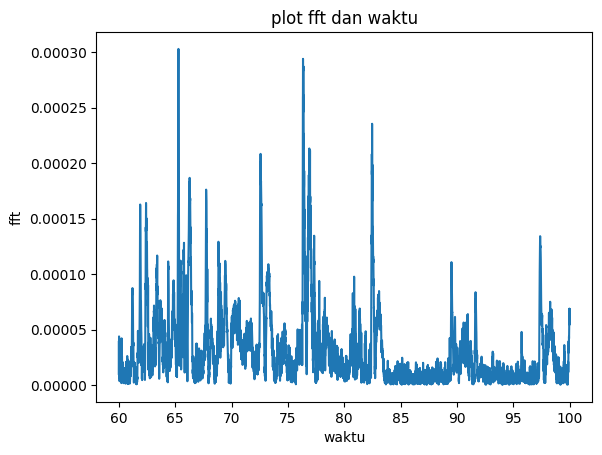

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df4['Times'], df4['FP1-F3'])
plt.xlabel('waktu')
plt.ylabel('fft')
plt.title('plot fft dan waktu')
plt.show()

In [ ]:
# import library buat rdf
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix



In [ ]:
# import mydata
mydata = pd.read_csv('/content/drive/MyDrive/TA/df4.csv')
mydata

,Unnamed: 0,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,...,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times,seizure,frekuensi
0,0,0.000670,0.000537,0.000238,0.000046,0.000039,0.000015,0.000011,0.000010,0.000009,...,0.000010,0.000011,0.000015,0.000039,0.000046,0.000238,0.000537,60.000000,tidak kejang,0.000000
1,1,0.000680,0.000595,0.000284,0.000020,0.000025,0.000010,0.000007,0.000006,0.000005,...,0.000006,0.000007,0.000010,0.000025,0.000020,0.000284,0.000595,60.003906,tidak kejang,0.000098
2,2,0.000648,0.000617,0.000261,0.000033,0.000009,0.000008,0.000008,0.000006,0.000005,...,0.000006,0.000008,0.000008,0.000009,0.000033,0.000261,0.000617,60.007812,tidak kejang,0.000195
3,3,0.000739,0.000614,0.000237,0.000034,0.000018,0.000002,0.000002,0.000002,0.000001,...,0.000002,0.000002,0.000002,0.000018,0.000034,0.000237,0.000614,60.011719,tidak kejang,0.000293
4,4,0.000787,0.000576,0.000214,0.000053,0.000040,0.000013,0.000010,0.000009,0.000009,...,0.000009,0.000010,0.000013,0.000040,0.000053,0.000214,0.000576,60.015625,tidak kejang,0.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,10236,0.000017,0.000099,0.000186,0.000085,0.000069,0.000047,0.000038,0.000033,0.000030,...,0.000033,0.000038,0.000047,0.000069,0.000085,0.000186,0.000099,99.984375,tidak kejang,-0.000488
10237,10237,0.000047,0.000069,0.000181,0.000093,0.000068,0.000047,0.000038,0.000033,0.000031,...,0.000033,0.000038,0.000047,0.000068,0.000093,0.000181,0.000069,99.988281,tidak kejang,-0.000391
10238,10238,0.000023,0.000108,0.000187,0.000096,0.000063,0.000044,0.000035,0.000030,0.000028,...,0.000030,0.000035,0.000044,0.000063,0.000096,0.000187,0.000108,99.992188,tidak kejang,-0.000293
10239,10239,0.000052,0.000127,0.000191,0.000097,0.000060,0.000041,0.000033,0.000028,0.000026,...,0.000028,0.000033,0.000041,0.000060,0.000097,0.000191,0.000127,99.996094,tidak kejang,-0.000195


In [ ]:
# bagi data x dan y
x = mydata.drop(['Times', 'seizure', 'frekuensi'], axis=1)
y = mydata['seizure']

In [ ]:
# bagi data train test
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(8192, 24)

In [ ]:
x_test.shape

(2049, 24)

In [ ]:
# inisiasi skf & rf

rf = RandomForestClassifier(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# inisiasi param grid
param_grid = {
    'max_depth' : [10, 20, 30]
}

In [ ]:
# lakukan pencarian grid search
grid_search = GridSearchCV(
    estimator = rf,
    cv = skf,
    param_grid = param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
)

In [ ]:
# fit grid search
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30]}, scoring='accuracy')

In [ ]:
# liat best_params_
best_params = grid_search.best_params_
best_params

{'max_depth': 20}

In [ ]:
# latih ulang data latih pake best param
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
# klasifikasi report data train
from sklearn.metrics import classification_report, confusion_matrix
y_train_pred = best_model.predict(x_train)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      kejang       1.00      1.00      1.00      4096
tidak kejang       1.00      1.00      1.00      4096

    accuracy                           1.00      8192
   macro avg       1.00      1.00      1.00      8192
weighted avg       1.00      1.00      1.00      8192



In [ ]:
# confusion matrix data latih
print(confusion_matrix(y_train, y_train_pred))


[[4096    0]
 [   0 4096]]


In [ ]:
# classification report data test
y_test_pred = best_model.predict(x_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      kejang       1.00      1.00      1.00      1024
tidak kejang       1.00      1.00      1.00      1025

    accuracy                           1.00      2049
   macro avg       1.00      1.00      1.00      2049
weighted avg       1.00      1.00      1.00      2049



In [ ]:
# cm test
print(confusion_matrix(y_test, y_test_pred))

[[1024    0]
 [   1 1024]]


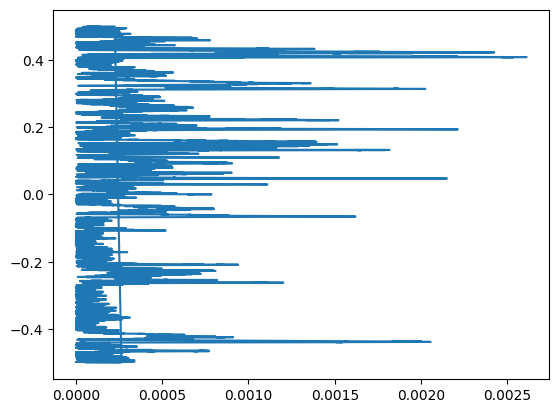

In [ ]:
# buat plot
import matplotlib.pyplot as plt

plt.plot(mydata['FP1-F7'], mydata['frekuensi'])
plt.show()

In [ ]:
# ubah dataframe jadi array numpy
df1 = pd.read_csv('/content/drive/MyDrive/TA/df2.csv')
arr = df1['FP1-F7'].to_numpy()
arr

array([ 2.80341880e-04,  2.50256410e-04,  2.43223443e-04, ...,
       -1.77777778e-05, -2.01221001e-05, -1.26984127e-05])

In [ ]:
print(arr.shape)

(10241,)


In [ ]:
# impulsse respon manual
def h(f1, f2, N):
  n = np.arange(1, N+1)

  f1 = 2 * f1 * (np.sin(2 * n * np.pi * f1) / (2 * n * np.pi * f1))
  f2 = 2 * f2 * (np.sin(2 * n * np.pi * f2) / (2 * n * np.pi * f2))

  window = 0.42 + 0.5 * (np.cos(2* np.pi * n) / (N)) + 0.08 * (np.cos(4 * np.pi * n) / (N))

  return (f2-f1) * window

f1 = 1
f2 = 30
N = 5

tap = h(f1, f2, N)
print(tap)


[-3.63643583e-15 -3.63643583e-15 -4.03672935e-16 -3.63643583e-15
 -1.69677809e-15]


In [ ]:
def h(f1, f2, N):
  n = np.arange(1, N+1)

  f1 = 2 * f1 * (np.sin(2 * n * np.pi * f1) / (2 * n * np.pi * f1))
  f2 = 2 * f2 * (np.sin(2 * n * np.pi * f2) / (2 * n * np.pi * f2))

  window_rectangular = 1
  window_hanning = 0.5 + 0.5 * (np.cos(2 * np.pi * n) / (N+1))
  window_hamming = 0.54 + 0.46 * (np.cos(2 * np.pi * n) / (N+1))
  window_blackman = 0.42 + 0.5 * (np.cos(2 * np.pi * n)/(N) + 0.08 * (np.cos(4 * np.pi * n)))

  return(f2-f1) * window_blackman


f1 = 1
f2 = 30
N = 20

tap = h(f1, f2, N)
tap

array([-3.29043168e-15, -3.29043168e-15, -3.65263756e-16, -3.29043168e-15,
       -1.53533092e-15, -3.65263756e-16,  4.70498507e-16, -3.29043168e-15,
       -2.31537570e-15, -1.53533092e-15, -3.98848311e-15, -3.65263756e-16,
        2.70053724e-15,  4.70498507e-16, -1.46220173e-15, -3.29043168e-15,
       -7.73926922e-16, -2.31537570e-15, -3.69456672e-15, -1.53533092e-15])

In [ ]:
def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]

  return np.array(y[:N])

filter = konvolusi(arr, tap)
filter

array([-9.22445803e-19, -1.74589742e-18, -1.72616047e-18, ...,
        3.86521424e-19,  3.34469290e-19,  3.00003789e-19])

In [ ]:
def fft_manual(x):
  N = len(x)
  if N <= 1:
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp (-2j * np.pi * np.arange(N)/(N))

  return np.concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

filtering = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fft = fft_manual(filtering)
print(fft)

[36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


In [ ]:
# magnitudo manual
mag = np.sqrt(np.imag(fft) ** 2 + np.real(fft) ** 2)
mag

array([36.        , 10.45250372,  5.65685425,  4.3295688 ,  4.        ,
        4.3295688 ,  5.65685425, 10.45250372])

In [ ]:
# confusion matrix
cm = np.array([
    [1, 2],
    [3, 4]
])

cm

array([[1, 2],
       [3, 4]])

In [ ]:
# inisiasi tempat
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

In [ ]:
# akurasi
akurasi = (tp + tn) / (tp + tn + fp + fn)
akurasi


np.float64(0.5)

In [ ]:
# recall positif
recallpositif = tp / (tp + fn)
recallpositif

np.float64(0.5714285714285714)

In [ ]:
# recall negatif
recallnegatif = tn / (tn + fp)
recallnegatif

np.float64(0.3333333333333333)

In [ ]:
# presisi positif
presisipositif = tp / (tp + fp)
presisipositif


np.float64(0.6666666666666666)

In [ ]:
# presisi negatif
presisinegatif = tn / (tn + fn)
presisinegatif

np.float64(0.25)

In [ ]:
# f1 positif
f1positif = (2 * presisipositif * recallpositif) / (presisipositif + recallpositif)
f1positif

np.float64(0.6153846153846153)

In [ ]:
# f1 negatif
f1negatif = (2 * presisinegatif * recallnegatif) / (presisinegatif + recallnegatif)
f1negatif

np.float64(0.28571428571428575)

In [ ]:
# gini index

def gini_index(nilai):
  total = sum(nilai)

  gini = 1
  for c in nilai:
    p = c / total
    gini_index = gini - p ** 2
  return gini_index

left = np.array([4, 9])
print(gini_index(left))


0.5207100591715976


In [ ]:
# buat fungsi gini split
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = sum(g)

    gini = gini_index(g)
    gini_split = gini_split + (size / total) * gini
  return gini_split

left = np.array([3, 4])
right = np.array([5, 3])

print(gini_split([left, right]))


0.7726190476190476


In [ ]:
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = sum(g)

    gini = gini_index(g)
    gini_split = gini_split + (size / total) * gini
  return gini_split

left = np.array([3, 5])
right = np.array([7,1])

print(gini_split([left, right]))

0.796875


# hari 2

In [ ]:
# drive mount

from google.colab import drive
drive.mount ('/content/drive')
%cd /content/drive/MyDrive/TA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


In [ ]:
# install mne

!pip install mne
import mne

In [ ]:
# import pandas numpy
import pandas as pd
import numpy as np

In [ ]:
# import data edf
data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb16_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-2717690890.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8', '-'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
/tmp/ipython-input-2717690890.py:1: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')


<RawEDF | chb16_16.edf, 28 x 921600 (3600.0 s), ~26 KiB, data not loaded>

In [ ]:
# ekstraksi data & channel

data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names

In [ ]:
# jadiin dataframe

df1 = pd.DataFrame(data.T, columns=channel_names)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05


In [ ]:
# tambah kolom times

df1['Times'] = times
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# drop kolom --0, --1 ..

df1 = df1.drop(['--0', '--1', '--2', '--3', '--4'], axis=1)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,2.559219e-05,-5.684982e-05,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,3.145299e-05,-6.114774e-05,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-1.074481e-05,-4.942613e-05,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-4.356532e-05,-5.958486e-05,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# simpen df1

df1.to_csv('df1.csv')

In [ ]:
# potong data

df_potong = df1[(df1['Times'] >=60) & (df1['Times'] <=70)]
df_potong

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
15360,0.000280,1.033455e-04,-6.818071e-05,0.000008,0.000285,0.000005,-1.367521e-06,0.000035,0.000035,-0.000014,...,-0.000023,0.000102,-0.000054,-9.572650e-06,6.857143e-05,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000
15361,0.000250,5.528694e-05,4.708181e-05,-0.000017,0.000305,0.000014,-2.148962e-06,0.000019,0.000042,-0.000015,...,-0.000080,0.000177,-0.000080,-2.676435e-05,-4.669109e-05,0.000038,1.387057e-05,0.000081,-0.000080,60.003906
15362,0.000243,8.810745e-05,1.582418e-05,-0.000015,0.000307,0.000008,4.102564e-06,0.000013,0.000045,-0.000011,...,-0.000100,0.000088,0.000021,-5.177045e-05,-1.543346e-05,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812
15363,0.000246,1.158486e-04,-2.676435e-05,0.000020,0.000284,0.000021,2.442002e-05,0.000024,0.000052,0.000012,...,-0.000118,0.000071,0.000083,-2.715507e-05,2.715507e-05,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719
15364,0.000280,1.263980e-04,-5.411477e-05,0.000005,0.000262,0.000032,3.965812e-05,0.000022,0.000054,0.000026,...,-0.000087,0.000096,0.000026,-1.953602e-07,5.450549e-05,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17916,-0.000127,1.152625e-05,3.711844e-06,-0.000035,-0.000078,-0.000035,7.228327e-06,-0.000039,-0.000014,-0.000021,...,-0.000083,-0.000061,-0.000008,-1.152625e-05,-3.321123e-06,-0.000011,-2.598291e-05,0.000029,-0.000008,69.984375
17917,-0.000103,1.953602e-07,9.768010e-07,-0.000028,-0.000072,-0.000031,4.884005e-06,-0.000031,-0.000003,-0.000019,...,-0.000067,-0.000062,-0.000008,-4.884005e-06,-5.860806e-07,-0.000017,-2.012210e-05,0.000027,-0.000008,69.988281
17918,-0.000092,-6.837607e-06,-3.321123e-06,-0.000023,-0.000069,-0.000027,5.860806e-07,-0.000029,0.000006,-0.000026,...,-0.000068,-0.000042,-0.000029,-8.400488e-06,3.711844e-06,-0.000016,-1.230769e-05,0.000048,-0.000029,69.992188
17919,-0.000129,-5.860806e-07,-9.768010e-07,-0.000022,-0.000091,-0.000025,-9.768010e-07,-0.000033,0.000011,-0.000031,...,-0.000081,-0.000048,-0.000010,-9.572650e-06,1.367521e-06,-0.000008,-2.012210e-05,0.000040,-0.000010,69.996094


In [ ]:
# labelin data

def label_seizure(row):
  if 63 <= row['Times'] < 65:
    return 'kejang'
  else :
    return 'tidak kejang'

df_potong['seizure'] = df_potong.apply(label_seizure, axis=1)
df_potong

/tmp/ipython-input-4238351085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_potong['seizure'] = df_potong.apply(label_seizure, axis=1)


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times,seizure
15360,0.000280,1.033455e-04,-6.818071e-05,0.000008,0.000285,0.000005,-1.367521e-06,0.000035,0.000035,-0.000014,...,0.000102,-0.000054,-9.572650e-06,6.857143e-05,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,tidak kejang
15361,0.000250,5.528694e-05,4.708181e-05,-0.000017,0.000305,0.000014,-2.148962e-06,0.000019,0.000042,-0.000015,...,0.000177,-0.000080,-2.676435e-05,-4.669109e-05,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,tidak kejang
15362,0.000243,8.810745e-05,1.582418e-05,-0.000015,0.000307,0.000008,4.102564e-06,0.000013,0.000045,-0.000011,...,0.000088,0.000021,-5.177045e-05,-1.543346e-05,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,tidak kejang
15363,0.000246,1.158486e-04,-2.676435e-05,0.000020,0.000284,0.000021,2.442002e-05,0.000024,0.000052,0.000012,...,0.000071,0.000083,-2.715507e-05,2.715507e-05,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,tidak kejang
15364,0.000280,1.263980e-04,-5.411477e-05,0.000005,0.000262,0.000032,3.965812e-05,0.000022,0.000054,0.000026,...,0.000096,0.000026,-1.953602e-07,5.450549e-05,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17916,-0.000127,1.152625e-05,3.711844e-06,-0.000035,-0.000078,-0.000035,7.228327e-06,-0.000039,-0.000014,-0.000021,...,-0.000061,-0.000008,-1.152625e-05,-3.321123e-06,-0.000011,-2.598291e-05,0.000029,-0.000008,69.984375,tidak kejang
17917,-0.000103,1.953602e-07,9.768010e-07,-0.000028,-0.000072,-0.000031,4.884005e-06,-0.000031,-0.000003,-0.000019,...,-0.000062,-0.000008,-4.884005e-06,-5.860806e-07,-0.000017,-2.012210e-05,0.000027,-0.000008,69.988281,tidak kejang
17918,-0.000092,-6.837607e-06,-3.321123e-06,-0.000023,-0.000069,-0.000027,5.860806e-07,-0.000029,0.000006,-0.000026,...,-0.000042,-0.000029,-8.400488e-06,3.711844e-06,-0.000016,-1.230769e-05,0.000048,-0.000029,69.992188,tidak kejang
17919,-0.000129,-5.860806e-07,-9.768010e-07,-0.000022,-0.000091,-0.000025,-9.768010e-07,-0.000033,0.000011,-0.000031,...,-0.000048,-0.000010,-9.572650e-06,1.367521e-06,-0.000008,-2.012210e-05,0.000040,-0.000010,69.996094,tidak kejang


In [ ]:
# cek jumlah label
print(df_potong['seizure'].value_counts())

seizure
tidak kejang    2049
kejang           512
Name: count, dtype: int64


In [ ]:
# simpen data yang udah dipotong & dilabel
df_potong.to_csv('df_potong.csv', index=False)

In [ ]:
# import df2

df2 = pd.read_csv('/content/drive/MyDrive/TA/df_potong.csv')
df2

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times,seizure
0,0.000280,1.033455e-04,-6.818071e-05,0.000008,0.000285,0.000005,-1.367521e-06,0.000035,0.000035,-0.000014,...,0.000102,-0.000054,-9.572650e-06,6.857143e-05,-0.000072,5.059829e-05,0.000026,-0.000054,60.000000,tidak kejang
1,0.000250,5.528694e-05,4.708181e-05,-0.000017,0.000305,0.000014,-2.148962e-06,0.000019,0.000042,-0.000015,...,0.000177,-0.000080,-2.676435e-05,-4.669109e-05,0.000038,1.387057e-05,0.000081,-0.000080,60.003906,tidak kejang
2,0.000243,8.810745e-05,1.582418e-05,-0.000015,0.000307,0.000008,4.102564e-06,0.000013,0.000045,-0.000011,...,0.000088,0.000021,-5.177045e-05,-1.543346e-05,0.000025,-1.152625e-05,-0.000001,0.000021,60.007812,tidak kejang
3,0.000246,1.158486e-04,-2.676435e-05,0.000020,0.000284,0.000021,2.442002e-05,0.000024,0.000052,0.000012,...,0.000071,0.000083,-2.715507e-05,2.715507e-05,0.000004,-5.860806e-07,-0.000046,0.000083,60.011719,tidak kejang
4,0.000280,1.263980e-04,-5.411477e-05,0.000005,0.000262,0.000032,3.965812e-05,0.000022,0.000054,0.000026,...,0.000096,0.000026,-1.953602e-07,5.450549e-05,-0.000061,2.090354e-05,-0.000012,0.000026,60.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,-0.000127,1.152625e-05,3.711844e-06,-0.000035,-0.000078,-0.000035,7.228327e-06,-0.000039,-0.000014,-0.000021,...,-0.000061,-0.000008,-1.152625e-05,-3.321123e-06,-0.000011,-2.598291e-05,0.000029,-0.000008,69.984375,tidak kejang
2557,-0.000103,1.953602e-07,9.768010e-07,-0.000028,-0.000072,-0.000031,4.884005e-06,-0.000031,-0.000003,-0.000019,...,-0.000062,-0.000008,-4.884005e-06,-5.860806e-07,-0.000017,-2.012210e-05,0.000027,-0.000008,69.988281,tidak kejang
2558,-0.000092,-6.837607e-06,-3.321123e-06,-0.000023,-0.000069,-0.000027,5.860806e-07,-0.000029,0.000006,-0.000026,...,-0.000042,-0.000029,-8.400488e-06,3.711844e-06,-0.000016,-1.230769e-05,0.000048,-0.000029,69.992188,tidak kejang
2559,-0.000129,-5.860806e-07,-9.768010e-07,-0.000022,-0.000091,-0.000025,-9.768010e-07,-0.000033,0.000011,-0.000031,...,-0.000048,-0.000010,-9.572650e-06,1.367521e-06,-0.000008,-2.012210e-05,0.000040,-0.000010,69.996094,tidak kejang


In [ ]:
# df 3 = hapus kolom time dan seizure

df3 = df2.drop(['Times', 'seizure'], axis=1)
df3

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,P4-O2,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000280,1.033455e-04,-6.818071e-05,0.000008,0.000285,0.000005,-1.367521e-06,0.000035,0.000035,-0.000014,...,0.000033,-0.000023,0.000102,-0.000054,-9.572650e-06,6.857143e-05,-0.000072,5.059829e-05,0.000026,-0.000054
1,0.000250,5.528694e-05,4.708181e-05,-0.000017,0.000305,0.000014,-2.148962e-06,0.000019,0.000042,-0.000015,...,0.000018,-0.000080,0.000177,-0.000080,-2.676435e-05,-4.669109e-05,0.000038,1.387057e-05,0.000081,-0.000080
2,0.000243,8.810745e-05,1.582418e-05,-0.000015,0.000307,0.000008,4.102564e-06,0.000013,0.000045,-0.000011,...,-0.000010,-0.000100,0.000088,0.000021,-5.177045e-05,-1.543346e-05,0.000025,-1.152625e-05,-0.000001,0.000021
3,0.000246,1.158486e-04,-2.676435e-05,0.000020,0.000284,0.000021,2.442002e-05,0.000024,0.000052,0.000012,...,0.000022,-0.000118,0.000071,0.000083,-2.715507e-05,2.715507e-05,0.000004,-5.860806e-07,-0.000046,0.000083
4,0.000280,1.263980e-04,-5.411477e-05,0.000005,0.000262,0.000032,3.965812e-05,0.000022,0.000054,0.000026,...,0.000034,-0.000087,0.000096,0.000026,-1.953602e-07,5.450549e-05,-0.000061,2.090354e-05,-0.000012,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,-0.000127,1.152625e-05,3.711844e-06,-0.000035,-0.000078,-0.000035,7.228327e-06,-0.000039,-0.000014,-0.000021,...,-0.000047,-0.000083,-0.000061,-0.000008,-1.152625e-05,-3.321123e-06,-0.000011,-2.598291e-05,0.000029,-0.000008
2557,-0.000103,1.953602e-07,9.768010e-07,-0.000028,-0.000072,-0.000031,4.884005e-06,-0.000031,-0.000003,-0.000019,...,-0.000039,-0.000067,-0.000062,-0.000008,-4.884005e-06,-5.860806e-07,-0.000017,-2.012210e-05,0.000027,-0.000008
2558,-0.000092,-6.837607e-06,-3.321123e-06,-0.000023,-0.000069,-0.000027,5.860806e-07,-0.000029,0.000006,-0.000026,...,-0.000040,-0.000068,-0.000042,-0.000029,-8.400488e-06,3.711844e-06,-0.000016,-1.230769e-05,0.000048,-0.000029
2559,-0.000129,-5.860806e-07,-9.768010e-07,-0.000022,-0.000091,-0.000025,-9.768010e-07,-0.000033,0.000011,-0.000031,...,-0.000041,-0.000081,-0.000048,-0.000010,-9.572650e-06,1.367521e-06,-0.000008,-2.012210e-05,0.000040,-0.000010


In [ ]:
# buat respon impulse

from scipy.signal import firwin

fs = 256
f1 = 1
f2 = 50
numtaps = 100
nyquist = 256 / 2

normalisasi = [f1 / nyquist, f2 / nyquist]

taps = firwin(numtaps, normalisasi, window='hamming', pass_zero='bandpass')
taps

array([-9.29801504e-04, -4.02346224e-04,  3.71108786e-05, -2.51646285e-04,
       -1.02856654e-03, -1.34093108e-03, -7.03791747e-04,  7.98745710e-05,
       -2.49981274e-04, -1.65153788e-03, -2.46010827e-03, -1.44704635e-03,
        1.71182548e-04, -1.12264327e-04, -2.62300954e-03, -4.40164804e-03,
       -2.82473356e-03,  3.21968213e-04,  4.20294901e-04, -3.71563530e-03,
       -7.22450230e-03, -5.05635709e-03,  5.29318732e-04,  1.68997627e-03,
       -4.58025674e-03, -1.09604377e-02, -8.43521056e-03,  7.76390778e-04,
        4.18760018e-03, -4.70819500e-03, -1.57058028e-02, -1.34823701e-02,
        1.03519244e-03,  8.78312402e-03, -3.27019539e-03, -2.18960539e-02,
       -2.14716076e-02,  1.27168798e-03,  1.76223253e-02,  1.60752640e-03,
       -3.13857125e-02, -3.68202451e-02,  1.45221121e-03,  3.92472299e-02,
        1.77262474e-02, -5.55168654e-02, -8.99173460e-02,  1.54990628e-03,
        1.96296821e-01,  3.58671198e-01,  3.58671198e-01,  1.96296821e-01,
        1.54990628e-03, -

In [ ]:
# konvolusi filtering

from scipy.signal import lfilter

filtering = lfilter(taps, 1, df3)
filtering

array([[-2.60662302e-07, -2.08885339e-07,  3.22175693e-08, ...,
        -3.22508478e-06, -2.00449151e-06, -1.09184328e-07],
       [-2.32688787e-07, -1.52095597e-07, -5.67339894e-08, ...,
        -2.89978784e-06, -1.91333348e-06, -3.86620507e-07],
       [-2.26149523e-07, -1.79782472e-07, -4.11368059e-08, ...,
        -2.91512048e-06, -1.96467290e-06, -4.28620442e-07],
       ...,
       [ 8.55553618e-08,  4.33793649e-08,  2.42432617e-09, ...,
         1.47563678e-06,  8.63347725e-07,  2.62228190e-07],
       [ 1.19704848e-07,  5.23439446e-08, -3.63370409e-09, ...,
         1.79233391e-06,  9.87954445e-07,  1.61166994e-07],
       [ 1.50947995e-07,  6.00508852e-08, -3.76305602e-09, ...,
         2.19910385e-06,  1.17329170e-06,  9.68948563e-08]])

In [ ]:
# fft

fft = np.fft.fft(filtering)
fft

array([[-1.82551342e-05+0.00000000e+00j, -4.55189964e-07-7.11076854e-06j,
         1.47097530e-06-4.17016651e-06j, ...,
         2.48330675e-06+3.51200890e-06j,  1.47097530e-06+4.17016651e-06j,
        -4.55189964e-07+7.11076854e-06j],
       [-1.83582106e-05+0.00000000e+00j, -3.70970634e-07-6.97855063e-06j,
         1.44442905e-06-4.01627685e-06j, ...,
         2.30372014e-06+3.23232960e-06j,  1.44442905e-06+4.01627685e-06j,
        -3.70970634e-07+6.97855063e-06j],
       [-1.80675131e-05+0.00000000e+00j, -4.60429221e-07-6.71225411e-06j,
         1.21114540e-06-3.99995504e-06j, ...,
         2.05104483e-06+3.32919397e-06j,  1.21114540e-06+3.99995504e-06j,
        -4.60429221e-07+6.71225411e-06j],
       ...,
       [ 8.69607120e-06+0.00000000e+00j,  3.44609993e-07+3.97808510e-06j,
        -7.56671276e-07+2.06672708e-06j, ...,
        -1.25916190e-06-1.54770010e-06j, -7.56671276e-07-2.06672708e-06j,
         3.44609993e-07-3.97808510e-06j],
       [ 1.01433771e-05+0.00000000e+00j,  2.

In [ ]:
# ambil kolom frekuensi

fft_freq = np.fft.fftfreq(len(filtering))
fft_freq

array([ 0.        ,  0.00039047,  0.00078094, ..., -0.00117142,
       -0.00078094, -0.00039047])

In [ ]:
# jadiin magnitudo

magnitudo = np.abs(fft)
magnitudo

array([[1.82551342e-05, 7.12532295e-06, 4.42199696e-06, ...,
        4.30128108e-06, 4.42199696e-06, 7.12532295e-06],
       [1.83582106e-05, 6.98840383e-06, 4.26812078e-06, ...,
        3.96926708e-06, 4.26812078e-06, 6.98840383e-06],
       [1.80675131e-05, 6.72802722e-06, 4.17929582e-06, ...,
        3.91028354e-06, 4.17929582e-06, 6.72802722e-06],
       ...,
       [8.69607120e-06, 3.99298348e-06, 2.20088896e-06, ...,
        1.99521034e-06, 2.20088896e-06, 3.99298348e-06],
       [1.01433771e-05, 4.57775612e-06, 2.58198732e-06, ...,
        2.42786172e-06, 2.58198732e-06, 4.57775612e-06],
       [1.21018970e-05, 5.49486913e-06, 3.10363864e-06, ...,
        2.99044968e-06, 3.10363864e-06, 5.49486913e-06]])

In [ ]:
# jadiin dataframe buat df4
df4 = pd.DataFrame(magnitudo)
df4

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000018,0.000007,0.000004,0.000004,0.000007,0.000006,2.422804e-06,1.052086e-06,7.557817e-07,5.260442e-07,...,4.339352e-07,5.260442e-07,7.557817e-07,1.052086e-06,2.422804e-06,0.000006,0.000007,0.000004,0.000004,0.000007
1,0.000018,0.000007,0.000004,0.000004,0.000006,0.000004,1.948356e-06,4.724661e-07,3.441960e-07,2.357120e-07,...,2.302491e-07,2.357120e-07,3.441960e-07,4.724661e-07,1.948356e-06,0.000004,0.000006,0.000004,0.000004,0.000007
2,0.000018,0.000007,0.000004,0.000004,0.000006,0.000005,2.122132e-06,5.706441e-07,2.796233e-07,1.447215e-07,...,3.073189e-07,1.447215e-07,2.796233e-07,5.706441e-07,2.122132e-06,0.000005,0.000006,0.000004,0.000004,0.000007
3,0.000020,0.000008,0.000005,0.000004,0.000006,0.000004,1.946552e-06,4.313367e-07,2.238062e-07,1.102620e-07,...,3.118491e-07,1.102620e-07,2.238062e-07,4.313367e-07,1.946552e-06,0.000004,0.000006,0.000004,0.000005,0.000008
4,0.000021,0.000008,0.000005,0.000005,0.000008,0.000005,2.297013e-06,7.570342e-07,5.918767e-07,2.672514e-07,...,3.117450e-07,2.672514e-07,5.918767e-07,7.570342e-07,2.297013e-06,0.000005,0.000008,0.000005,0.000005,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0.000010,0.000005,0.000003,0.000002,0.000004,0.000003,8.531058e-07,4.201474e-07,1.701159e-07,1.643182e-07,...,4.957112e-08,1.643182e-07,1.701159e-07,4.201474e-07,8.531058e-07,0.000003,0.000004,0.000002,0.000003,0.000005
2557,0.000009,0.000004,0.000002,0.000002,0.000003,0.000002,7.487924e-07,3.800462e-07,1.229312e-07,1.411607e-07,...,4.317714e-08,1.411607e-07,1.229312e-07,3.800462e-07,7.487924e-07,0.000002,0.000003,0.000002,0.000002,0.000004
2558,0.000009,0.000004,0.000002,0.000002,0.000003,0.000002,6.102273e-07,3.601859e-07,1.132286e-07,9.709185e-08,...,4.848335e-08,9.709185e-08,1.132286e-07,3.601859e-07,6.102273e-07,0.000002,0.000003,0.000002,0.000002,0.000004
2559,0.000010,0.000005,0.000003,0.000002,0.000004,0.000003,9.095212e-07,5.508449e-07,1.845552e-07,1.833776e-07,...,1.146256e-07,1.833776e-07,1.845552e-07,5.508449e-07,9.095212e-07,0.000003,0.000004,0.000002,0.000003,0.000005


In [ ]:
# tambahin kolom seizure & times dari df2
df4['Times'] = df2['Times']
df4['seizure'] = df2['seizure']
df4

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times,seizure
0,0.000018,0.000007,0.000004,0.000004,0.000007,0.000006,2.422804e-06,1.052086e-06,7.557817e-07,5.260442e-07,...,7.557817e-07,1.052086e-06,2.422804e-06,0.000006,0.000007,0.000004,0.000004,0.000007,60.000000,tidak kejang
1,0.000018,0.000007,0.000004,0.000004,0.000006,0.000004,1.948356e-06,4.724661e-07,3.441960e-07,2.357120e-07,...,3.441960e-07,4.724661e-07,1.948356e-06,0.000004,0.000006,0.000004,0.000004,0.000007,60.003906,tidak kejang
2,0.000018,0.000007,0.000004,0.000004,0.000006,0.000005,2.122132e-06,5.706441e-07,2.796233e-07,1.447215e-07,...,2.796233e-07,5.706441e-07,2.122132e-06,0.000005,0.000006,0.000004,0.000004,0.000007,60.007812,tidak kejang
3,0.000020,0.000008,0.000005,0.000004,0.000006,0.000004,1.946552e-06,4.313367e-07,2.238062e-07,1.102620e-07,...,2.238062e-07,4.313367e-07,1.946552e-06,0.000004,0.000006,0.000004,0.000005,0.000008,60.011719,tidak kejang
4,0.000021,0.000008,0.000005,0.000005,0.000008,0.000005,2.297013e-06,7.570342e-07,5.918767e-07,2.672514e-07,...,5.918767e-07,7.570342e-07,2.297013e-06,0.000005,0.000008,0.000005,0.000005,0.000008,60.015625,tidak kejang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0.000010,0.000005,0.000003,0.000002,0.000004,0.000003,8.531058e-07,4.201474e-07,1.701159e-07,1.643182e-07,...,1.701159e-07,4.201474e-07,8.531058e-07,0.000003,0.000004,0.000002,0.000003,0.000005,69.984375,tidak kejang
2557,0.000009,0.000004,0.000002,0.000002,0.000003,0.000002,7.487924e-07,3.800462e-07,1.229312e-07,1.411607e-07,...,1.229312e-07,3.800462e-07,7.487924e-07,0.000002,0.000003,0.000002,0.000002,0.000004,69.988281,tidak kejang
2558,0.000009,0.000004,0.000002,0.000002,0.000003,0.000002,6.102273e-07,3.601859e-07,1.132286e-07,9.709185e-08,...,1.132286e-07,3.601859e-07,6.102273e-07,0.000002,0.000003,0.000002,0.000002,0.000004,69.992188,tidak kejang
2559,0.000010,0.000005,0.000003,0.000002,0.000004,0.000003,9.095212e-07,5.508449e-07,1.845552e-07,1.833776e-07,...,1.845552e-07,5.508449e-07,9.095212e-07,0.000003,0.000004,0.000002,0.000003,0.000005,69.996094,tidak kejang


In [ ]:
df4.columns = df2.columns

In [ ]:
# tambahin kolom frekuensi
df4['frekuensi'] = fft_freq
df4

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times,seizure,frekuensi
0,0.000018,0.000007,0.000004,0.000004,0.000007,0.000006,2.422804e-06,1.052086e-06,7.557817e-07,5.260442e-07,...,1.052086e-06,2.422804e-06,0.000006,0.000007,0.000004,0.000004,0.000007,60.000000,tidak kejang,0.000000
1,0.000018,0.000007,0.000004,0.000004,0.000006,0.000004,1.948356e-06,4.724661e-07,3.441960e-07,2.357120e-07,...,4.724661e-07,1.948356e-06,0.000004,0.000006,0.000004,0.000004,0.000007,60.003906,tidak kejang,0.000390
2,0.000018,0.000007,0.000004,0.000004,0.000006,0.000005,2.122132e-06,5.706441e-07,2.796233e-07,1.447215e-07,...,5.706441e-07,2.122132e-06,0.000005,0.000006,0.000004,0.000004,0.000007,60.007812,tidak kejang,0.000781
3,0.000020,0.000008,0.000005,0.000004,0.000006,0.000004,1.946552e-06,4.313367e-07,2.238062e-07,1.102620e-07,...,4.313367e-07,1.946552e-06,0.000004,0.000006,0.000004,0.000005,0.000008,60.011719,tidak kejang,0.001171
4,0.000021,0.000008,0.000005,0.000005,0.000008,0.000005,2.297013e-06,7.570342e-07,5.918767e-07,2.672514e-07,...,7.570342e-07,2.297013e-06,0.000005,0.000008,0.000005,0.000005,0.000008,60.015625,tidak kejang,0.001562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0.000010,0.000005,0.000003,0.000002,0.000004,0.000003,8.531058e-07,4.201474e-07,1.701159e-07,1.643182e-07,...,4.201474e-07,8.531058e-07,0.000003,0.000004,0.000002,0.000003,0.000005,69.984375,tidak kejang,-0.001952
2557,0.000009,0.000004,0.000002,0.000002,0.000003,0.000002,7.487924e-07,3.800462e-07,1.229312e-07,1.411607e-07,...,3.800462e-07,7.487924e-07,0.000002,0.000003,0.000002,0.000002,0.000004,69.988281,tidak kejang,-0.001562
2558,0.000009,0.000004,0.000002,0.000002,0.000003,0.000002,6.102273e-07,3.601859e-07,1.132286e-07,9.709185e-08,...,3.601859e-07,6.102273e-07,0.000002,0.000003,0.000002,0.000002,0.000004,69.992188,tidak kejang,-0.001171
2559,0.000010,0.000005,0.000003,0.000002,0.000004,0.000003,9.095212e-07,5.508449e-07,1.845552e-07,1.833776e-07,...,5.508449e-07,9.095212e-07,0.000003,0.000004,0.000002,0.000003,0.000005,69.996094,tidak kejang,-0.000781


In [ ]:
# simpen df4
df4.to_csv('df4.csv', index=False)

In [ ]:
# buat plot
plt.plot('')

In [ ]:
# import library buat rdf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# import mydata
mydata = pd.read_csv("/content/drive/MyDrive/TA/df4.csv")
mydata

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,seizure,Times,frekuensi
0,0.000018,0.000007,0.000004,0.000004,0.000007,0.000006,2.422804e-06,1.052086e-06,7.557817e-07,5.260442e-07,...,1.052086e-06,2.422804e-06,0.000006,0.000007,0.000004,0.000004,0.000007,tidak kejang,60.000000,0.000000
1,0.000018,0.000007,0.000004,0.000004,0.000006,0.000004,1.948356e-06,4.724661e-07,3.441960e-07,2.357120e-07,...,4.724661e-07,1.948356e-06,0.000004,0.000006,0.000004,0.000004,0.000007,tidak kejang,60.003906,0.000390
2,0.000018,0.000007,0.000004,0.000004,0.000006,0.000005,2.122132e-06,5.706441e-07,2.796233e-07,1.447215e-07,...,5.706441e-07,2.122132e-06,0.000005,0.000006,0.000004,0.000004,0.000007,tidak kejang,60.007812,0.000781
3,0.000020,0.000008,0.000005,0.000004,0.000006,0.000004,1.946552e-06,4.313367e-07,2.238062e-07,1.102620e-07,...,4.313367e-07,1.946552e-06,0.000004,0.000006,0.000004,0.000005,0.000008,tidak kejang,60.011719,0.001171
4,0.000021,0.000008,0.000005,0.000005,0.000008,0.000005,2.297013e-06,7.570342e-07,5.918767e-07,2.672514e-07,...,7.570342e-07,2.297013e-06,0.000005,0.000008,0.000005,0.000005,0.000008,tidak kejang,60.015625,0.001562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0.000010,0.000005,0.000003,0.000002,0.000004,0.000003,8.531058e-07,4.201474e-07,1.701159e-07,1.643182e-07,...,4.201474e-07,8.531058e-07,0.000003,0.000004,0.000002,0.000003,0.000005,tidak kejang,69.984375,-0.001952
2557,0.000009,0.000004,0.000002,0.000002,0.000003,0.000002,7.487924e-07,3.800462e-07,1.229312e-07,1.411607e-07,...,3.800462e-07,7.487924e-07,0.000002,0.000003,0.000002,0.000002,0.000004,tidak kejang,69.988281,-0.001562
2558,0.000009,0.000004,0.000002,0.000002,0.000003,0.000002,6.102273e-07,3.601859e-07,1.132286e-07,9.709185e-08,...,3.601859e-07,6.102273e-07,0.000002,0.000003,0.000002,0.000002,0.000004,tidak kejang,69.992188,-0.001171
2559,0.000010,0.000005,0.000003,0.000002,0.000004,0.000003,9.095212e-07,5.508449e-07,1.845552e-07,1.833776e-07,...,5.508449e-07,9.095212e-07,0.000003,0.000004,0.000002,0.000003,0.000005,tidak kejang,69.996094,-0.000781


In [ ]:
# bagi data x dan y
X = mydata.drop(['Times', 'frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
# bagi data train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape

(2048, 23)

In [ ]:
X_test.shape

(513, 23)

In [ ]:
# inisiasi skf & rf & param grid

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators' : [10, 20, 30],
    'max_depth' : [10, 20, 30]
}

In [ ]:
# lakukan pencarian grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid = param_grid,
    cv = skf,
    scoring = 'accuracy',
    n_jobs = -1
)

In [ ]:
# fit grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [ ]:
# liat best_params_

best_params = grid_search.best_params_
best_params

{'max_depth': 20, 'n_estimators': 30}

In [ ]:
# latih ulang data latih pake best param
best_model = RandomForestClassifier(**best_params, random_state=42)

best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=30, random_state=42)

In [ ]:
# klasifikasi report data train

from sklearn.metrics import classification_report

y_train_pred = best_model.predict(X_train)

print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


              precision    recall  f1-score   support

      kejang     1.0000    1.0000    1.0000       409
tidak kejang     1.0000    1.0000    1.0000      1639

    accuracy                         1.0000      2048
   macro avg     1.0000    1.0000    1.0000      2048
weighted avg     1.0000    1.0000    1.0000      2048



In [ ]:
# confusion matrix data latih

cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[ 409,    0],
       [   0, 1639]])

In [ ]:
# classification report data test
y_test_pred = best_model.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      kejang       0.89      0.61      0.72       103
tidak kejang       0.91      0.98      0.94       410

    accuracy                           0.91       513
   macro avg       0.90      0.80      0.83       513
weighted avg       0.91      0.91      0.90       513



In [ ]:
# cm test
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test

array([[ 63,  40],
       [  8, 402]])

<function matplotlib.pyplot.show(close=None, block=None)>

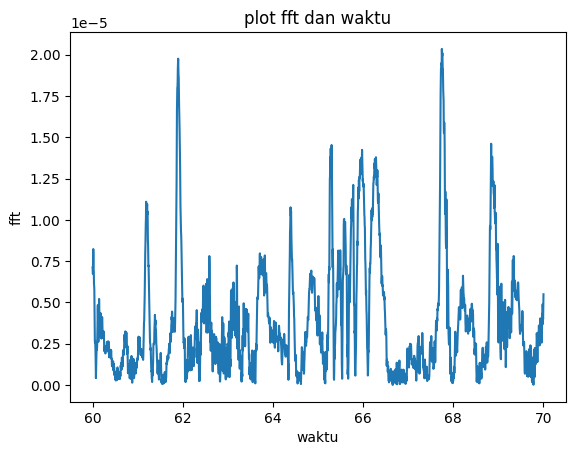

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mydata['Times'], mydata['1'])
plt.xlabel('waktu')
plt.ylabel('fft')
plt.title('plot fft dan waktu')
plt.show

In [ ]:
# ubah dataframe jadi array numpy

arr = mydata['1'].to_numpy()
arr

array([7.12532295e-06, 6.98840383e-06, 6.72802722e-06, ...,
       3.99298348e-06, 4.57775612e-06, 5.49486913e-06])

In [ ]:
print(arr.shape)

(2561,)


In [ ]:
# fft manual

def fft_manual(x):
  N = len(x)
  if N <= 1:
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp (-2j * np.pi * np.arange(N) / N)

  return np.concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fft_hasil = fft_manual(arr)
fft_hasil

array([36.+0.j        , -4.+9.65685425j, -4.+4.j        , -4.+1.65685425j,
       -4.+0.j        , -4.-1.65685425j, -4.-4.j        , -4.-9.65685425j])

In [ ]:
# impulsse respon manual

def h(f1, f2, N):
  n = np.arange(1, N+1)

  f1 = 2 * f1 * (np.sin(n * 2 * np.pi * f1) / (n * 2 * np.pi * f1))
  f2 = 2 * f2 * (np.sin(n * 2 * np.pi * f2) / (n * 2 * np.pi * f1))

  window = 0.5 + 0.5 * (np.cos(2 * np.pi * n) / (N+1))

  return (f2-f1) * window

f1 = 0.098
f2 = 0.123
N = 10

tap = h(f1, f2, N)
print(tap)

[-0.01918126 -0.0107382  -0.00454035 -0.02187513 -0.7087841   0.14258388
  0.07870719  0.02809958 -0.04884264 -0.52890315]


In [ ]:
# rumus windowing
window_hamming = 0.54 + 0.46 * (np.cos(2 * np.pi * n)/(N+1))

window_rectangular = 1

window_blackman = 0.42 + 0.5 * (np.cos(2 * np.pi * n)/(N)) + 0.08 * (np.cos(4 * np.pi * n)/(N))

In [ ]:
# konvolusi manual
def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]

  return np.array(y[:N])

In [ ]:
def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] = x[k] * h[n-k]

  return np.array(x[:N])

In [ ]:
# magnitudo manual
magnitudo = np.sqrt(np.imag(filtering) ** 2 + np.real(filtering) ** 2)
magnitudo

array([2., 3., 4.])

In [ ]:
def fft_manual(x):
  N = len(x)
  if N <= 1:
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp (-2j * np.pi * np.arange(N)/(N))

  return np.concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

print(fft_manual(filtering))

In [ ]:
# confusion matrix

cm = np.array([
    [1, 2],
    [3, 4]
])
cm

array([[1, 2],
       [3, 4]])

In [ ]:
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

In [ ]:
# akurasi
akurasi = (tp + tn) / (tp + tn + fp + fn)
akurasi

np.float64(0.5)

In [ ]:
# recall
recall_positif = tp / (tp + fn)
recall_positif

np.float64(0.5714285714285714)

In [ ]:
# presisi
presisi_positif = tp / (tp + fp)
presisi_positif

np.float64(0.6666666666666666)

In [ ]:
f1 = 2 * recall_positif * presisi_positif / recall_positif + presisi_positif

In [ ]:
# gini index

def gini_index(nilai):
  total = sum(nilai)

  gini = 1
  for c in nilai:
    p = c / total
    gini_index = gini - p ** 2
  return gini_index

left = np.array([4, 5])
print(gini_index(left))

0.691358024691358


In [ ]:
# buat fungsi gini split
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = sum(g)

    gini = gini_index(g)
    gini_split = gini_split + (size / total) * gini

  return gini_split

left = np.array([2, 4])
right = np.array([6,4])

print(gini_split([left, right]))

In [ ]:
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = len(grup)

    gini = gini_index(g)
    gini_split = gini_split + (size/ total) * gini

  return gini_split

left = np.array([1, 2])
right = np.array([3, 4])

print(gini_split([left, right]))

0.24580498866213157


# HARI 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


### import edf

In [ ]:
! pip install mne
import mne

In [ ]:
# import data edf
data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb16_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-3748411429.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8', '-'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
/tmp/ipython-input-3748411429.py:2: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')


<RawEDF | chb16_16.edf, 28 x 921600 (3600.0 s), ~26 KiB, data not loaded>

In [ ]:
# ekstrak data dan waktu
data, times = data1.get_data(return_times=True)
data

array([[-2.80732601e-04,  1.95360195e-07,  5.86080586e-07, ...,
        -1.58241758e-05, -1.73870574e-05, -4.49328449e-06],
       [-2.55921856e-05,  1.95360195e-07,  1.95360195e-07, ...,
        -4.63003663e-05, -3.84859585e-05, -3.34065934e-05],
       [ 6.73992674e-05,  1.95360195e-07,  1.95360195e-07, ...,
        -7.61904762e-06,  9.96336996e-06,  1.15262515e-05],
       ...,
       [ 2.70573871e-04,  1.95360195e-07,  1.95360195e-07, ...,
        -6.30427350e-04, -6.27692308e-04, -6.30036630e-04],
       [-1.36752137e-06,  1.95360195e-07,  5.86080586e-07, ...,
         2.32478632e-05,  1.11355311e-05,  1.73870574e-05],
       [-1.02173382e-04,  1.95360195e-07,  1.95360195e-07, ...,
         5.27472527e-06,  2.36385836e-05,  3.71184371e-06]])

In [ ]:
# ekstrak channel
channel_names = data1.ch_names
channel_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 '--0',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 '--1',
 'FZ-CZ',
 'CZ-PZ',
 '--2',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 '--3',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 '--4',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [ ]:
# jadikan dataframe
import pandas as pd
df1 = pd.DataFrame(data.T, columns=channel_names)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05


In [ ]:
# tambahkan kolom times
df1['Times'] = times
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


### hapus kolom

In [ ]:
# hapus kolom
df1 = df1.drop(['--0', '--1', '--2', '--3', '--4'], axis=1)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,2.559219e-05,-5.684982e-05,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,3.145299e-05,-6.114774e-05,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-1.074481e-05,-4.942613e-05,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-4.356532e-05,-5.958486e-05,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# tampilkan head pake nama variabel baru
df_head = df1.head(5)
df_head

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625


In [ ]:
# tampilkan head langsung print
print(df1.head(5))

         FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
0 -2.807326e-04 -2.559219e-05  6.739927e-05  3.770452e-05 -2.795604e-04   
1  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
2  5.860806e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07   
3  1.758242e-06  1.953602e-07  1.953602e-07 -1.953602e-07  1.367521e-06   
4 -9.768010e-07  1.953602e-07  1.953602e-07  1.367521e-06 -5.860806e-07   

          F3-C3         C3-P3         P3-O1         FZ-CZ         CZ-PZ  ...  \
0  2.598291e-05  7.990232e-05 -2.754579e-05  2.676435e-05 -5.489621e-05  ...   
1  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  ...   
2  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  ...   
3  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  1.953602e-07  ...   
4  1.953602e-07  5.860806e-07  5.860806e-07  1.953602e-07  1.953602e-07  ...   

         FP2-F8         F8-T8       T8-P8-0         P8-O2         P7

In [ ]:
# tampilkan tail pake variabel bari
df_tail = df1.tail(5)
df_tail

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
921595,0.000010,0.000024,-0.000029,-0.000021,-0.000011,9.768010e-07,-4.884005e-06,-1.953602e-07,0.000026,-0.000057,...,-0.000033,-0.000003,0.000019,-0.000016,0.000029,0.000593,-0.000698,0.000026,0.000019,3599.980469
921596,-0.000002,-0.000004,-0.000034,0.000013,-0.000012,-6.056166e-06,-8.009768e-06,1.953602e-07,0.000031,-0.000061,...,-0.000049,0.000012,-0.000009,-0.000004,0.000034,0.000607,-0.000674,0.000045,-0.000009,3599.984375
921597,-0.000016,-0.000046,-0.000008,0.000076,-0.000015,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000011,-0.000049,...,-0.000055,-0.000001,0.000005,0.000007,0.000008,0.000637,-0.000630,0.000023,0.000005,3599.988281
921598,-0.000017,-0.000038,0.000010,0.000076,0.000008,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000044,-0.000060,...,-0.000072,-0.000017,0.000024,0.000029,-0.000010,0.000625,-0.000628,0.000011,0.000024,3599.992188
921599,-0.000004,-0.000033,0.000012,0.000088,0.000056,-5.059829e-05,7.228327e-06,4.981685e-05,-0.000069,-0.000058,...,-0.000078,-0.000010,0.000004,0.000058,-0.000011,0.000619,-0.000630,0.000017,0.000004,3599.996094


In [ ]:
# tampilkan tail langsung print
print(df1.tail(5))

          FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3         F3-C3  \
921595  0.000010  0.000024 -0.000029 -0.000021 -0.000011  9.768010e-07   
921596 -0.000002 -0.000004 -0.000034  0.000013 -0.000012 -6.056166e-06   
921597 -0.000016 -0.000046 -0.000008  0.000076 -0.000015 -1.934066e-05   
921598 -0.000017 -0.000038  0.000010  0.000076  0.000008 -3.614164e-05   
921599 -0.000004 -0.000033  0.000012  0.000088  0.000056 -5.059829e-05   

               C3-P3         P3-O1     FZ-CZ     CZ-PZ  ...    FP2-F8  \
921595 -4.884005e-06 -1.953602e-07  0.000026 -0.000057  ... -0.000033   
921596 -8.009768e-06  1.953602e-07  0.000031 -0.000061  ... -0.000049   
921597  1.953602e-07  4.043956e-05 -0.000011 -0.000049  ... -0.000055   
921598  7.619048e-06  4.981685e-05 -0.000044 -0.000060  ... -0.000072   
921599  7.228327e-06  4.981685e-05 -0.000069 -0.000058  ... -0.000078   

           F8-T8   T8-P8-0     P8-O2     P7-T7    T7-FT9  FT9-FT10   FT10-T8  \
921595 -0.000003  0.000019 -0.000016

In [ ]:
# cek nilai kosong
print(df1.isnull().sum())

FP1-F7      0
F7-T7       0
T7-P7       0
P7-O1       0
FP1-F3      0
F3-C3       0
C3-P3       0
P3-O1       0
FZ-CZ       0
CZ-PZ       0
FP2-F4      0
F4-C4       0
C4-P4       0
P4-O2       0
FP2-F8      0
F8-T8       0
T8-P8-0     0
P8-O2       0
P7-T7       0
T7-FT9      0
FT9-FT10    0
FT10-T8     0
T8-P8-1     0
Times       0
dtype: int64


In [ ]:
# simpan data
df1.to_csv('df1.csv')

### filtering package

In [ ]:
# membuat filter dengan window
from scipy.signal import firwin

fs = 256
f1 = 1
f2 = 30
numtaps = 20
nyquist = fs/2

normalisasi = [f1/nyquist, f2/nyquist]
taps = firwin(numtaps, normalisasi, window='hamming', pass_zero='bandpass')
taps

array([ 0.00124001, -0.00099752, -0.0071835 , -0.01789498, -0.02500003,
       -0.0125987 ,  0.03244951,  0.10723229,  0.18812764,  0.24101041,
        0.24101041,  0.18812764,  0.10723229,  0.03244951, -0.0125987 ,
       -0.02500003, -0.01789498, -0.0071835 , -0.00099752,  0.00124001])

In [ ]:
# konvolusi filtering
from scipy.signal import lfilter

filtering = lfilter(taps, 1, df1)
filtering

array([[-3.48112558e-07,  2.48302807e-07,  2.12574732e-06, ...,
        -8.57416160e-05, -9.69543287e-05, -1.04621889e-04],
       [ 2.42249519e-10,  4.73730440e-11, -1.35599677e-09, ...,
         1.97854991e-07,  1.97854991e-07,  5.04142025e-06],
       [ 7.26748556e-10, -3.42379905e-10, -4.16273639e-09, ...,
         1.98339490e-07,  1.97465238e-07,  9.88242102e-06],
       ...,
       [-1.96222110e-08, -4.16281415e-08,  1.50410948e-07, ...,
        -2.21630250e-05, -2.19336091e-05,  4.46402139e+00],
       [-2.15602071e-08, -3.03791489e-08,  1.75645304e-07, ...,
        -2.77347852e-05, -2.44749852e-05,  4.46402645e+00],
       [-5.57173893e-09, -3.69425088e-08,  7.98941044e-08, ...,
        -2.78763669e-05, -2.78109489e-05,  4.46402597e+00]])

### fft package

In [ ]:
fft_numpy = np.fft.fft(filtering)
fft_numpy

array([[-8.69301592e-04+0.00000000e+00j,  4.70102393e-05-1.80434827e-04j,
        -1.45391698e-04-4.60236496e-04j, ...,
         6.69317837e-05+8.69410953e-05j, -1.45391698e-04+4.60236496e-04j,
         4.70102393e-05+1.80434827e-04j],
       [ 7.71246264e-06+0.00000000e+00j,  4.03539402e-06+2.54923913e-06j,
         4.42873211e-06+2.79098507e-06j, ...,
         3.24263412e-06-3.58039371e-06j,  4.42873211e-06-2.79098507e-06j,
         4.03539402e-06-2.54923913e-06j],
       [ 1.29492681e-05+0.00000000e+00j,  8.39265986e-06+3.55771626e-06j,
         8.71019639e-06+5.54464147e-06j, ...,
         6.73445056e-06-6.83673857e-06j,  8.71019639e-06-5.54464147e-06j,
         8.39265986e-06-3.55771626e-06j],
       ...,
       [ 4.46389800e+00+0.00000000e+00j,  4.31186959e+00+1.15531608e+00j,
         3.86601222e+00+2.23189433e+00j, ...,
         3.15656305e+00-3.15657587e+00j,  3.86601222e+00-2.23189433e+00j,
         4.31186959e+00-1.15531608e+00j],
       [ 4.46389583e+00+0.00000000e+00j,  4.

In [ ]:
magnitudo = np.abs(fft_numpy)
magnitudo

array([[8.69301592e-04, 1.86458278e-04, 4.82655548e-04, ...,
        1.09720635e-04, 4.82655548e-04, 1.86458278e-04],
       [7.71246264e-06, 4.77315672e-06, 5.23481287e-06, ...,
        4.83051707e-06, 5.23481287e-06, 4.77315672e-06],
       [1.29492681e-05, 9.11559568e-06, 1.03252395e-05, ...,
        9.59655243e-06, 1.03252395e-05, 9.11559568e-06],
       ...,
       [4.46389800e+00, 4.46396400e+00, 4.46401196e+00, ...,
        4.46406334e+00, 4.46401196e+00, 4.46396400e+00],
       [4.46389583e+00, 4.46391233e+00, 4.46406409e+00, ...,
        4.46407249e+00, 4.46406409e+00, 4.46391233e+00],
       [4.46395808e+00, 4.46385393e+00, 4.46409851e+00, ...,
        4.46405216e+00, 4.46409851e+00, 4.46385393e+00]])

### filtering manual

In [ ]:
def h(f1, f2, N):
  n = np.arange(1, N+1)

  f1 = 2 * f1 * (np.sin(n * 2 * np.pi * f1) / (n * 2 * np.pi * f1))
  f2 = 2 * f2 * (np.sin(n * 2 * np.pi * f2) / (n * 2 * np.pi * f2))

  window = 0.5 + 0.5 * (np.cos(2 * np.pi * n) / (N+1))

  return (f2-f1) * window

f1 = 0.098
f2 = 0.123
N = 10

tap = h(f1, f2, N)
print(tap)

[ 0.02093774  0.00492168 -0.01324009 -0.0250646  -0.02514425 -0.01365793
  0.00381324  0.01903145  0.0250427   0.01940153]


In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
def konvolusi(x, h):
  N = len(x) # panjang langkah pangeran
  M = len(h) # panjang ayunan kipas putri

  panjang = N + M -1 # buku musik yang disiapkan untuk menulis hasil tarian
  y = [0] * panjang # awalnya semua buku musik kosong

  for n in range(panjang): # setiap halaman musik harus diisi hasil tarian
    for k in range(N): # pangeran mencoba menari di setiap langkahnya
      if 0 <= n-k < M: # saat hentakan pangeran cocok dengan ayunan putri barulah nada tercipta
        y[n] += x[k] * h[n-k] # lahirlah bunyi baru yang ditulis di buku musik

  return np.array(y[:N]) # panjangnya sesuai dengan langkah pangeran


filtering = konvolusi(x, tap)
print(filtering)


[ 0.02093774  0.04679715  0.05941648  0.0469712   0.00938167 -0.04186579
 -0.08930001 -0.11770277]


In [ ]:
def konvolusi(x, h):
  N = len(x)
  M = len(h)

  panjang = N + M - 1
  y = [0] * panjang

  for n in range(panjang):
    for k in range(N):
      if 0 <= n-k < M:
        y[n] += x[k] * h[n-k]

  return np.array(y[:N])


filtering = konvolusi(x, tap)
filtering

array([ 0.02093774,  0.04679715,  0.05941648,  0.0469712 ,  0.00938167,
       -0.04186579, -0.08930001, -0.11770277])

### fft manual

In [ ]:
def fft_manual(x):
  N = len(x)
  if N <= 1:
    return x

  even = fft_manual(x[0::2])
  odd = fft_manual(x[1::2])

  faktor = np.exp (-2j * np.pi * np.arange(N)/N)

  return np.concatenate([
      even + faktor[:N // 2] * odd,
      even - faktor[:N // 2] * odd
  ])

fft_manual = fft_manual(filtering)
print(fft_manual)

[-0.06536432+0.j         -0.04219185-0.32785274j  0.06020294-0.07566294j
  0.06530398-0.03041976j  0.06623609+0.j          0.06530398+0.03041976j
  0.06020294+0.07566294j -0.04219185+0.32785274j]


### magnitudo manual

In [ ]:
magnitudo = np.sqrt(np.imag(fft_manual)**2 + np.real(fft_manual)**2)
magnitudo

array([0.06536432, 0.33055645, 0.09669164, 0.07204146, 0.06623609,
       0.07204146, 0.09669164, 0.33055645])

### gini index

In [ ]:
def gini_index(nilai):
  total = sum(nilai)

  gini = 1
  for c in nilai:
    p = c / total
    gini = gini - p ** 2

  return gini

left = np.array([4,9])
print(gini_index(left))

In [ ]:
def gini_index(nilai):
  total = sum(nilai)

  gini = 1
  for c in nilai:
    p = c / total
    gini = gini - p ** 2
  return gini

0.46875


### gini split

In [ ]:
# buat fungsi gini split
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = sum(g)

    gini = gini_index(g)
    gini_split = gini_split + (size / total) * gini

  return gini_split

left = np.array([2, 4])
right = np.array([6,4])

print(gini_split([left, right]))

In [ ]:
def gini_split(grup):
  total = sum(sum(grup))

  gini_split = 0
  for g in grup:
    size = sum(g)

    gini = gini_index(g)
    gini_split = gini_split + (size / total) * gini

  return gini_split

left = np.array([2, 9])
right = np.array([5, 2])

print(gini_split([left, right]))

0.3405483405483405


### cari mean, max, min, stdv, energi package

In [ ]:
print("Mean :", df["Umur"].mean())
print("Max  :", df["Umur"].max())
print("Min  :", df["Umur"].min())
print("Std  :", df["Umur"].std())


### cari mean, max, min, stdv, energi manual

In [ ]:
def cari_mean(x):
  total = 0
  for nilai in x:
    total = total + nilai
  return total / len(x)

print(cari_mean(magnitudo))

0.14127244040544817


In [ ]:
def cari_mean(x):
  total = 0
  for nilai in x:
    total = total + nilai
  return total / len(x)

0.14127244040544817


In [ ]:
def cari_max(x):
  maksimum = x[0]
  for nilai in x:
    if nilai > maksimum:
      maksimum = nilai
  return maksimum

print(cari_max(mag))

In [ ]:
def cari_max(x):
  maksimum = x[0]
  for nilai in x:
    if nilai > maksimum:
      maksimum = nilai
  return maksimum

In [ ]:
def cari_max(x):
  maksimum = x[0]
  for nilai in x:
    if nilai > maksimum:
      maksimum = nilai
  return maksimum

In [ ]:
def cari_min(x):
  minimum = x[0]
  for nilai in x:
    if nilai < minimum:
      minimum = nilai
  return minimum

print(cari_min(mag))

In [ ]:
def cari_min(x):
  minimum = x[0]
  for nilai in x:
    if nilai < minimum:
      minimum = nilai
  return minimum

In [ ]:
def cari_energi(x):
  total = 0
  for nilai in x:
    total = total + np.abs(nilai) ** 2
  return total

print(cari_energi(mag))

In [ ]:
def cari_energi(x):
  total = 0
  for nilai in x:
    total = total + np.abs(nilai) ** 2
  return total

### confusion matrix manual

In [ ]:
cm = np.array([
    [1, 2],
    [3, 4]
])
cm

array([[1, 2],
       [3, 4]])

In [ ]:
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

In [ ]:
total = tp + tn + fp + fn
akurasi = (tp + tn) / total
akurasi

np.float64(0.5)

In [ ]:
recall_positif = tp / (tp + fn)
recall_positif

np.float64(0.5714285714285714)

In [ ]:
recall_negatif = tn / (tn + fp)
recall_negatif

np.float64(0.3333333333333333)

In [ ]:
presisi_positif = tp / (tp + fp)
presisi_positif

np.float64(0.6666666666666666)

In [ ]:
presisi_negatif = tn / (tn + fn)
presisi_negatif

np.float64(0.25)

In [ ]:
f1_positif = (2 * presisi_positif * recall_positif) / (presisi_positif * recall_positif)
f1_positif

np.float64(2.0)

In [ ]:
f1_negatif = (2 * presisi_negatif * recall_negatif) / (presisi_negatif * recall_negatif)
f1_negatif

np.float64(2.0)

### gridsearch cv & random forest

## pandas

### pake data asli aku

In [ ]:
# import data
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/TA/chb16_16.csv')
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000759,0.000068,0.000240,0.000172,0.001114,0.000437,0.000072,0.000371,0.001558,0.000496,...,0.001002,0.001755,0.000117,0.000239,0.000267,0.000331,0.002075,0.000271,kejang,0.000000
1,0.000780,0.000078,0.000262,0.000178,0.001139,0.000473,0.000152,0.000375,0.001592,0.000505,...,0.001009,0.001789,0.000172,0.000260,0.000267,0.000447,0.002100,0.000291,kejang,0.166667
2,0.000862,0.000117,0.000322,0.000197,0.001220,0.000581,0.000295,0.000390,0.001714,0.000535,...,0.001031,0.001899,0.000294,0.000321,0.000272,0.000731,0.002181,0.000352,kejang,0.333333
3,0.001040,0.000214,0.000423,0.000234,0.001337,0.000771,0.000494,0.000420,0.001961,0.000588,...,0.001070,0.002129,0.000478,0.000422,0.000309,0.001192,0.002337,0.000464,kejang,0.500000
4,0.001808,0.000431,0.000981,0.000622,0.002003,0.001396,0.001006,0.000511,0.002896,0.000881,...,0.000959,0.003096,0.001038,0.000981,0.000420,0.002118,0.002624,0.001064,kejang,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.166667
1532,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000037,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.333333
1533,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.500000
1534,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000036,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.666667


In [ ]:
# head
print(df1.head(4))

     FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0  0.000759  0.000068  0.000240  0.000172  0.001114  0.000437  0.000072   
1  0.000780  0.000078  0.000262  0.000178  0.001139  0.000473  0.000152   
2  0.000862  0.000117  0.000322  0.000197  0.001220  0.000581  0.000295   
3  0.001040  0.000214  0.000423  0.000234  0.001337  0.000771  0.000494   

      P3-O1    FP2-F4     F4-C4  ...     P8-O2     FZ-CZ     CZ-PZ     P7-T7  \
0  0.000371  0.001558  0.000496  ...  0.001002  0.001755  0.000117  0.000239   
1  0.000375  0.001592  0.000505  ...  0.001009  0.001789  0.000172  0.000260   
2  0.000390  0.001714  0.000535  ...  0.001031  0.001899  0.000294  0.000321   
3  0.000420  0.001961  0.000588  ...  0.001070  0.002129  0.000478  0.000422   

     T7-FT9  FT9-FT10   FT10-T8   T8-P8-1  seizure  frekuensi  
0  0.000267  0.000331  0.002075  0.000271   kejang   0.000000  
1  0.000267  0.000447  0.002100  0.000291   kejang   0.166667  
2  0.000272  0.000731  0.002181

In [ ]:
# tail
print(df1.tail(4))

        FP1-F7    F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
1532  0.000052  0.00002  0.000029  0.000018  0.000020  0.000053  0.000019   
1533  0.000070  0.00003  0.000027  0.000005  0.000059  0.000005  0.000006   
1534  0.000052  0.00002  0.000029  0.000018  0.000020  0.000053  0.000019   
1535  0.000070  0.00003  0.000027  0.000005  0.000059  0.000005  0.000006   

         P3-O1    FP2-F4     F4-C4  ...     P8-O2     FZ-CZ     CZ-PZ  \
1532  0.000037  0.000025  0.000012  ...  0.000048  0.000055  0.000006   
1533  0.000019  0.000007  0.000026  ...  0.000061  0.000009  0.000005   
1534  0.000036  0.000025  0.000012  ...  0.000048  0.000055  0.000006   
1535  0.000019  0.000007  0.000026  ...  0.000061  0.000009  0.000005   

         P7-T7    T7-FT9  FT9-FT10   FT10-T8   T8-P8-1       seizure  \
1532  0.000029  0.000004  0.000021  0.000007  0.000058  tidak kejang   
1533  0.000027  0.000039  0.000073  0.000008  0.000015  tidak kejang   
1534  0.000029  0.000004  0.0000

In [ ]:
# pilih baris
print(df1.iloc[0:3,])

     FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0  0.000759  0.000068  0.000240  0.000172  0.001114  0.000437  0.000072   
1  0.000780  0.000078  0.000262  0.000178  0.001139  0.000473  0.000152   
2  0.000862  0.000117  0.000322  0.000197  0.001220  0.000581  0.000295   

      P3-O1    FP2-F4     F4-C4  ...     P8-O2     FZ-CZ     CZ-PZ     P7-T7  \
0  0.000371  0.001558  0.000496  ...  0.001002  0.001755  0.000117  0.000239   
1  0.000375  0.001592  0.000505  ...  0.001009  0.001789  0.000172  0.000260   
2  0.000390  0.001714  0.000535  ...  0.001031  0.001899  0.000294  0.000321   

     T7-FT9  FT9-FT10   FT10-T8   T8-P8-1  seizure  frekuensi  
0  0.000267  0.000331  0.002075  0.000271   kejang   0.000000  
1  0.000267  0.000447  0.002100  0.000291   kejang   0.166667  
2  0.000272  0.000731  0.002181  0.000352   kejang   0.333333  

[3 rows x 25 columns]


In [ ]:
# pilih kolom
print(df1.iloc[:, 4:7])

        FP1-F3     F3-C3     C3-P3
0     0.001114  0.000437  0.000072
1     0.001139  0.000473  0.000152
2     0.001220  0.000581  0.000295
3     0.001337  0.000771  0.000494
4     0.002003  0.001396  0.001006
...        ...       ...       ...
1531  0.000059  0.000005  0.000006
1532  0.000020  0.000053  0.000019
1533  0.000059  0.000005  0.000006
1534  0.000020  0.000053  0.000019
1535  0.000059  0.000005  0.000006

[1536 rows x 3 columns]


In [ ]:
# pilih baris/kolom berdasarkan kondisi
print(df1[df1['FP1-F3']> 0.01])

       FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
6    0.024762  0.013314  0.007204  0.005731  0.017027  0.007717  0.004629   
7    0.036179  0.014743  0.004856  0.008039  0.021556  0.008025  0.004769   
8    0.005513  0.019446  0.004774  0.008509  0.014244  0.016013  0.009379   
9    0.023494  0.019934  0.006523  0.001262  0.033099  0.014557  0.003564   
12   0.014646  0.007823  0.005839  0.003500  0.018068  0.014082  0.004133   
15   0.011500  0.005106  0.001294  0.006077  0.023796  0.004486  0.004856   
17   0.004407  0.006227  0.001359  0.003861  0.016926  0.006698  0.003579   
18   0.008029  0.002128  0.006176  0.003159  0.015526  0.006511  0.002262   
775  0.022867  0.007280  0.000620  0.003603  0.024422  0.009049  0.004697   
776  0.032466  0.005436  0.004018  0.003050  0.034961  0.001825  0.001885   
777  0.031711  0.003922  0.001755  0.000224  0.026854  0.009090  0.005521   
778  0.029541  0.006160  0.006751  0.001092  0.026623  0.006493  0.003054   

In [ ]:
# simpan dataset
df1.to_csv('df1.csv')

### buat data pandas

In [ ]:
# buat dataset
df = pd.DataFrame({
    'nama' : ['arsy', 'dede', 'lijak', 'nadila'],
    'umur' : [22, 23, 21, 22],
    'bb' : [71, 50, 61, 49]
})

print(df)

     nama  umur  bb
0    arsy    22  71
1    dede    23  50
2   lijak    21  61
3  nadila    22  49


In [ ]:
# tambahin kolom baru
df['pacar'] = ['yes', 'no', 'no', 'yes']
df

,nama,umur,bb,pacar
0,arsy,22,71,yes
1,dede,23,50,no
2,lijak,21,61,no
3,nadila,22,49,yes


In [ ]:
# hapus kolom
df = df.drop("pacar", axis=1)
print(df)

     nama  umur  bb
0    arsy    22  71
1    dede    23  50
2   lijak    21  61
3  nadila    22  49


In [ ]:
# hapus baris
df = df.drop(1, axis=0)
df

,nama,umur,bb
0,arsy,22,71
2,lijak,21,61
3,nadila,22,49


In [ ]:
# ganti nama kolom
df = df.rename(columns={"bb":"berat badan"})
df

,nama,umur,berat badan
0,arsy,22,71
2,lijak,21,61
3,nadila,22,49


In [ ]:
# mengurutkan data berdasarkan kolom A

In [ ]:
# cek NA
print(df.isnull().sum())

nama           0
umur           0
berat badan    0
dtype: int64


### cari statistik pandas

In [ ]:
# cek mean
print(df['berat badan'].mean())

60.333333333333336


In [ ]:
# cek sum
print(df['berat badan'].sum())

181


In [ ]:
# cek min
print(df['berat badan'].min())

49


In [ ]:
# cek max
print(df['berat badan'].max())

71


In [ ]:
# cek median
print(df['berat badan'].median())

61.0


In [ ]:
# cek stdv
print(df['berat badan'].std())

11.015141094572204


In [ ]:
# hitung jumlah value
print(df['nama'].value_counts())

nama
arsy      1
lijak     1
nadila    1
Name: count, dtype: int64


### gabung kolom

In [ ]:
# dataset 1

In [ ]:
# dataset 2

In [ ]:
# merge

In [ ]:
# concat

In [ ]:
# join

### buat visualisasi

## ARRAY

## buat array

In [ ]:
# array 1 dimensi
import numpy as np
arr1 = np.array([1, 2, 3, 4, 5])
arr1

array([1, 2, 3, 4, 5])

In [ ]:
# array 2 dimensi
arr2 = np.array([[1, 2, 3, 4, 5],
                 [6, 7, 8, 9, 10]])
arr2

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [ ]:
# 5 baris 4 kolom
arr3 = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 8, 7, 6],
                 [5, 4, 3, 2],
                 [1, 0, 9, 8]])
arr3

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 8, 7, 6],
       [5, 4, 3, 2],
       [1, 0, 9, 8]])

In [ ]:
# ambil array baris ke 5
print(arr3[4])

[1 0 9 8]


In [ ]:
# ambil array kolom ke 2
print(arr3[:,1])

[2 6 8 4 0]


In [ ]:
# ambil array bari 3 kolom 2
print(arr3[2, 1])

8


In [ ]:
# ambil semua baris 0-2
print(arr3[0:2])

[[1 2 3 4]
 [5 6 7 8]]


### aritmatika

In [ ]:
# buat 2 array 1 dimensi
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([6, 7, 8, 9, 10])

In [ ]:
# penjumlahan
penjumlahan = arr1 + arr2
penjumlahan

array([ 7,  9, 11, 13, 15])

In [ ]:
# pengurangan
pengurangan = arr2 - arr1
pengurangan

array([5, 5, 5, 5, 5])

In [ ]:
# pembagian
pembagian = arr2 / arr1
pembagian

array([6.        , 3.5       , 2.66666667, 2.25      , 2.        ])

In [ ]:
# perkalian
perkalian = arr1 * arr1
perkalian

array([ 1,  4,  9, 16, 25])

In [ ]:
# mean
print(np.mean(arr1))
print(np.mean(arr2))

3.0
8.0


In [ ]:
# median
print(np.median(arr1))
print(np.median(arr2))

3.0
8.0


In [ ]:
# stdv
print(np.std(arr1))
print(np.std(arr2))

1.4142135623730951
1.4142135623730951


In [ ]:
# min
print(np.min(arr1))
print(np.min(arr2))

1
6


In [ ]:
# max
print(np.max(arr1))
print(np.max(arr2))

5
10


In [ ]:
# buat array 2 dimensi

In [ ]:
# perkalian matrix 2 dimensi

In [ ]:
# matrix transpose

### array kondisi

In [ ]:
# where

In [ ]:
# any

In [ ]:
# jadiin array jadi dataframe

## pertanyaan

In [ ]:
# bikin array contoh ukuran (3 baris, 5 kolom)
import numpy as np
arr = np.array([[1, 2, 3, 4, 5],
               [6, 7, 8, 9, 1],
               [9, 8, 7, 6, 5]])
arr

array([[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 1],
       [9, 8, 7, 6, 5]])

In [ ]:
# oliv
# import data ke colab baru
from google.colab import drive
drive.mount ('/content/drive/')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive/
/content/drive/MyDrive/TA


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/TA/chb16_16.csv')
df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000759,0.000068,0.000240,0.000172,0.001114,0.000437,0.000072,0.000371,0.001558,0.000496,...,0.001002,0.001755,0.000117,0.000239,0.000267,0.000331,0.002075,0.000271,kejang,0.000000
1,0.000780,0.000078,0.000262,0.000178,0.001139,0.000473,0.000152,0.000375,0.001592,0.000505,...,0.001009,0.001789,0.000172,0.000260,0.000267,0.000447,0.002100,0.000291,kejang,0.166667
2,0.000862,0.000117,0.000322,0.000197,0.001220,0.000581,0.000295,0.000390,0.001714,0.000535,...,0.001031,0.001899,0.000294,0.000321,0.000272,0.000731,0.002181,0.000352,kejang,0.333333
3,0.001040,0.000214,0.000423,0.000234,0.001337,0.000771,0.000494,0.000420,0.001961,0.000588,...,0.001070,0.002129,0.000478,0.000422,0.000309,0.001192,0.002337,0.000464,kejang,0.500000
4,0.001808,0.000431,0.000981,0.000622,0.002003,0.001396,0.001006,0.000511,0.002896,0.000881,...,0.000959,0.003096,0.001038,0.000981,0.000420,0.002118,0.002624,0.001064,kejang,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.166667
1532,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000037,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.333333
1533,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.500000
1534,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000036,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.666667


In [ ]:
# mengecek nilai null di setiap kolom
print(df.isnull().sum())

FP1-F7       0
F7-T7        0
T7-P7        0
P7-O1        0
FP1-F3       0
F3-C3        0
C3-P3        0
P3-O1        0
FP2-F4       0
F4-C4        0
C4-P4        0
P4-O2        0
FP2-F8       0
F8-T8        0
T8-P8-0      0
P8-O2        0
FZ-CZ        0
CZ-PZ        0
P7-T7        0
T7-FT9       0
FT9-FT10     0
FT10-T8      0
T8-P8-1      0
seizure      0
frekuensi    0
dtype: int64


In [ ]:
# ambil fitur pake nama kolom nya langsung
df1 = df[["C3-P3", 'F3-C3']]
df1

,C3-P3,F3-C3
0,0.000072,0.000437
1,0.000152,0.000473
2,0.000295,0.000581
3,0.000494,0.000771
4,0.001006,0.001396
...,...,...
1531,0.000006,0.000005
1532,0.000019,0.000053
1533,0.000006,0.000005
1534,0.000019,0.000053


In [ ]:
# Ambil kolom pake iloc (indeks 0:3)
df3 = df.iloc[:, 0:3]
df3

,FP1-F7,F7-T7,T7-P7
0,0.000759,0.000068,0.000240
1,0.000780,0.000078,0.000262
2,0.000862,0.000117,0.000322
3,0.001040,0.000214,0.000423
4,0.001808,0.000431,0.000981
...,...,...,...
1531,0.000070,0.000030,0.000027
1532,0.000052,0.000020,0.000029
1533,0.000070,0.000030,0.000027
1534,0.000052,0.000020,0.000029


In [ ]:
# Ambil baris pertama sampai ketiga (indeks 0:3)
print(df.iloc[0:3, :])

     FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0  0.000759  0.000068  0.000240  0.000172  0.001114  0.000437  0.000072   
1  0.000780  0.000078  0.000262  0.000178  0.001139  0.000473  0.000152   
2  0.000862  0.000117  0.000322  0.000197  0.001220  0.000581  0.000295   

      P3-O1    FP2-F4     F4-C4  ...     P8-O2     FZ-CZ     CZ-PZ     P7-T7  \
0  0.000371  0.001558  0.000496  ...  0.001002  0.001755  0.000117  0.000239   
1  0.000375  0.001592  0.000505  ...  0.001009  0.001789  0.000172  0.000260   
2  0.000390  0.001714  0.000535  ...  0.001031  0.001899  0.000294  0.000321   

     T7-FT9  FT9-FT10   FT10-T8   T8-P8-1  seizure  frekuensi  
0  0.000267  0.000331  0.002075  0.000271   kejang   0.000000  
1  0.000267  0.000447  0.002100  0.000291   kejang   0.166667  
2  0.000272  0.000731  0.002181  0.000352   kejang   0.333333  

[3 rows x 25 columns]


In [ ]:
# ambil fitur pake library to list
# Ambil kolom A jadi list
A_list = df['F7-T7'].tolist()
print(A_list)

[6.812093780585388e-05, 7.827420411892241e-05, 0.0001168994921957, 0.0002143319797579, 0.0004307947695876, 0.0010873370650562, 0.0133136830723974, 0.0147427271174639, 0.0194455853952799, 0.0199337051546652, 0.0155011339500189, 0.002000022334703, 0.0078233190594992, 0.0059805629721437, 0.0047478156897066, 0.0051056772887144, 0.0034289316445324, 0.0062272923228722, 0.0021277893633525, 0.0030818703805646, 0.006093074862036, 0.0051570817745661, 0.0053270468453387, 0.0034593866632231, 0.0055813088513124, 0.0018409639264378, 0.0046213299520822, 0.0015105111862931, 0.0035357266815322, 0.0037119193156837, 0.0026092646640282, 0.0026280759232832, 0.0043291166700192, 0.0025776766932175, 0.0010764917802424, 0.0005537696002264, 0.0013000656853983, 0.0015399415211727, 0.0018821559910777, 0.0027634508633241, 0.000816199290542, 0.0026781123976242, 0.0027681041490222, 0.0030675286319607, 0.0021443202578959, 0.0020850501844491, 0.0013116540341421, 0.0038824565545401, 0.004780015250497, 0.002603759194920

In [ ]:
# bikin class
# Fungsi untuk menjumlahkan 2 angka
# fungsi penjumlahan

def penjumlahan(a, b):
  jumlah = a + b
  return jumlah

print(penjumlahan(2, 2))

4


In [ ]:
# fungsi pengurangan
def pengurangan(x, y):
  kurang = x - y
  return kurang

print(pengurangan(5, 3))

2


In [ ]:
# fungsi pembagian
def pembagian(a, y):
  bagi = a / y
  return bagi

print(pembagian(10, 2))

5.0


In [ ]:
# bikin fungsi + - /
# Class untuk merepresentasikan Buah

In [ ]:
# dini / pak tirta

# kode untuk ke drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA


In [ ]:
# import data EDF

! pip install mne
import mne


In [ ]:
data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
data1

Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb16_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipython-input-2717690890.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8', '-'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')
/tmp/ipython-input-2717690890.py:1: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  data1 = mne.io.read_raw_edf('/content/drive/MyDrive/TA/EDF/chb16_16.edf')


<RawEDF | chb16_16.edf, 28 x 921600 (3600.0 s), ~26 KiB, data not loaded>

In [ ]:
data, times = data1.get_data(return_times=True)
data

array([[-2.80732601e-04,  1.95360195e-07,  5.86080586e-07, ...,
        -1.58241758e-05, -1.73870574e-05, -4.49328449e-06],
       [-2.55921856e-05,  1.95360195e-07,  1.95360195e-07, ...,
        -4.63003663e-05, -3.84859585e-05, -3.34065934e-05],
       [ 6.73992674e-05,  1.95360195e-07,  1.95360195e-07, ...,
        -7.61904762e-06,  9.96336996e-06,  1.15262515e-05],
       ...,
       [ 2.70573871e-04,  1.95360195e-07,  1.95360195e-07, ...,
        -6.30427350e-04, -6.27692308e-04, -6.30036630e-04],
       [-1.36752137e-06,  1.95360195e-07,  5.86080586e-07, ...,
         2.32478632e-05,  1.11355311e-05,  1.73870574e-05],
       [-1.02173382e-04,  1.95360195e-07,  1.95360195e-07, ...,
         5.27472527e-06,  2.36385836e-05,  3.71184371e-06]])

In [ ]:
channel_names = data1.ch_names
channel_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 '--0',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 '--1',
 'FZ-CZ',
 'CZ-PZ',
 '--2',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 '--3',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 '--4',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [ ]:
df1 = pd.DataFrame(data.T, columns=channel_names)
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05


In [ ]:
df1['Times'] = times
df1

,FP1-F7,F7-T7,T7-P7,P7-O1,--0,FP1-F3,F3-C3,C3-P3,P3-O1,--1,...,F8-T8,T8-P8-0,P8-O2,--4,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-0.000001,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,-0.000001,...,-4.786325e-05,-1.021734e-04,-3.301587e-05,-0.000001,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,-0.000001,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-0.000001,...,1.367521e-06,1.953602e-07,1.953602e-07,-0.000001,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-0.000001,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,-0.000001,...,-9.768010e-07,1.953602e-07,-1.953602e-07,-0.000001,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-0.000001,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,-0.000001,...,-3.321123e-06,1.894994e-05,-1.582418e-05,-0.000001,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-0.000001,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,-0.000001,...,1.230769e-05,-8.791209e-06,-4.102564e-06,-0.000001,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-0.000001,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-0.000001,...,-1.367521e-06,5.274725e-06,7.228327e-06,-0.000001,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,-0.000001,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-0.000001,...,-1.660562e-05,2.363858e-05,2.871795e-05,-0.000001,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# hapus kolom
df = df1.drop(['--0', '--1', '--2', '--3', '--4'], axis=1)
df

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FZ-CZ,CZ-PZ,...,FP2-F8,F8-T8,T8-P8-0,P8-O2,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Times
0,-2.807326e-04,-2.559219e-05,6.739927e-05,3.770452e-05,-2.795604e-04,2.598291e-05,7.990232e-05,-2.754579e-05,2.676435e-05,-5.489621e-05,...,-1.658608e-04,-4.786325e-05,-1.021734e-04,-3.301587e-05,-6.700855e-05,-3.965812e-05,2.705739e-04,-1.367521e-06,-1.021734e-04,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,0.007812
3,1.758242e-06,1.953602e-07,1.953602e-07,-1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.367521e-06,1.953602e-07,1.953602e-07,1.953602e-07,-5.860806e-07,-5.860806e-07,1.367521e-06,1.953602e-07,0.011719
4,-9.768010e-07,1.953602e-07,1.953602e-07,1.367521e-06,-5.860806e-07,1.953602e-07,5.860806e-07,5.860806e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,-9.768010e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.367521e-06,1.758242e-06,-1.758242e-06,1.953602e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,1.035409e-05,2.363858e-05,-2.910867e-05,-2.090354e-05,-1.074481e-05,9.768010e-07,-4.884005e-06,-1.953602e-07,2.559219e-05,-5.684982e-05,...,-3.262515e-05,-3.321123e-06,1.894994e-05,-1.582418e-05,2.949939e-05,5.925275e-04,-6.980220e-04,2.598291e-05,1.894994e-05,3599.980469
921596,-1.758242e-06,-4.493284e-06,-3.379731e-05,1.308913e-05,-1.230769e-05,-6.056166e-06,-8.009768e-06,1.953602e-07,3.145299e-05,-6.114774e-05,...,-4.942613e-05,1.230769e-05,-8.791209e-06,-4.102564e-06,3.418803e-05,6.073748e-04,-6.737973e-04,4.512821e-05,-8.791209e-06,3599.984375
921597,-1.582418e-05,-4.630037e-05,-7.619048e-06,7.560440e-05,-1.543346e-05,-1.934066e-05,1.953602e-07,4.043956e-05,-1.074481e-05,-4.942613e-05,...,-5.489621e-05,-1.367521e-06,5.274725e-06,7.228327e-06,8.009768e-06,6.370696e-04,-6.304274e-04,2.324786e-05,5.274725e-06,3599.988281
921598,-1.738706e-05,-3.848596e-05,9.963370e-06,7.599512e-05,8.009768e-06,-3.614164e-05,7.619048e-06,4.981685e-05,-4.356532e-05,-5.958486e-05,...,-7.169719e-05,-1.660562e-05,2.363858e-05,2.871795e-05,-9.572650e-06,6.245665e-04,-6.276923e-04,1.113553e-05,2.363858e-05,3599.992188


In [ ]:
# cek missing value'
print(df.isnull().sum())

FP1-F7      0
F7-T7       0
T7-P7       0
P7-O1       0
FP1-F3      0
F3-C3       0
C3-P3       0
P3-O1       0
FZ-CZ       0
CZ-PZ       0
FP2-F4      0
F4-C4       0
C4-P4       0
P4-O2       0
FP2-F8      0
F8-T8       0
T8-P8-0     0
P8-O2       0
P7-T7       0
T7-FT9      0
FT9-FT10    0
FT10-T8     0
T8-P8-1     0
Times       0
dtype: int64


In [ ]:
# ambil 2 kolom dari data
df2 = df[["F7-T7", "FZ-CZ"]]
df2

,F7-T7,FZ-CZ
0,-2.559219e-05,2.676435e-05
1,1.953602e-07,1.953602e-07
2,1.953602e-07,1.953602e-07
3,1.953602e-07,1.953602e-07
4,1.953602e-07,1.953602e-07
...,...,...
921595,2.363858e-05,2.559219e-05
921596,-4.493284e-06,3.145299e-05
921597,-4.630037e-05,-1.074481e-05
921598,-3.848596e-05,-4.356532e-05


In [ ]:
# simpen 2 kolom yang kamu ambil ke folder penyimpanan internal
df2.to_csv('df2.csv')

In [ ]:
# bikin function yang bisa diterapin ke data kamu

# contoh pemakaian


In [ ]:
# buat kode untuk menjumlahkan kolom

In [ ]:
# sasa / pak tam

# bikin dataframe/numpy

data = pd.DataFrame({
    'nama' : [1, 2, 3, 4, 5],
    'umur' : [4, 5, 6, 7, 8]
})
data

,nama,umur
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


In [ ]:
arr = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 7, 8, 9]
])
arr

array([[1, 2, 3, 4, 5],
       [6, 7, 7, 8, 9]])